# **Credit Risk Modeling**

## **Table of Contents**

* [1. Introduction](#1)
* [2. Importing Libraries](#2)
* [3. Data Description](#3)
* [4. Data Statistics and Intial Pre Processing](#4)
* [5. Exploratory Data Analysis](#5)
    * [5.1. Target Variable](#5.1)
    * [5.2. ID and Zip Code](#5.2)
    * [5.3. Installment and Loan amount](#5.3)
    * [5.4 Interest Rate](#5.4)
    * [5.5 Term](#5.5)
    * [5.6 Grade and Sub Grade](#5.6)
    * [5.7 Employment Title](#5.7)
    * [5.8 Employment Length](#5.8)
    * [5.9 Home Ownership](#5.9)
    * [5.10 Purpose and Title](#5.10)
    * [5.11 Verification Status](#5.11)
    * [5.12 Issue Date and Earliest Credit Line](#5.12)
    * [5.13 Adress State, Debt to Income Ration and Annual Income](#5.13)
    * [5.14 Remaining Variables](#5.14)
    * [5.15 Pearson Correlation Matrix](#5.15)
* [6. Conclusions](#6)

## **Introduction**

<a id="1"></a>

Credit risk scoring methods are widely used for evaluating potential loan applications in both financial and banking institutions. These procedures allow banks to describe the likelihood of a default over a particular time horizon. 

Financial institutions deploy models that consider the credit history of the borrowers and the inputs from their own economic stress scenarios to measure credit risk. Keen awareness is needed to identify, measure, monitor and control credit risk, guarantee sufficient capital against these risks and adequate compensation for the risks incurred.

When an institution receives a loan application, a decision regarding the approval of the loan has to be made considering the applicant’s profile. There are two types of risks assoiciated with this decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to an instituiton;

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial.

The data for this specific scenario is provided by LendingClub, a P2P lending company that provides loans without the need of any financial intermdediation and/or collateral. Investors are responsible for their own decision on lending. Even though the company has fitter borrowers who meet the minimum requirements, there is still a huge risk of non-repayment. This is the problem that this project works on by making the prediction of loan status for these applicants.

The data contains information about past loan applicants and whether they ‘defaulted’ or not. 

The aim is to identify patterns, which may serve as key information to either deny a loan to an applicant, reduce the amount of loan or even lending at higher interest rate.

### **Main tasks of this research:**

- Make a preliminary statistical analysis of the dataset provided by Lending Club;

- Develop a several models to predict the probability of default evaluating them using different performance metrics;

- Utilize model combination (Stacking Generalization Approach) and compare it to traditional credit scoring methods.

**This notebook covers the exploratory data analysis**

## **Importing Libraries**

<a id="2"></a>

---

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import warnings
import scipy.stats as ss
import itertools
import matplotlib.ticker as mtick

**Additional configuration features for easier visualization**

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 0)
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

**Checking Working Directory**

In [3]:
print("Current Working Directory:", os.getcwd()) 

Current Working Directory: C:\Users\raimu\OneDrive - NOVAIMS\4. Dissertation\4. Tese\2. Data\Python File\Dissertation Code


In [4]:
os.chdir(r'C:\Users\raimu\OneDrive - NOVAIMS\4. Dissertation\4. Tese\2. Data\Python File\Dissertation Code\1. Original Dataset\Lending Club')

## **Importing Data and Data Description**

<a id="3"></a>

---

The dataset used in this research is available at: https://www.kaggle.com/datasets/wordsforthewise/lending-club

In [6]:
df_train = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory = False)

In [7]:
df_train.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277 NaN         3600.0     3600.0       3600.0            36 months   
1  68355089 NaN         24700.0    24700.0      24700.0           36 months   
2  68341763 NaN         20000.0    20000.0      20000.0           60 months   
3  66310712 NaN         35000.0    35000.0      35000.0           60 months   
4  68476807 NaN         10400.0    10400.0      10400.0           60 months   

   int_rate  installment grade sub_grade                    emp_title  \
0  13.99     123.03       C     C4        leadman                       
1  11.99     820.28       C     C1        Engineer                      
2  10.78     432.66       B     B4        truck driver                  
3  14.85     829.90       C     C5        Information Systems Officer   
4  22.45     289.91       F     F1        Contract Specialist           

  emp_length home_ownership  annual_inc verification_status   issue_d  \
0  10+ years  MORTGAGE       55000.0     Not Verified        Dec-2015   
1  10+ years  MORTGAGE       65000.0     Not Verified        Dec-2015   
2  10+ years  MORTGAGE       63000.0     Not Verified        Dec-2015   
3  10+ years  MORTGAGE       110000.0    Source Verified     Dec-2015   
4  3 years    MORTGAGE       104433.0    Source Verified     Dec-2015   

  loan_status pymnt_plan  \
0  Fully Paid  n           
1  Fully Paid  n           
2  Fully Paid  n           
3  Current     n           
4  Fully Paid  n           

                                                                 url desc  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=68407277  NaN   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=68355089  NaN   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=68341763  NaN   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=66310712  NaN   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=68476807  NaN   

              purpose               title zip_code addr_state    dti  \
0  debt_consolidation  Debt consolidation  190xx    PA         5.91    
1  small_business      Business            577xx    SD         16.06   
2  home_improvement    NaN                 605xx    IL         10.78   
3  debt_consolidation  Debt consolidation  076xx    NJ         17.06   
4  major_purchase      Major purchase      174xx    PA         25.37   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0  0.0          Aug-2003         675.0           679.0             
1  1.0          Dec-1999         715.0           719.0             
2  0.0          Aug-2000         695.0           699.0             
3  0.0          Sep-2008         785.0           789.0             
4  1.0          Jun-1998         695.0           699.0             

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0  1.0             30.0                   NaN                      7.0        
1  4.0             6.0                    NaN                      22.0       
2  0.0            NaN                     NaN                      6.0        
3  0.0            NaN                     NaN                      13.0       
4  3.0             12.0                   NaN                      12.0       

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0  0.0      2765.0     29.7        13.0       w                   0.00        
1  0.0      21470.0    19.2        38.0       w                   0.00        
2  0.0      7869.0     56.2        18.0       w                   0.00        
3  0.0      7802.0     11.6        17.0       w                   15897.65    
4  0.0      21929.0    64.5        35.0       w                   0.00        

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0  0.00           4421.723917   4421.72          3600.00           
1  0.00           25679.660000  25679.66         24700.00          
2  0.00           22705.9242

In [8]:
data_dictionary = pd.read_excel('LCDataDictionary.xlsx')

In [9]:
print(data_dictionary.columns.tolist())

['LoanStatNew', 'Description']


In [10]:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'Name', 'Description': 'Description'})

data_dictionary

Name  \
0    acc_now_delinq                               
1    acc_open_past_24mths                         
2    addr_state                                   
3    all_util                                     
4    annual_inc                                   
5    annual_inc_joint                             
6    application_type                             
7    avg_cur_bal                                  
8    bc_open_to_buy                               
9    bc_util                                      
10   chargeoff_within_12_mths                     
11   collection_recovery_fee                      
12   collections_12_mths_ex_med                   
13   debt_settlement_flag                         
14   deferral_term                                
15   delinq_2yrs                                  
16   delinq_amnt                                  
17   dti                                          
18   dti_joint                                    
19   earliest_cr_line                             
20   emp_length                                   
21   emp_title                                    
22   funded_amnt                                  
23   funded_amnt_inv                              
24   grade                                        
25   hardship_amount                              
26   hardship_dpd                                 
27   hardship_end_date                            
28   hardship_flag                                
29   hardship_last_payment_amount                 
30   hardship_length                              
31   hardship_loan_status                         
32   hardship_payoff_balance_amount               
33   hardship_reason                              
34   hardship_start_date                          
35   hardship_status                              
36   hardship_type                                
37   home_ownership                               
38   id                                           
39   il_util                                      
40   initial_list_status                          
41   inq_fi                                       
42   inq_last_12m                                 
43   inq_last_6mths                               
44   installment                                  
45   int_rate                                     
46   issue_d                                      
47   last_credit_pull_d                           
48   last_fico_range_high                         
49   last_fico_range_low                          
50   last_pymnt_amnt                              
51   last_pymnt_d                                 
52   loan_amnt                                    
53   loan_status                                  
54   max_bal_bc                                   
55   mo_sin_old_il_acct                           
56   mo_sin_old_rev_tl_op                         
57   mo_sin_rcnt_rev_tl_op                        
58   mo_sin_rcnt_tl                               
59   mort_acc                                     
60   mths_since_last_delinq                       
61   mths_since_last_major_derog                  
62   mths_since_last_record                       
63   mths_since_rcnt_il                           
64   mths_since_recent_bc                         
65   mths_since_recent_bc_dlq                     
66   mths_since_recent_inq                        
67   mths_since_recent_revol_delinq               
68   next_pymnt_d                                 
69   num_accts_ever_120_pd                        
70   num_actv_bc_tl                               
71   num_actv_rev_tl                              
72   num_bc_sats                                  
73   num_bc_tl                                    
74   num_il_tl                                    
75   num_op_rev_tl                                
76   num_rev_accts                                
77   num_rev_tl_bal_gt_0                          
78   num_sats 

By looking at the data dictiionary provided by Lending Club the features available focus on three categories:

- Personal details about the lender (i.e. adress, employment, homeownership)
- Credit history (i.e. balance of accounts, revolving and current past due accounts)
- Loan characteristics (i.e. grade, purpose, application type, term)

Taking a quick look at the dataset most features fall in the numerical category.

In [11]:
df_train.dtypes.value_counts()

float64    113
object     38 
Name: count, dtype: int64

## **Dataset Statistics and Initial Pre Processing**

---

<a id="4"></a>

Descriptive statistics for each of the numerical variable show the mean, standard deviation, minimum & maximum values and values which fall within 25/50/75% of the total data. 

In [12]:
df_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

member_id      loan_amnt    funded_amnt funded_amnt_inv       int_rate  \
count  0.00000   2260668.00000  2260668.00000  2260668.00000   2260668.00000   
mean   nan       15046.93123    15041.66406    15023.43775     13.09283        
std    nan       9190.24549     9188.41302     9192.33168      4.83214         
min    nan       500.00000      500.00000      0.00000         5.31000         
25%    nan       8000.00000     8000.00000     8000.00000      9.49000         
50%    nan       12900.00000    12875.00000    12800.00000     12.62000        
75%    nan       20000.00000    20000.00000    20000.00000     15.99000        
max    nan       40000.00000    40000.00000    40000.00000     30.99000        

         installment       annual_inc            dti    delinq_2yrs  \
count  2260668.00000  2260664.00000    2258957.00000  2260639.00000   
mean   445.80682      77992.42869      18.82420       0.30688         
std    267.17353      112696.19957     14.18333       0.86723         
min    4.93000        0.00000          -1.00000       0.00000         
25%    251.65000      46000.00000      11.89000       0.00000         
50%    377.99000      65000.00000      17.84000       0.00000         
75%    593.32000      93000.00000      24.49000       0.00000         
max    1719.83000     110000000.00000  999.00000      58.00000        

      fico_range_low fico_range_high inq_last_6mths mths_since_last_delinq  \
count  2260668.00000  2260668.00000   2260638.00000  1102166.00000           
mean   698.58820      702.58840       0.57684        34.54092                
std    33.01038       33.01124        0.88596        21.90047                
min    610.00000      614.00000       0.00000        0.00000                 
25%    675.00000      679.00000       0.00000        16.00000                
50%    690.00000      694.00000       0.00000        31.00000                
75%    715.00000      719.00000       1.00000        50.00000                
max    845.00000      850.00000       33.00000       226.00000               

      mths_since_last_record       open_acc        pub_rec      revol_bal  \
count  359156.00000           2260639.00000  2260639.00000  2260668.00000   
mean   72.31284               11.61240       0.19753        16658.45808     
std    26.46409               5.64086        0.57052        22948.30503     
min    0.00000                0.00000        0.00000        0.00000         
25%    55.00000               8.00000        0.00000        5950.00000      
50%    74.00000               11.00000       0.00000        11324.00000     
75%    92.00000               14.00000       0.00000        20246.00000     
max    129.00000              101.00000      86.00000       2904836.00000   

          revol_util      total_acc      out_prncp  out_prncp_inv  \
count  2258866.00000  2260639.00000  2260668.00000  2260668.00000   
mean   50.33770       24.16255       4206.89144     4205.96536      
std    24.71307       11.98753       7343.23852     7342.33297      
min    0.00000        1.00000        0.00000        0.00000         
25%    31.50000       15.00000       0.00000        0.00000         
50%    50.30000       22.00000       0.00000        0.00000         
75%    69.40000       31.00000       6149.94000     6146.31000      
max    892.30000      176.00000      40000.00000    40000.00000     

         total_pymnt total_pymnt_inv total_rec_prncp  total_rec_int  \
count  2260668.00000  2260668.00000   2260668.00000   2260668.00000   
mean   12082.55683    12064.39465     9505.77159      2431.38765      
std    9901.38319     9896.99175      8321.85208      2679.73784      
min    0.00000        0.00000         0.00000         0.00000         
25%    4546.45750     4531.80000      3000.00000      728.18750       
50%    9329.72000     9309.67500      7000.00000      1525.94000      
75%    16940.86937    16916.70500     13899.10000     3108.06250      
max    63296.87792    63296.88000     40000.00000     2819

In [13]:
print('This dataframe has {} rows and {} columns.'.format(df_train.shape[0], df_train.shape[1]))

This dataframe has 2260701 rows and 151 columns.


Since the data cointains 151 different features, we decide to look for the amount of missing values

We present bellow a function that computes a table highlighting both the amount and percentage of missing data

In [14]:
def missing_data(df_train):
    total = df_train.isnull().sum()
    percent = (df_train.isnull().sum()/df_train.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df_train.columns:
        dtype = str(df_train[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing_data(df_train)

id member_id loan_amnt funded_amnt funded_amnt_inv     term  \
Total    0       2260701   33        33          33              33        
Percent  0.0     100.0     0.00146   0.00146     0.00146         0.00146   
Types    object  float64   float64   float64     float64         object    

        int_rate installment    grade sub_grade emp_title emp_length  \
Total    33       33          33       33        167002    146940      
Percent  0.00146  0.00146     0.00146  0.00146   7.387178  6.499754    
Types    float64  float64     object   object    object    object      

        home_ownership annual_inc verification_status  issue_d loan_status  \
Total    33             37         33                  33       33           
Percent  0.00146        0.001637   0.00146             0.00146  0.00146      
Types    object         float64    object              object   object       

        pymnt_plan      url       desc  purpose     title  zip_code  \
Total    33         33       2134636    33       23359     34         
Percent  0.00146    0.00146  94.423632  0.00146  1.033264  0.001504   
Types    object     object   object     object   object    object     

        addr_state       dti delinq_2yrs earliest_cr_line fico_range_low  \
Total    33         1744      62          62               33              
Percent  0.00146    0.077144  0.002743    0.002743         0.00146         
Types    object     float64   float64     object           float64         

        fico_range_high inq_last_6mths mths_since_last_delinq  \
Total    33              63             1158535                 
Percent  0.00146         0.002787       51.246715               
Types    float64         float64        float64                 

        mths_since_last_record  open_acc   pub_rec revol_bal revol_util  \
Total    1901545                62        62        33        1835        
Percent  84.113069              0.002743  0.002743  0.00146   0.08117     
Types    float64                float64   float64   float64   float64     

        total_acc initial_list_status out_prncp out_prncp_inv total_pymnt  \
Total    62        33                  33        33            33           
Percent  0.002743  0.00146             0.00146   0.00146       0.00146      
Types    float64   object              float64   float64       float64      

        total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee  \
Total    33              33              33            33                  
Percent  0.00146         0.00146         0.00146       0.00146             
Types    float64         float64         float64       float64             

        recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt  \
Total    33         33                      2460         33               
Percent  0.00146    0.00146                 0.108816     0.00146          
Types    float64    float64                 object       float64          

        next_pymnt_d last_credit_pull_d last_fico_range_high  \
Total    1345343      105                33                    
Percent  59.509993    0.004645           0.00146               
Types    object       object             float64               

        last_fico_range_low collections_12_mths_ex_med  \
Total    33                  178                         
Percent  0.00146             0.007874                    
Types    float64             float64                     

        mths_since_last_major_derog policy_code application_type  \
Total    1679926                     33          33                
Percent  74.30996                    0.00146     0.00146           
Types    float64                     float64     object            

        annual_inc_joint  dti_joint verification_status_joint acc_now_delinq  \
Total    2139991          2139995    2144971                   62              
Percent  94.660506        94.660683  94.880791                 0.002743        
Types    float64          float64   

Taking a quick first look at the data many features contain missing values. Due to the amount of features we decided to drop features that have at least 75% of missing data.

As for the features that remain we will deal with them later on.

The list bellow shows what features are being removed

In [15]:
missing_fractions = df_train.isnull().mean().sort_values(ascending=False)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.25].index))

print(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_ma

In [16]:
len(drop_list)

58

58 features are being dropped

In [17]:
df_train.drop(labels = drop_list, axis=1, inplace=True)

In [18]:
print('This dataframe has {} rows and {} columns.'.format(df_train.shape[0], df_train.shape[1]))

This dataframe has 2260701 rows and 93 columns.


Since we want to predict or not whether an applicant will default or not, i.e the loan outcome before it is granted, the features chosen for this analysis will take that into consideration.

Taking a look at the description provided by LendingClub we selected a total of 33 features

In [19]:
keep_list = ['addr_state', 'annual_inc','application_type' ,"delinq_2yrs", "dti", 'earliest_cr_line', 'emp_length', 'emp_title', 'last_fico_range_high', 
             'last_fico_range_low', 'grade', 'home_ownership', "id", "installment", "inq_last_6mths",'int_rate', "issue_d" ,"last_pymnt_amnt",'loan_amnt', 
             'loan_status', 'mort_acc', 'open_acc', 'pub_rec','pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 
             'total_acc','verification_status', "zip_code"]

In [20]:
len(keep_list)

33

In [21]:
drop_list = [col for col in df_train.columns if col not in keep_list]

print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'url', 'fico_range_low', 'fico_range_high', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim'

We are going to drop the remaining 60 features

In [22]:
len(drop_list)

60

In [23]:
df_train.drop(labels=drop_list, axis=1, inplace=True)

In [24]:
df_train.shape

(2260701, 33)

**Final Dataset for analysis**

In [25]:
df_train.head()

id  loan_amnt        term  int_rate  installment grade sub_grade  \
0  68407277  3600.0      36 months  13.99     123.03       C     C4         
1  68355089  24700.0     36 months  11.99     820.28       C     C1         
2  68341763  20000.0     60 months  10.78     432.66       B     B4         
3  66310712  35000.0     60 months  14.85     829.90       C     C5         
4  68476807  10400.0     60 months  22.45     289.91       F     F1         

                     emp_title emp_length home_ownership  annual_inc  \
0  leadman                      10+ years  MORTGAGE       55000.0      
1  Engineer                     10+ years  MORTGAGE       65000.0      
2  truck driver                 10+ years  MORTGAGE       63000.0      
3  Information Systems Officer  10+ years  MORTGAGE       110000.0     
4  Contract Specialist          3 years    MORTGAGE       104433.0     

  verification_status   issue_d loan_status             purpose  \
0  Not Verified        Dec-2015  Fully Paid  debt_consolidation   
1  Not Verified        Dec-2015  Fully Paid  small_business       
2  Not Verified        Dec-2015  Fully Paid  home_improvement     
3  Source Verified     Dec-2015  Current     debt_consolidation   
4  Source Verified     Dec-2015  Fully Paid  major_purchase       

                title zip_code addr_state    dti  delinq_2yrs  \
0  Debt consolidation  190xx    PA         5.91   0.0           
1  Business            577xx    SD         16.06  1.0           
2  NaN                 605xx    IL         10.78  0.0           
3  Debt consolidation  076xx    NJ         17.06  0.0           
4  Major purchase      174xx    PA         25.37  1.0           

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0  Aug-2003         1.0             7.0       0.0      2765.0     29.7         
1  Dec-1999         4.0             22.0      0.0      21470.0    19.2         
2  Aug-2000         0.0             6.0       0.0      7869.0     56.2         
3  Sep-2008         0.0             13.0      0.0      7802.0     11.6         
4  Jun-1998         3.0             12.0      0.0      21929.0    64.5         

   total_acc  last_pymnt_amnt  last_fico_range_high  last_fico_range_low  \
0  13.0       122.67           564.0                 560.0                 
1  38.0       926.35           699.0                 695.0                 
2  18.0       15813.30         704.0                 700.0                 
3  17.0       829.90           679.0                 675.0                 
4  35.0       10128.96         704.0                 700.0                 

  application_type  mort_acc  pub_rec_bankruptcies  
0  Individual       1.0       0.0                   
1  Individual       4.0       0.0                   
2  Joint App        5.0       0.0                   
3  Individual       1.0       0.0                   
4  Individual       6.0       0.0

## **Exploratory Data Analysis**

<a id="5"></a>

We are going to explore each feature and find interesting patterns that might be interesting for modeling. As we will see some varaibles due to their nature will be immediately dropped

### **Target Variable: "loan_status"**

<a id="5.1"></a>

---

In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. Classification is the process where computers group data together based on predetermined characteristics — supervised learning.

In this scenario, we are dealing with a **`binary classification`** problem. Class labels are often string values and must be mapped to numeric values before being provided to an algorithm for modeling. This is often referred to as label encoding.

To model credit risk our target variable can only take two values:
- If the applicant does not default = 0
- If the applicant defaults = 1

Lets start this analysis by looking at variable "loan_status"

In [26]:
df_train['loan_status'].value_counts(normalize=False)

loan_status
Fully Paid                                             1076751
Current                                                878317 
Charged Off                                            268559 
Late (31-120 days)                                     21467  
In Grace Period                                        8436   
Late (16-30 days)                                      4349   
Does not meet the credit policy. Status:Fully Paid     1988   
Does not meet the credit policy. Status:Charged Off    761    
Default                                                40     
Name: count, dtype: int64

For this scenario we are only interested to learn differences in features that represent completed loans: Fully paid or Charged off. 

We won't consider loans that are current, don't meet the credit policy, defaulted, or have a missing status.

In [27]:
df_train = df_train.loc[df_train['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [28]:
df_train.shape

(1345310, 33)

By plotting this information it is evident that we are dealing with a clear **`class imbalance problem:`**

- Loans that are fully paid account for 80% of the data

- Loans that have charged off only account for 20%

In [29]:
df_train['loan_status'].value_counts(dropna=False)

loan_status
Fully Paid     1076751
Charged Off    268559 
Name: count, dtype: int64

In [30]:
round(df_train['loan_status'].value_counts(normalize=True)*100,2)

loan_status
Fully Paid     80.04
Charged Off    19.96
Name: proportion, dtype: float64

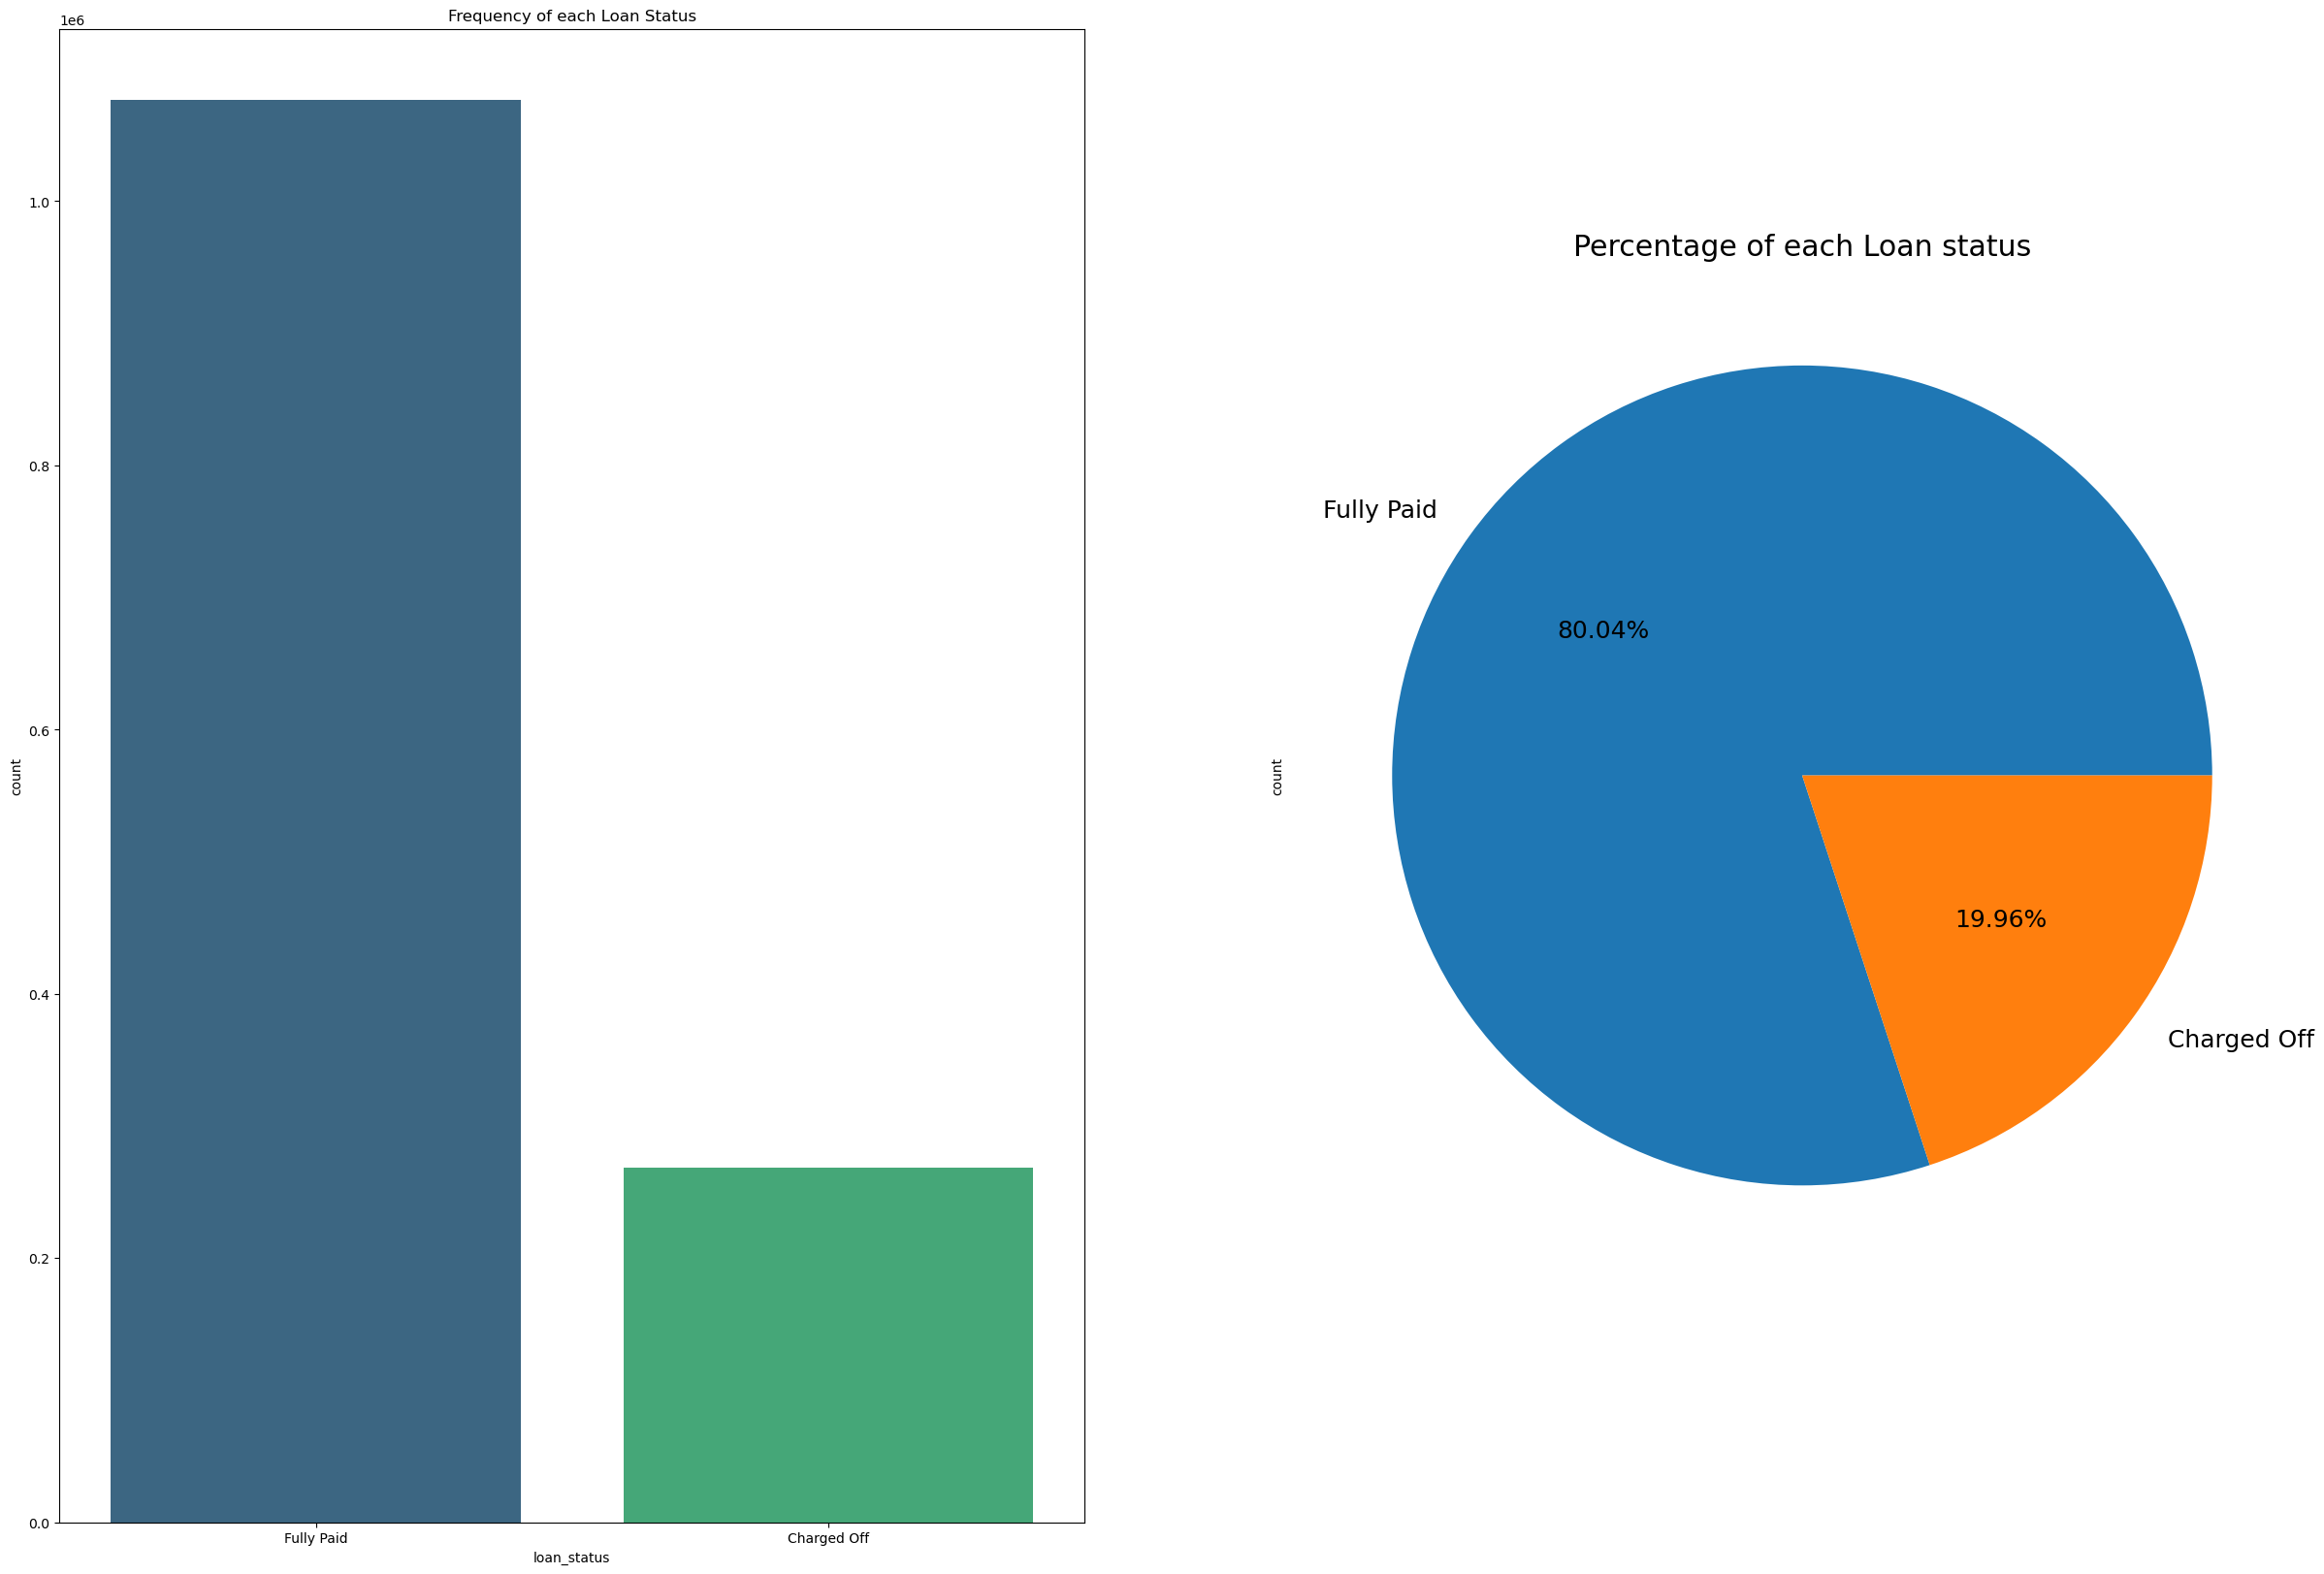

In [31]:
fig, axs = plt.subplots(1,2,figsize=(30,20))

sns.countplot(x='loan_status',data=df_train,ax=axs[0], palette='viridis')

axs[0].set_title("Frequency of each Loan Status")

plt.rcParams['font.size'] = 18

df_train.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')

axs[1].set_title("Percentage of each Loan status")

plt.grid(False)

plt.show()

### **ID and Zip-Code**

<a id="5.2"></a>

---

- **Id:** A unique LC assigned ID for the loan listing.

- **Zip_Code:** The first 3 numbers of the zip code provided by the borrower in the loan application

These variables do not have any predictive power so they are of no use for us

In [33]:
df_train.drop(['id'],axis = 1, inplace=True)
df_train.drop(['zip_code'],axis = 1, inplace=True)

### **Installment and loan_amnt**

<a id="5.3"></a>

---

- **Installment:** The monthly payment owed by the borrower if the loan originates.

- **Loan_amnt:** The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**Distribution of Loan Amount**

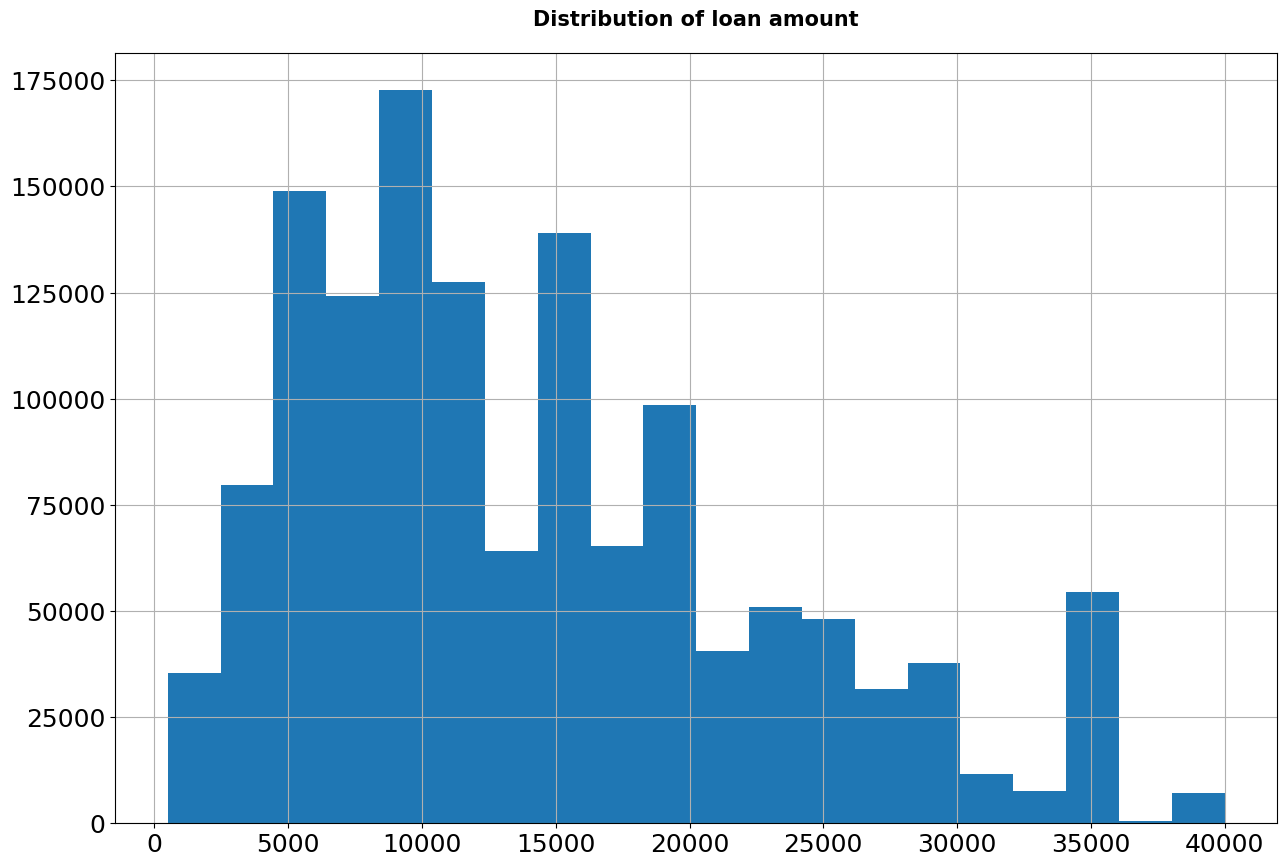

In [34]:
plt.figure(figsize=(15,10))

df_train['loan_amnt'].hist(bins=20)

plt.title("Distribution of loan amount", loc ="center", pad = 20, fontsize = 15, fontweight = "bold")

plt.show()

In [35]:
df_train.groupby('loan_status')['loan_amnt'].describe()

count          mean          std    min     25%      50%  \
loan_status                                                                 
Charged Off  268559.0   15565.055444  8814.560077  900.0  9000.0  14350.0   
Fully Paid   1076751.0  14134.369808  8669.028973  500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20400.0  40000.0  
Fully Paid   20000.0  40000.0

The distribution of loan amount seems to be right sekwed with the max amount reaching 40000 USD. The mean for both types of loans are not to far appart

We have some outliers present but these do not look like to be extreme outliers.

**Distribution of Installment**

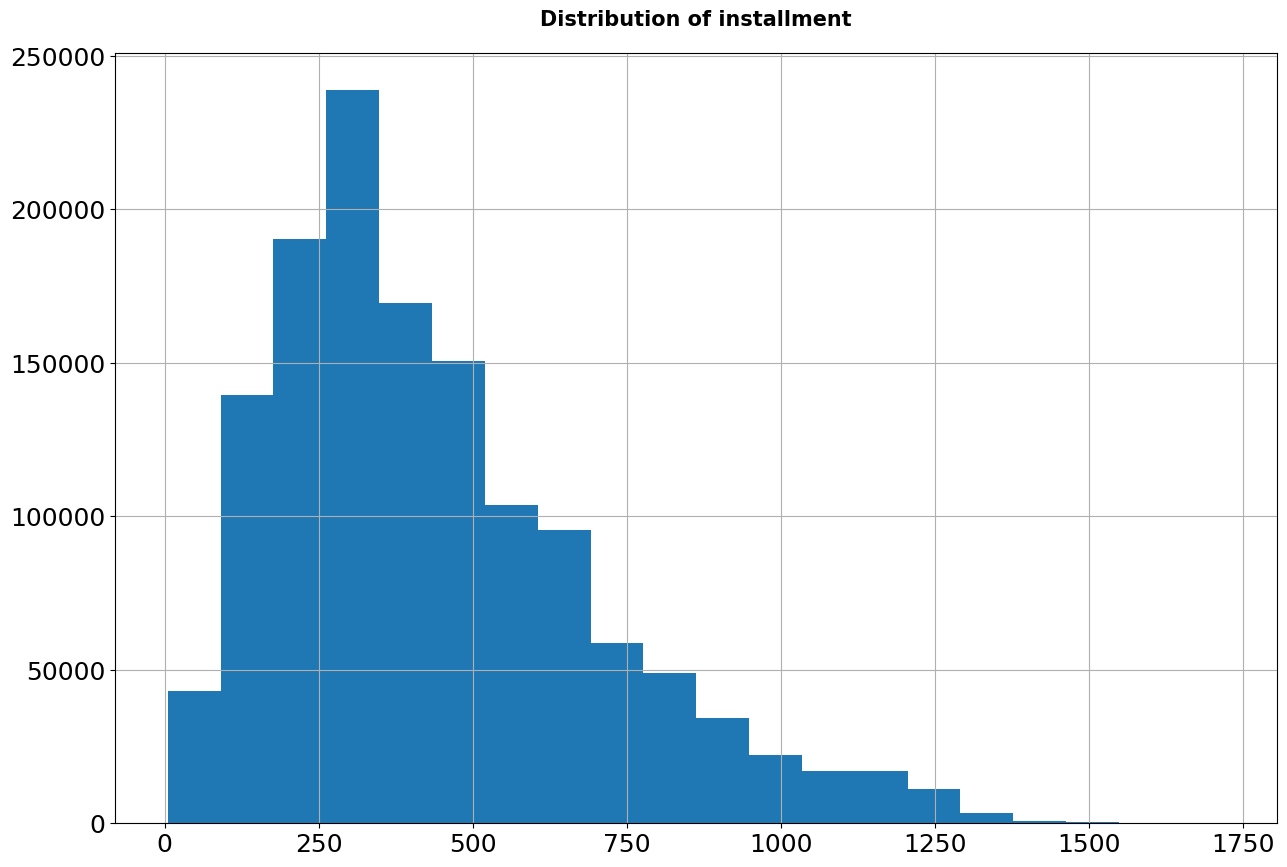

In [36]:
plt.figure(figsize=(15,10))

df_train['installment'].hist(bins=20)

plt.title("Distribution of installment", loc ="center", pad = 20, fontsize = 15, fontweight = "bold")

plt.show()

In [37]:
df_train.groupby('loan_status')['installment'].describe()

count        mean         std    min     25%     50%     75%  \
loan_status                                                                     
Charged Off  268559.0   465.147994  262.774106  21.62  275.29  402.83  605.31   
Fully Paid   1076751.0  431.323226  260.759563  4.93   240.92  368.26  573.06   

                 max  
loan_status           
Charged Off  1717.63  
Fully Paid   1719.83

The same can be said about the installment feature. The distrubution looks to be right skewed where the average amount falls between 430 and 460 USD.

We have some outliers present but these do not look like to be extreme outliers. 

We present bellow box plots to further prove our point

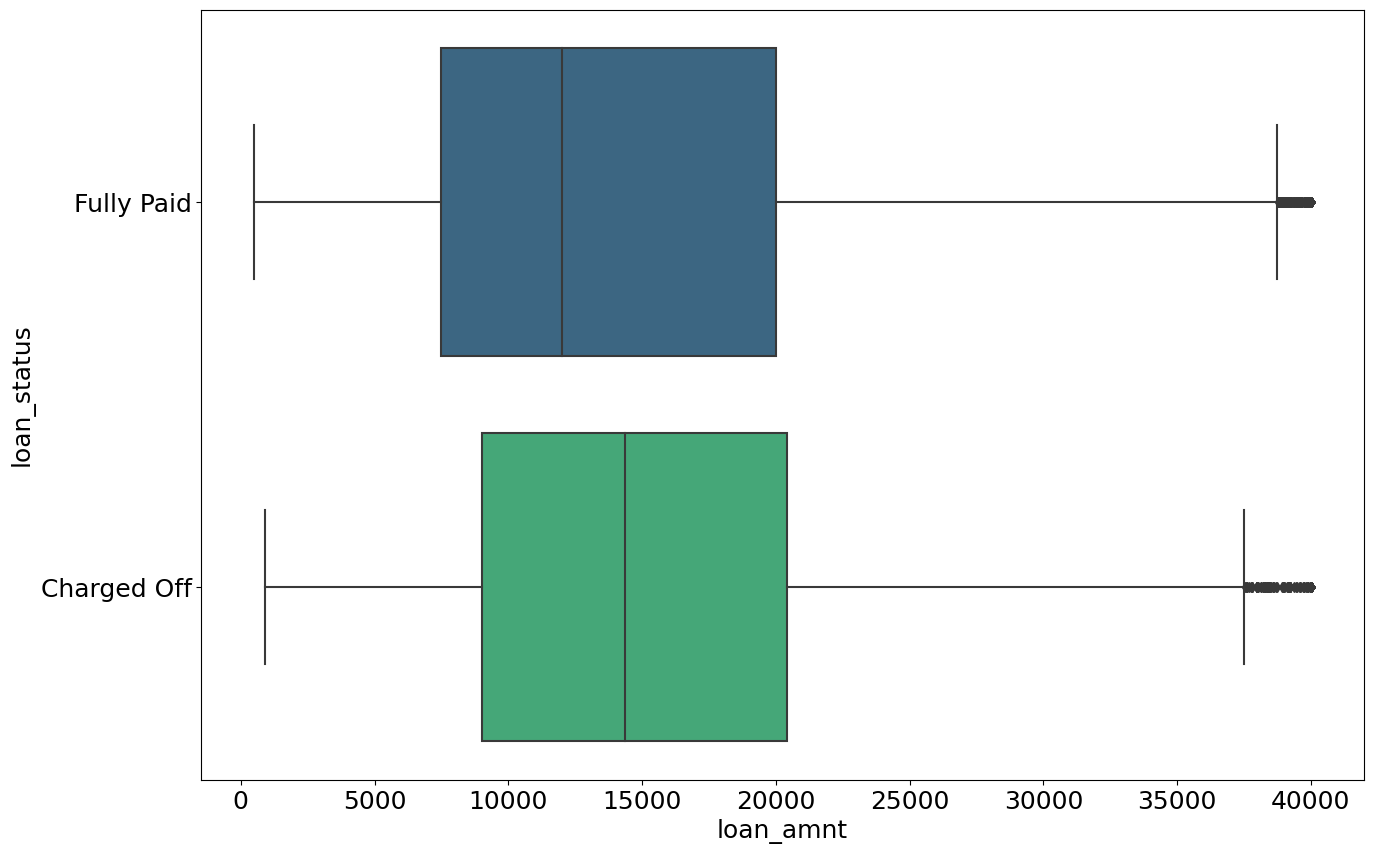

In [38]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df_train, y='loan_status', x='loan_amnt', palette='viridis')

plt.show()

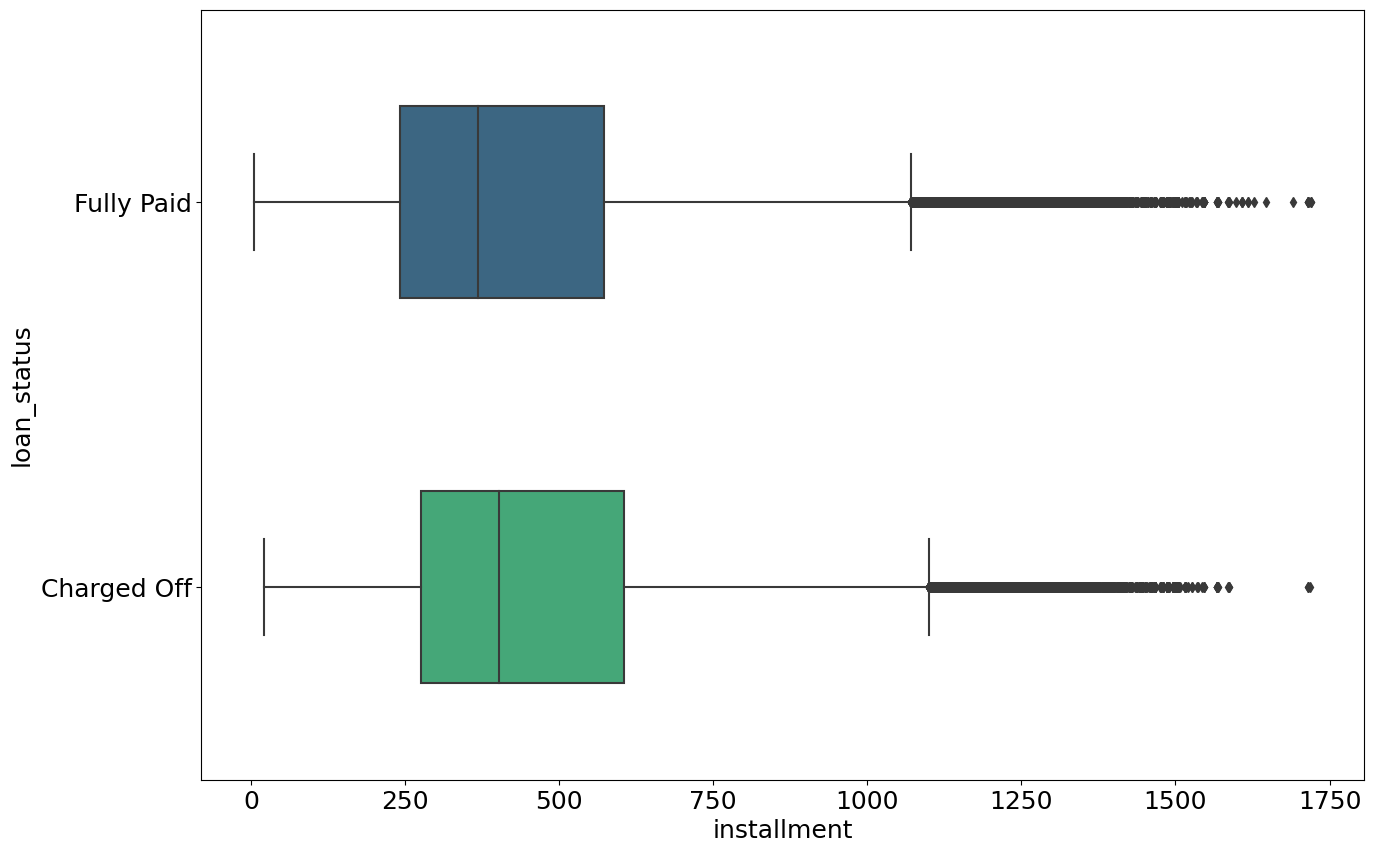

In [39]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df_train, y='loan_status', x='installment', width=.5, palette='viridis')

plt.show()

## **Interest Rate**

<a id="5.4"></a>

---

- **int_rate:** Interest Rate on the loan.

In [40]:
df_train["int_rate"].describe().apply(lambda x: format(x, 'f'))

count    1345310.000000
mean     13.239619     
std      4.768716      
min      5.310000      
25%      9.750000      
50%      12.740000     
75%      15.990000     
max      30.990000     
Name: int_rate, dtype: object

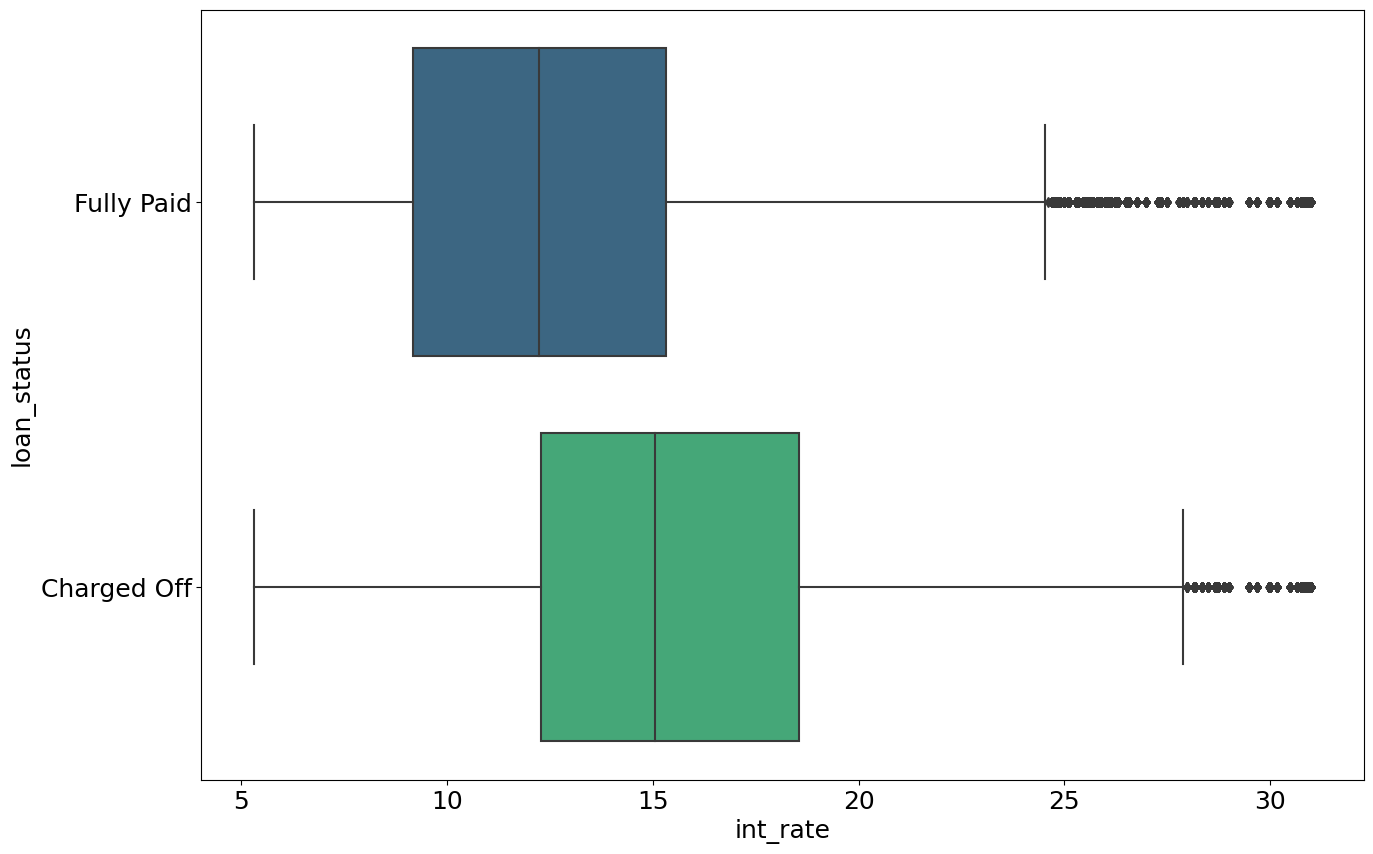

In [41]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df_train, y='loan_status', x='int_rate', palette='viridis')

plt.show()

Outliers are present but again not to extreme

In [42]:
df_train.groupby('loan_status')['int_rate'].describe()

count       mean       std   min    25%    50%    75%    max
loan_status                                                                  
Charged Off  268559.0   15.710714  4.910387  5.31  12.29  15.05  18.55  30.99
Fully Paid   1076751.0  12.623288  4.527227  5.31  9.17   12.23  15.31  30.99

Values are close to each other considering both scenarios

## **Term**

<a id="5.5"></a>

---

- **Term:** The number of payments on the loan. Values are in months and can be either 36 or 60.

In [43]:
df_train['term'].value_counts(dropna=False)

term
 36 months    1020743
 60 months    324567 
Name: count, dtype: int64

**Total Percentage of loans granted by term**

In [44]:
df_train['term'].value_counts(normalize=True)

term
 36 months    0.758742
 60 months    0.241258
Name: proportion, dtype: float64

In [45]:
df_train['term'] = df_train['term'].apply(lambda s: np.int8(s.split()[0]))

Most of the loans in this dataset fall have a term of 36 momnths

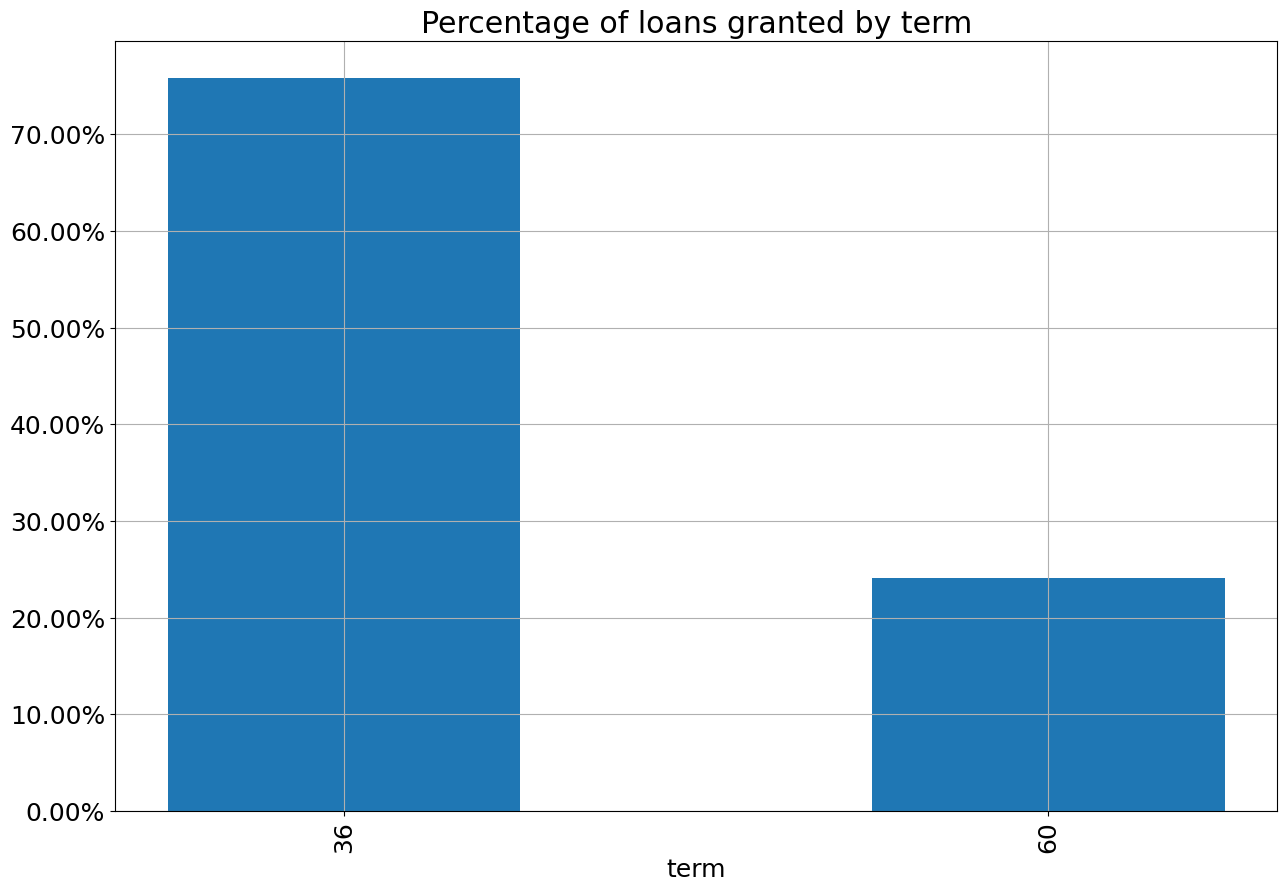

In [46]:
plt.figure(figsize=(15,10))

p = (df_train['term'].value_counts()/len(df_train)).plot.bar(title= 'Percentage of loans granted by term')


# Change y ticks (percentage values)

vals = p.get_yticks()

p.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.autoscale()

plt.grid(True)

plt.show()

**Probability of default based on term of the loan**

In [47]:
br = pd.DataFrame(df_train.groupby('term')['loan_status'].value_counts(normalize=True))

br

proportion
term loan_status            
36   Fully Paid   0.840066  
     Charged Off  0.159934  
60   Fully Paid   0.675546  
     Charged Off  0.324454

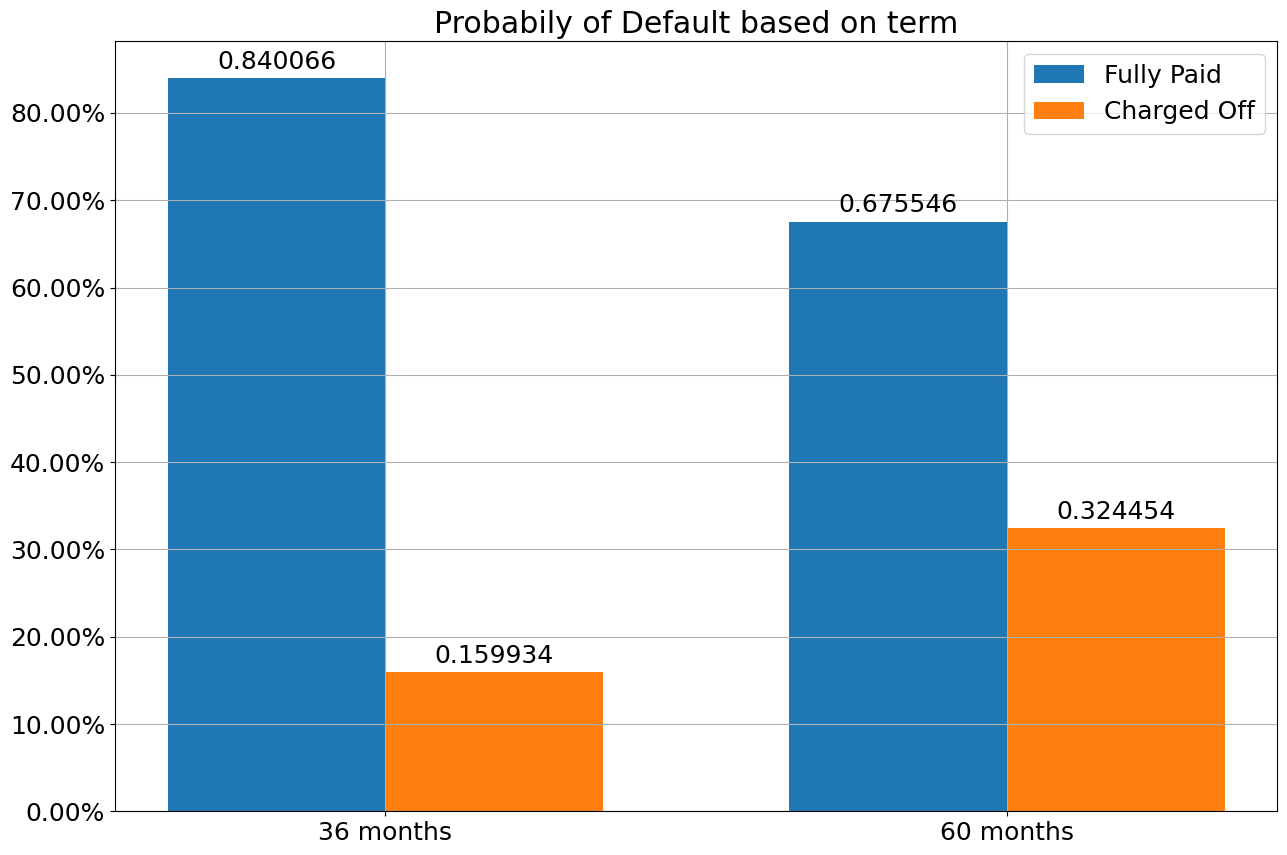

In [48]:
labels = ['36 months', '60 months']

months_36 = [0.840066, 0.675546]

months_60 = [0.159934, 0.324454]

x = np.arange(len(labels))

width = 0.35  

fig, ax = plt.subplots(figsize=(15, 10))

rects1 = ax.bar(x - width/2, months_36, width, label='Fully Paid')
rects2 = ax.bar(x + width/2, months_60, width, label='Charged Off')


ax.set_title('Probabily of Default based on term')

# Change y ticks (percentage values)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# Change x ticks

ticks = [0, 1]

plt.xticks(ticks, labels)

ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


plt.autoscale()
plt.grid(True)
plt.legend()
plt.show()

As we can see there are only two possible values for the term on Lending Club, i.e. 36 months or 60 months, and months with a higher term have a higher default rate. 

## **Grade and Sub Grade**

<a id="5.6"></a>

---

- **Grade:** LC assigned loan grade

In [49]:
print(sorted(df_train['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [50]:
df_train['grade'].value_counts(dropna=False)

grade
B    392741
C    381686
A    235090
D    200953
E    93650 
F    32058 
G    9132  
Name: count, dtype: int64

In [51]:
table1 = pd.crosstab(index=df_train['grade'], columns=df_train['loan_status'])

table1

loan_status  Charged Off  Fully Paid
grade                               
A            14201        220889    
B            52569        340172    
C            85649        296037    
D            61054        139899    
E            36035        57615     
F            14491        17567     
G            4560         4572

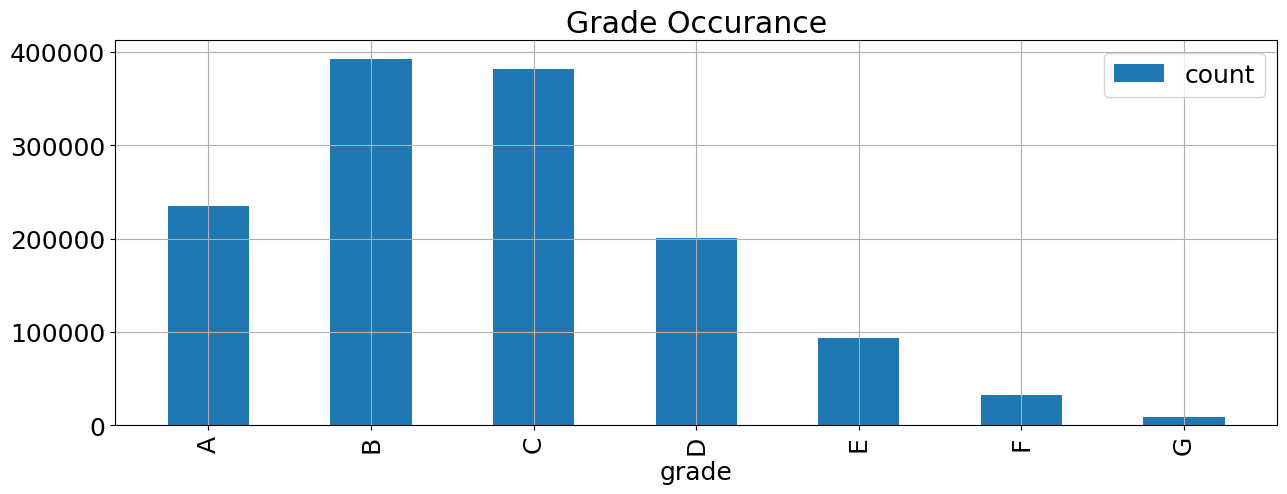

In [52]:
plt.figure(figsize=(15,5))

(df_train['grade'].value_counts().sort_index().plot.bar())

plt.title("Grade Occurance")

plt.autoscale()

plt.grid(True)

plt.legend()

plt.show()

**Probability of default based on the grade of the loan**

In [53]:
df_train.groupby('grade')['loan_status'].value_counts(normalize=True)

grade  loan_status
A      Fully Paid     0.939593
       Charged Off    0.060407
B      Fully Paid     0.866148
       Charged Off    0.133852
C      Fully Paid     0.775604
       Charged Off    0.224396
D      Fully Paid     0.696178
       Charged Off    0.303822
E      Fully Paid     0.615216
       Charged Off    0.384784
F      Fully Paid     0.547976
       Charged Off    0.452024
G      Fully Paid     0.500657
       Charged Off    0.499343
Name: proportion, dtype: float64

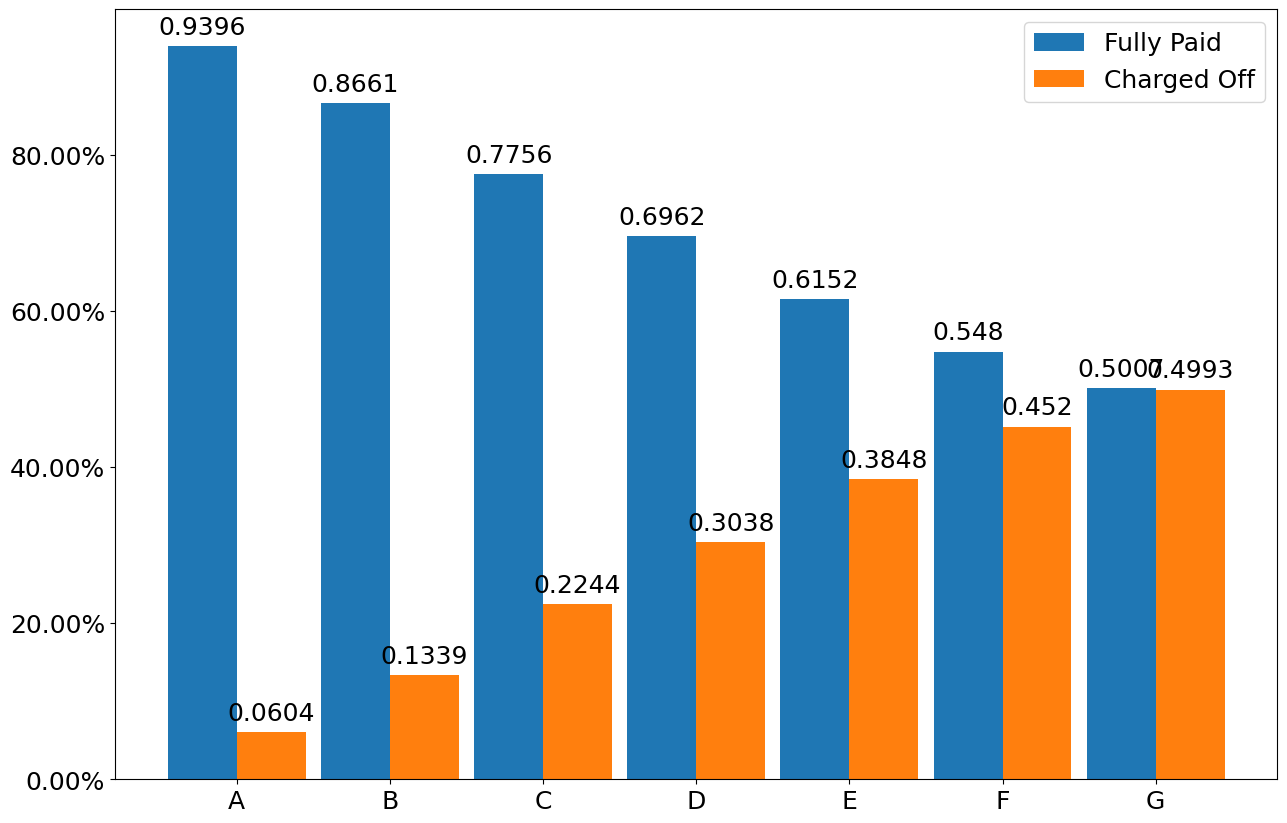

In [54]:
labels = ['A', "B", "C", "D", "E", "F", "G"]

fullypaid_grade = [0.9396, 0.8661, 0.7756, 0.6962, 0.6152, 0.5480, 0.5007]

chargedoff_grade = [0.0604, 0.1339, 0.2244, 0.3038, 0.3848, 0.4520, 0.4993]

x = np.arange(len(labels))

width = 0.45

fig, ax = plt.subplots(figsize=(15, 10))

rects1 = ax.bar(x - width/2, fullypaid_grade, width, label='Fully Paid')
rects2 = ax.bar(x + width/2, chargedoff_grade, width, label='Charged Off')


#ax.set_title('Probabily of Default based on grade', fontweight = "bold", fontsize = 12)

# Change y ticks (percentage values)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# Change x ticks

ticks = [0,1,2,3,4,5,6]

plt.xticks(ticks, labels)

ax.legend()

ax.bar_label(rects1, padding=5)
ax.bar_label(rects2, padding=5)


plt.autoscale()
plt.grid(False)
plt.legend()
plt.show()

There is a clear trend when we analyse both the grade and our target variable. The default probability tends to go as the grade worsens.

In [ ]:
loan_grades = df_train.groupby("grade").mean().reset_index()
sns.set(rc={'figure.figsize':(15,6)})

sns.set(rc={'axes.facecolor':'white'})

ax = sns.barplot(x='grade', y='loan_amnt', data=loan_grades, palette='viridis')

#plt.title("Average Interest Rate - Grade", fontsize=20)

plt.xticks(weight = 'bold', fontsize = 15)
plt.yticks(weight = 'bold', fontsize = 15)

plt.xlabel("Grade", fontsize=15, weight = 'bold')

plt.ylabel("Average Loan Amount", fontsize=15, weight = 'bold')

#ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.autoscale()

plt.grid(False)

plt.show()

There is a clear positive relationship when we analyse both the grade and interest rate. Interest rate is higher as the grade for the loan is worse

We do have another grade variable, "sub_grade" that provides the same information but in more detail.

- **Sub Grade:** LC assigned loan sub grade

In [55]:
print(sorted(df_train['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [56]:
table1 = pd.crosstab(index=df_train['sub_grade'], columns=df_train['loan_status'])
table1

loan_status  Charged Off  Fully Paid
sub_grade                           
A1           1408         42270     
A2           1734         35444     
A3           2093         35903     
A4           3587         48648     
A5           5379         58624     
B1           7415         63738     
B2           8409         65615     
B3           10624        71203     
B4           12336        70863     
B5           13785        68753     
C1           16230        69264     
C2           16412        62801     
C3           16892        58106     
C4           18546        55875     
C5           17569        49991     
D1           14270        37051     
D2           13269        31579     
D3           12008        27309     
D4           11512        24054     
D5           9995         19906     
E1           8565         15184     
E2           8026         13351     
E3           7118         11269     
E4           6304         9416      
E5           6022         8395      
F1           4217         5753      
F2           3264         3934      
F3           2744         3344      
F4           2327         2532      
F5           1939         2004      
G1           1434         1563      
G2           1047         1084      
G3           829          785       
G4           655          625       
G5           595          515

**Probability of default based on the sub_grade of the loan**

In [57]:
df_train.groupby('sub_grade')['loan_status'].value_counts(normalize=True)

sub_grade  loan_status
A1         Fully Paid     0.967764
           Charged Off    0.032236
A2         Fully Paid     0.953360
           Charged Off    0.046640
A3         Fully Paid     0.944915
           Charged Off    0.055085
A4         Fully Paid     0.931330
           Charged Off    0.068670
A5         Fully Paid     0.915957
           Charged Off    0.084043
B1         Fully Paid     0.895788
           Charged Off    0.104212
B2         Fully Paid     0.886402
           Charged Off    0.113598
B3         Fully Paid     0.870165
           Charged Off    0.129835
B4         Fully Paid     0.851729
           Charged Off    0.148271
B5         Fully Paid     0.832986
           Charged Off    0.167014
C1         Fully Paid     0.810162
           Charged Off    0.189838
C2         Fully Paid     0.792812
           Charged Off    0.207188
C3         Fully Paid     0.774767
           Charged Off    0.225233
C4         Fully Paid     0.750796
           Charged Off    0.2492

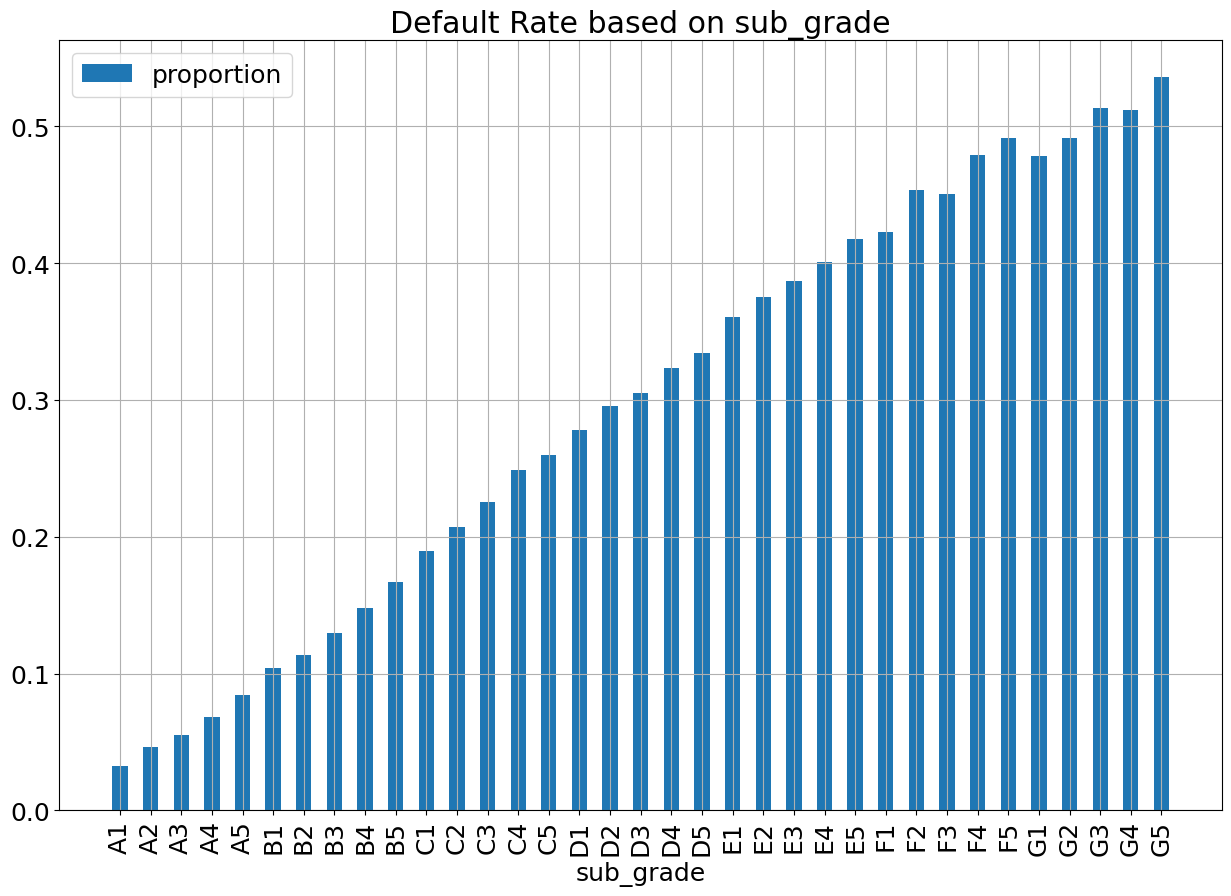

In [58]:
plt.figure(figsize=(15,10))

p = df_train.groupby('sub_grade')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

p = p.plot.bar(title='Default Rate based on sub_grade')

plt.legend(loc = 2)

plt.autoscale()
plt.grid(True)

plt.show()

Since sub grade comes directly from the variable grade the same upwards trend is visible. For modeling we cannot use both grade variables, so we opted to drop sub_grade and keep grade

In [60]:
df_train.drop(['sub_grade'],axis = 1, inplace=True)

## **Emp_Title**

<a id="5.7"></a>

---

- **emp_title:** The job title supplied by the Borrower when applying for the loan

In [61]:
df_train["emp_title"].describe()

count     1259525
unique    378353 
top       Teacher
freq      21268  
Name: emp_title, dtype: object

In [62]:
print (df_train.emp_title.value_counts().head(10))
print("-------------------------------------------")
print (df_train.emp_title.value_counts().tail())
print("-------------------------------------------")
df_train.emp_title.unique().shape

emp_title
Teacher             21268
Manager             19470
Owner               10302
Registered Nurse    8774 
RN                  8522 
Supervisor          8289 
Driver              7558 
Sales               7487 
Project Manager     6381 
Office Manager      5526 
Name: count, dtype: int64
-------------------------------------------
emp_title
CSR. SR                          1
Auto body prepper                1
Software engineer supervisor     1
Ins Adjuster                     1
Exec Dir Internal Audit          1
Name: count, dtype: int64
-------------------------------------------


(378354,)

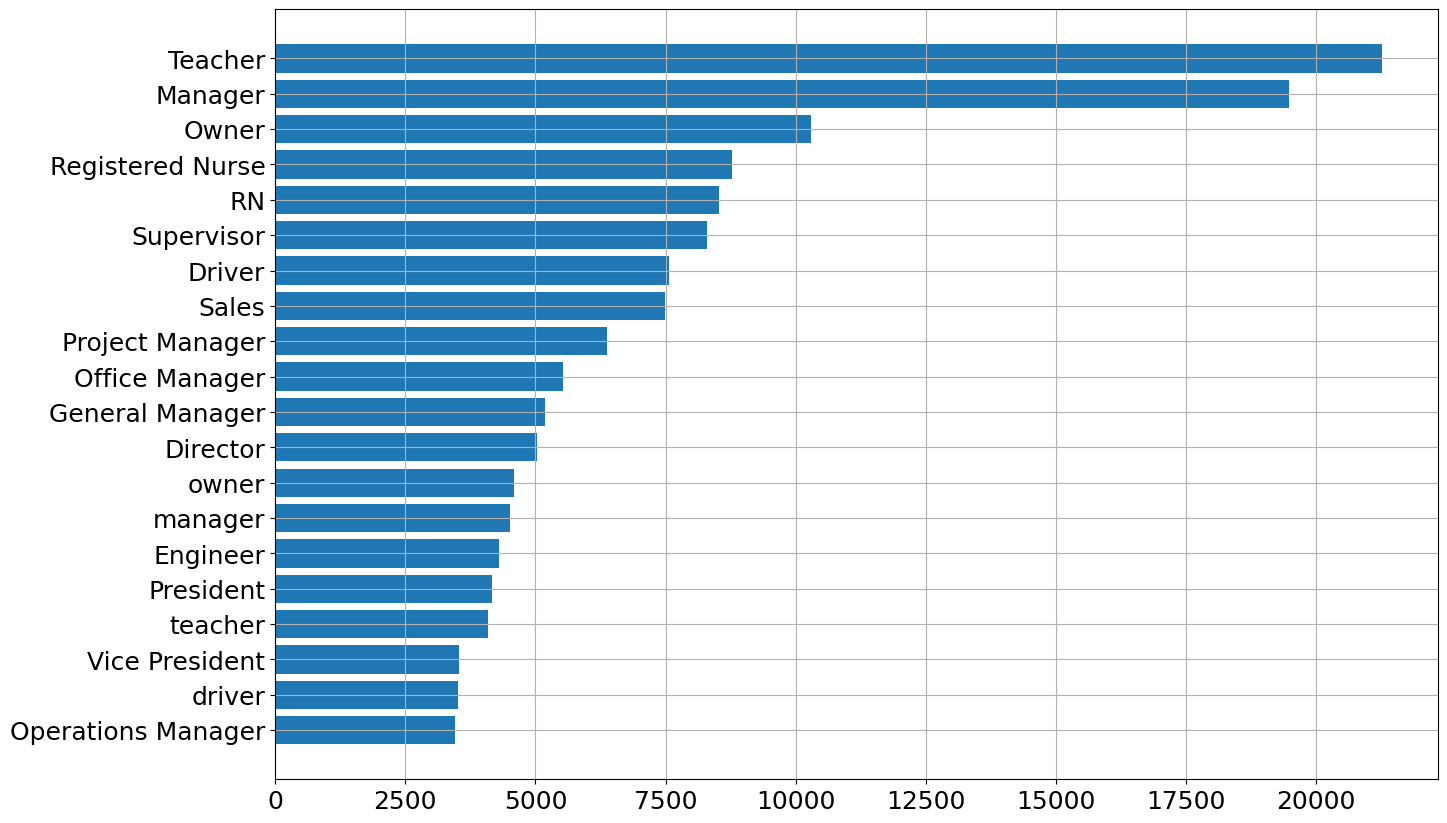

In [63]:
plt.figure(figsize=(15,10))


plt.barh(df_train.emp_title.value_counts()[:20].index, df_train.emp_title.value_counts()[:20])

plt.gca().invert_yaxis()

#plt.title("Top 20 jobs titles who were able to afford a loan")

plt.autoscale()
plt.grid(True)

plt.show()

If we look at the employment title we have 378353 unique entries among 1259595

By looking at the head and the tail there are some oddly specific titles such as Driver/Route Specialist. Any relationship we might observe might be due to a confounding relationship, a variable might obscure the effects of another variable. Using our dataset as an example Registered Nurses, who have higher education requirements and receive above average pay, might be granted A grade loans on average. 

Is this relationship associated by the fact that they work as Registered Nurses or by having a 4 year degree or their salary? 

What if we consider other professionals in the health department such as physician assistants or Nursing Assistants who are in the opposite spectrum? 

Would we see the same effect? 

Additionally by looking at the Top 20 jobs we can see at least some records, such as Teacher, Owner and Manager, that may have some dupplicate records.

When selecting variables for modeling we need to assess not only the potential relationship between said variable and our target variable but also the quality and transparency of the information.

Due to the amount of different features we decided to drop it

In [66]:
df_train.drop(['emp_title'],axis = 1, inplace=True)

## **Emp_Length**

<a id="5.8"></a>

---

- **emp_length:** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [67]:
df_train['emp_length'].value_counts(dropna=False).sort_index()

emp_length
1 year       88494 
10+ years    442199
2 years      121743
3 years      107597
4 years      80556 
5 years      84154 
6 years      62733 
7 years      59624 
8 years      60701 
9 years      50937 
< 1 year     108061
NaN          78511 
Name: count, dtype: int64

Note there are 78511 loans without data on the length of employment

For an easier analysis we are going to convert "< 1 year" to 0 and "10 + years" to 10.

In [68]:
df_train['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

In [69]:
table1 = pd.crosstab(index=df_train['emp_length'], columns=df_train['loan_status'])

table1

loan_status  Charged Off  Fully Paid
emp_length                          
1            40380        156175    
10           83057        359142    
2            24114        97629     
3            21486        86111     
4            15900        64656     
5            16495        67659     
6            12140        50593     
7            11620        48004     
8            12100        48601     
9            10137        40800

By deafult a cross table removes missing values!

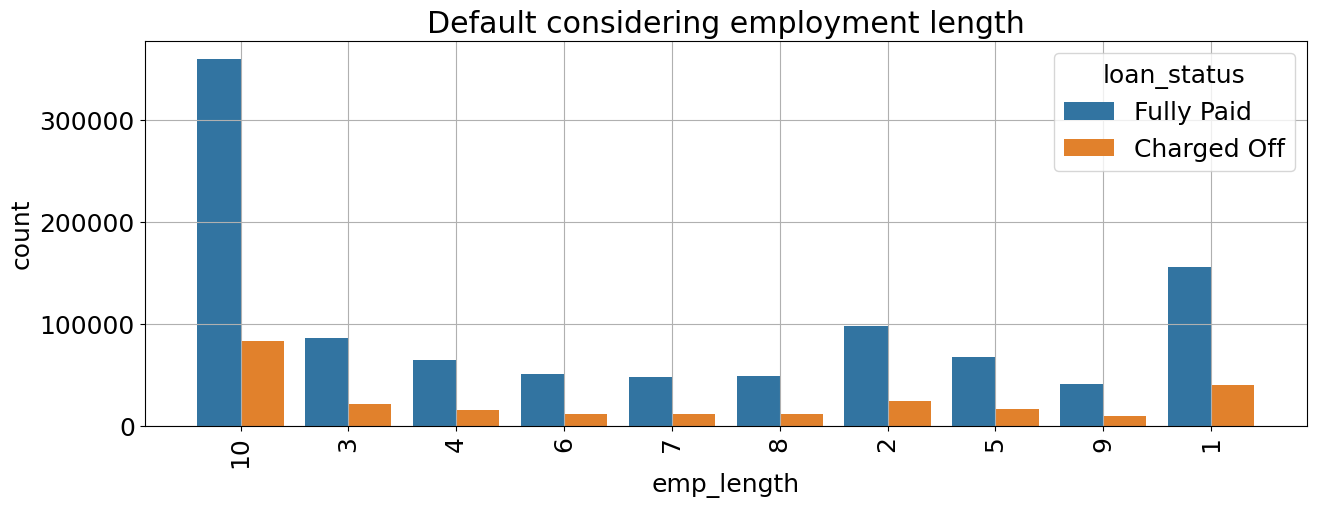

In [70]:
plt.figure(figsize=(15, 5))

g = sns.countplot(x='emp_length', data=df_train, hue='loan_status')

g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.title("Default considering employment length")

plt.autoscale()
plt.grid(True)

plt.show()

**Probability of default based on the emp_length of the loan**

In [71]:
df_train.groupby('emp_length')['loan_status'].value_counts(normalize=True)

emp_length  loan_status
1           Fully Paid     0.794561
            Charged Off    0.205439
10          Fully Paid     0.812173
            Charged Off    0.187827
2           Fully Paid     0.801927
            Charged Off    0.198073
3           Fully Paid     0.800310
            Charged Off    0.199690
4           Fully Paid     0.802622
            Charged Off    0.197378
5           Fully Paid     0.803990
            Charged Off    0.196010
6           Fully Paid     0.806481
            Charged Off    0.193519
7           Fully Paid     0.805112
            Charged Off    0.194888
8           Fully Paid     0.800662
            Charged Off    0.199338
9           Fully Paid     0.800989
            Charged Off    0.199011
Name: proportion, dtype: float64

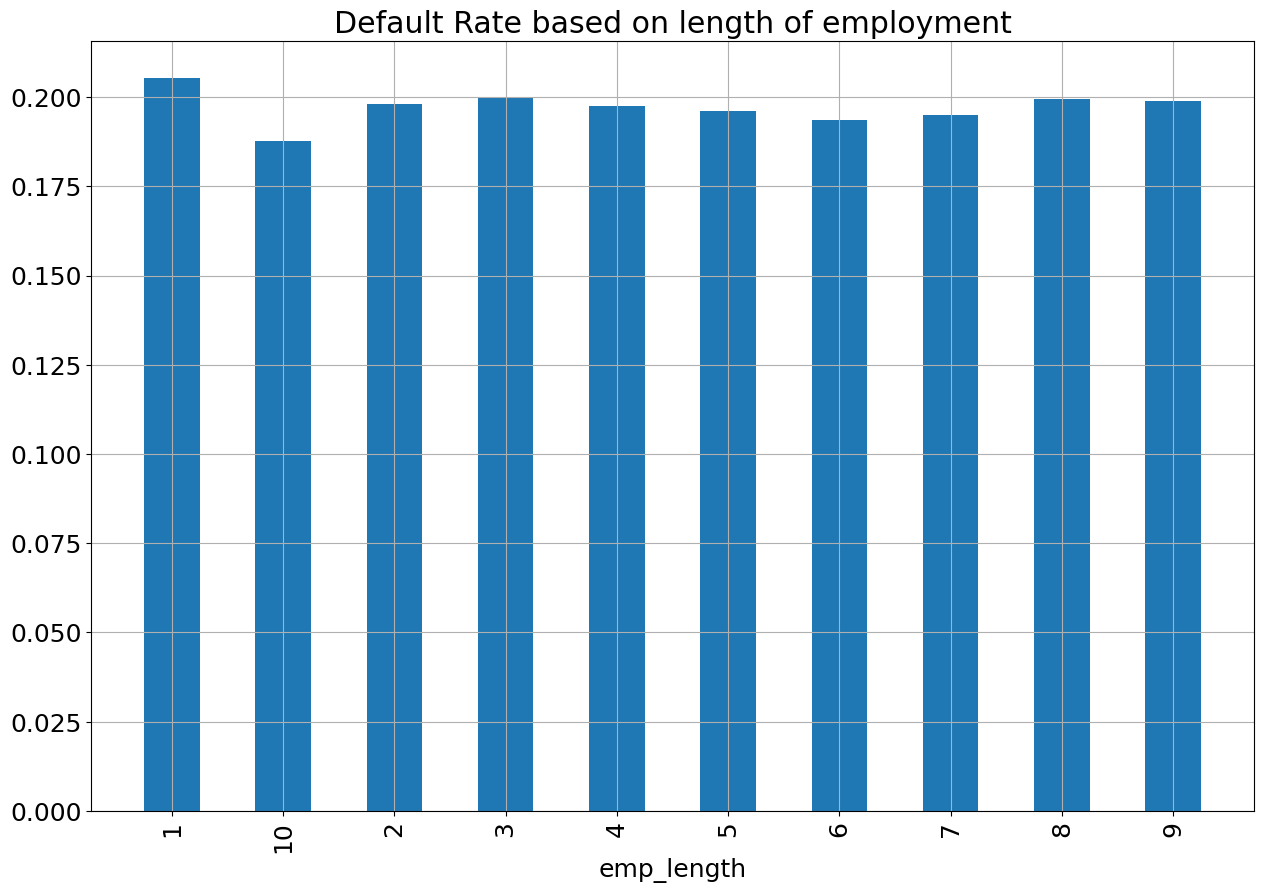

In [72]:
plt.figure(figsize=(15,10))

p = df_train.groupby('emp_length')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

p = p.plot.bar(title='Default Rate based on length of employment')

plt.autoscale()

plt.grid(True)

plt.show()

Leaving this variable in might contradict our decision to drop the employment tile as it also associated with the socio-economic conditions.

For instance, a Computer Scientist 5 years into their career would generally have a larger salary than a Kindergarden teacher 10 years into their career. 

It would make sense to combine a grouped, matched, and reduced set of employment titles with their length to create a “purchasing power” metric. 

In [74]:
df_train.drop(['emp_length'],axis = 1, inplace=True)

## **Home Ownership**

<a id="5.9"></a>

---

- **home_ownership:** The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

In [75]:
table1 = pd.crosstab(index=df_train['home_ownership'], columns=df_train['loan_status'])

table1

loan_status     Charged Off  Fully Paid
home_ownership                         
ANY             56           230       
MORTGAGE        114531       551048    
NONE            7            41        
OTHER           27           117       
OWN             29864        114968    
RENT            124074       410347

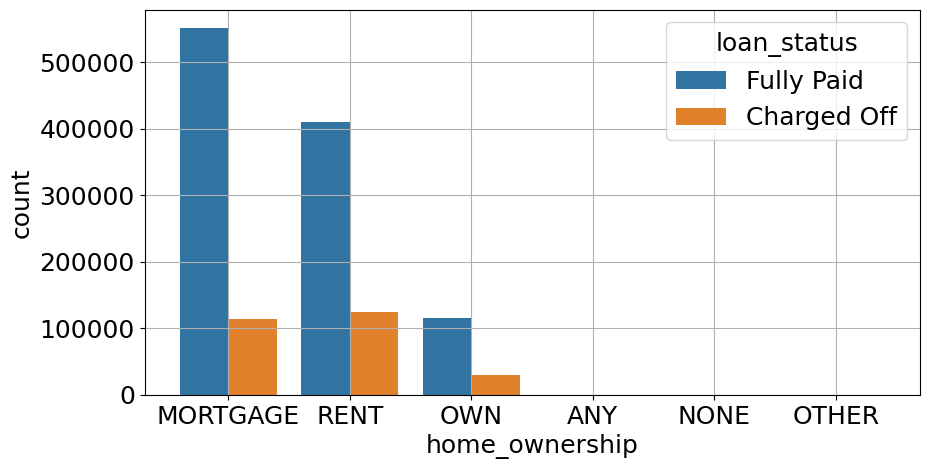

In [76]:
plt.figure(figsize=(10, 5))

sns.countplot(x='home_ownership', data=df_train, hue='loan_status')

plt.autoscale()
plt.grid(True)

plt.show()

In order to reduce the number of features in this variable, we opted to group both "Any" and "None" in the "Other" feature for easier analysis

In [77]:
df_train['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [78]:
df_train['home_ownership'].value_counts()

home_ownership
MORTGAGE    665579
RENT        534421
OWN         144832
OTHER       478   
Name: count, dtype: int64

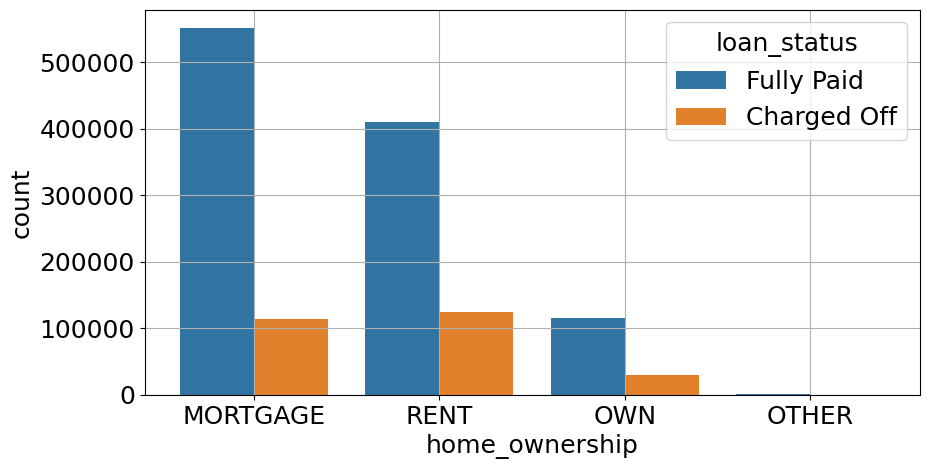

In [79]:
plt.figure(figsize=(10, 5))

sns.countplot(x='home_ownership', data=df_train, hue='loan_status')

plt.autoscale()
plt.grid(True)

plt.show()

By grouping our variables based on the variable loan_status, that the probability of default is almost exactly the same. 

In [80]:
df_train.groupby('home_ownership')['loan_status'].value_counts(normalize=True)

home_ownership  loan_status
MORTGAGE        Fully Paid     0.827923
                Charged Off    0.172077
OTHER           Fully Paid     0.811715
                Charged Off    0.188285
OWN             Fully Paid     0.793802
                Charged Off    0.206198
RENT            Fully Paid     0.767835
                Charged Off    0.232165
Name: proportion, dtype: float64

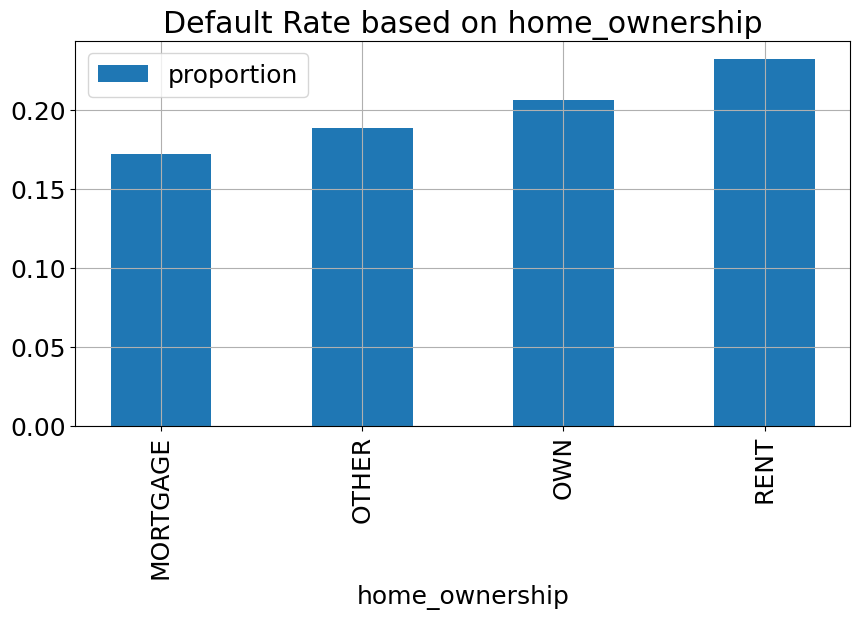

In [81]:
plt.figure(figsize=(10,5))

p = df_train.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

p = p.plot.bar(title='Default Rate based on home_ownership')

plt.legend()

plt.autoscale()
plt.grid(True)

plt.show()

## **Purpose and title**

<a id="5.10"></a>

---

- **Purpose:** A category provided by the borrower for the loan request.

In [82]:
df_train['purpose'].describe()

count     1345310           
unique    14                
top       debt_consolidation
freq      780321            
Name: purpose, dtype: object

In [83]:
df_train['purpose'].value_counts()

purpose
debt_consolidation    780321
credit_card           295279
home_improvement      87504 
other                 77875 
major_purchase        29425 
medical               15554 
small_business        15416 
car                   14585 
moving                9480  
vacation              9065  
house                 7253  
wedding               2294  
renewable_energy      933   
educational           326   
Name: count, dtype: int64

Most loan request fall in the debt consolidation and credit card category

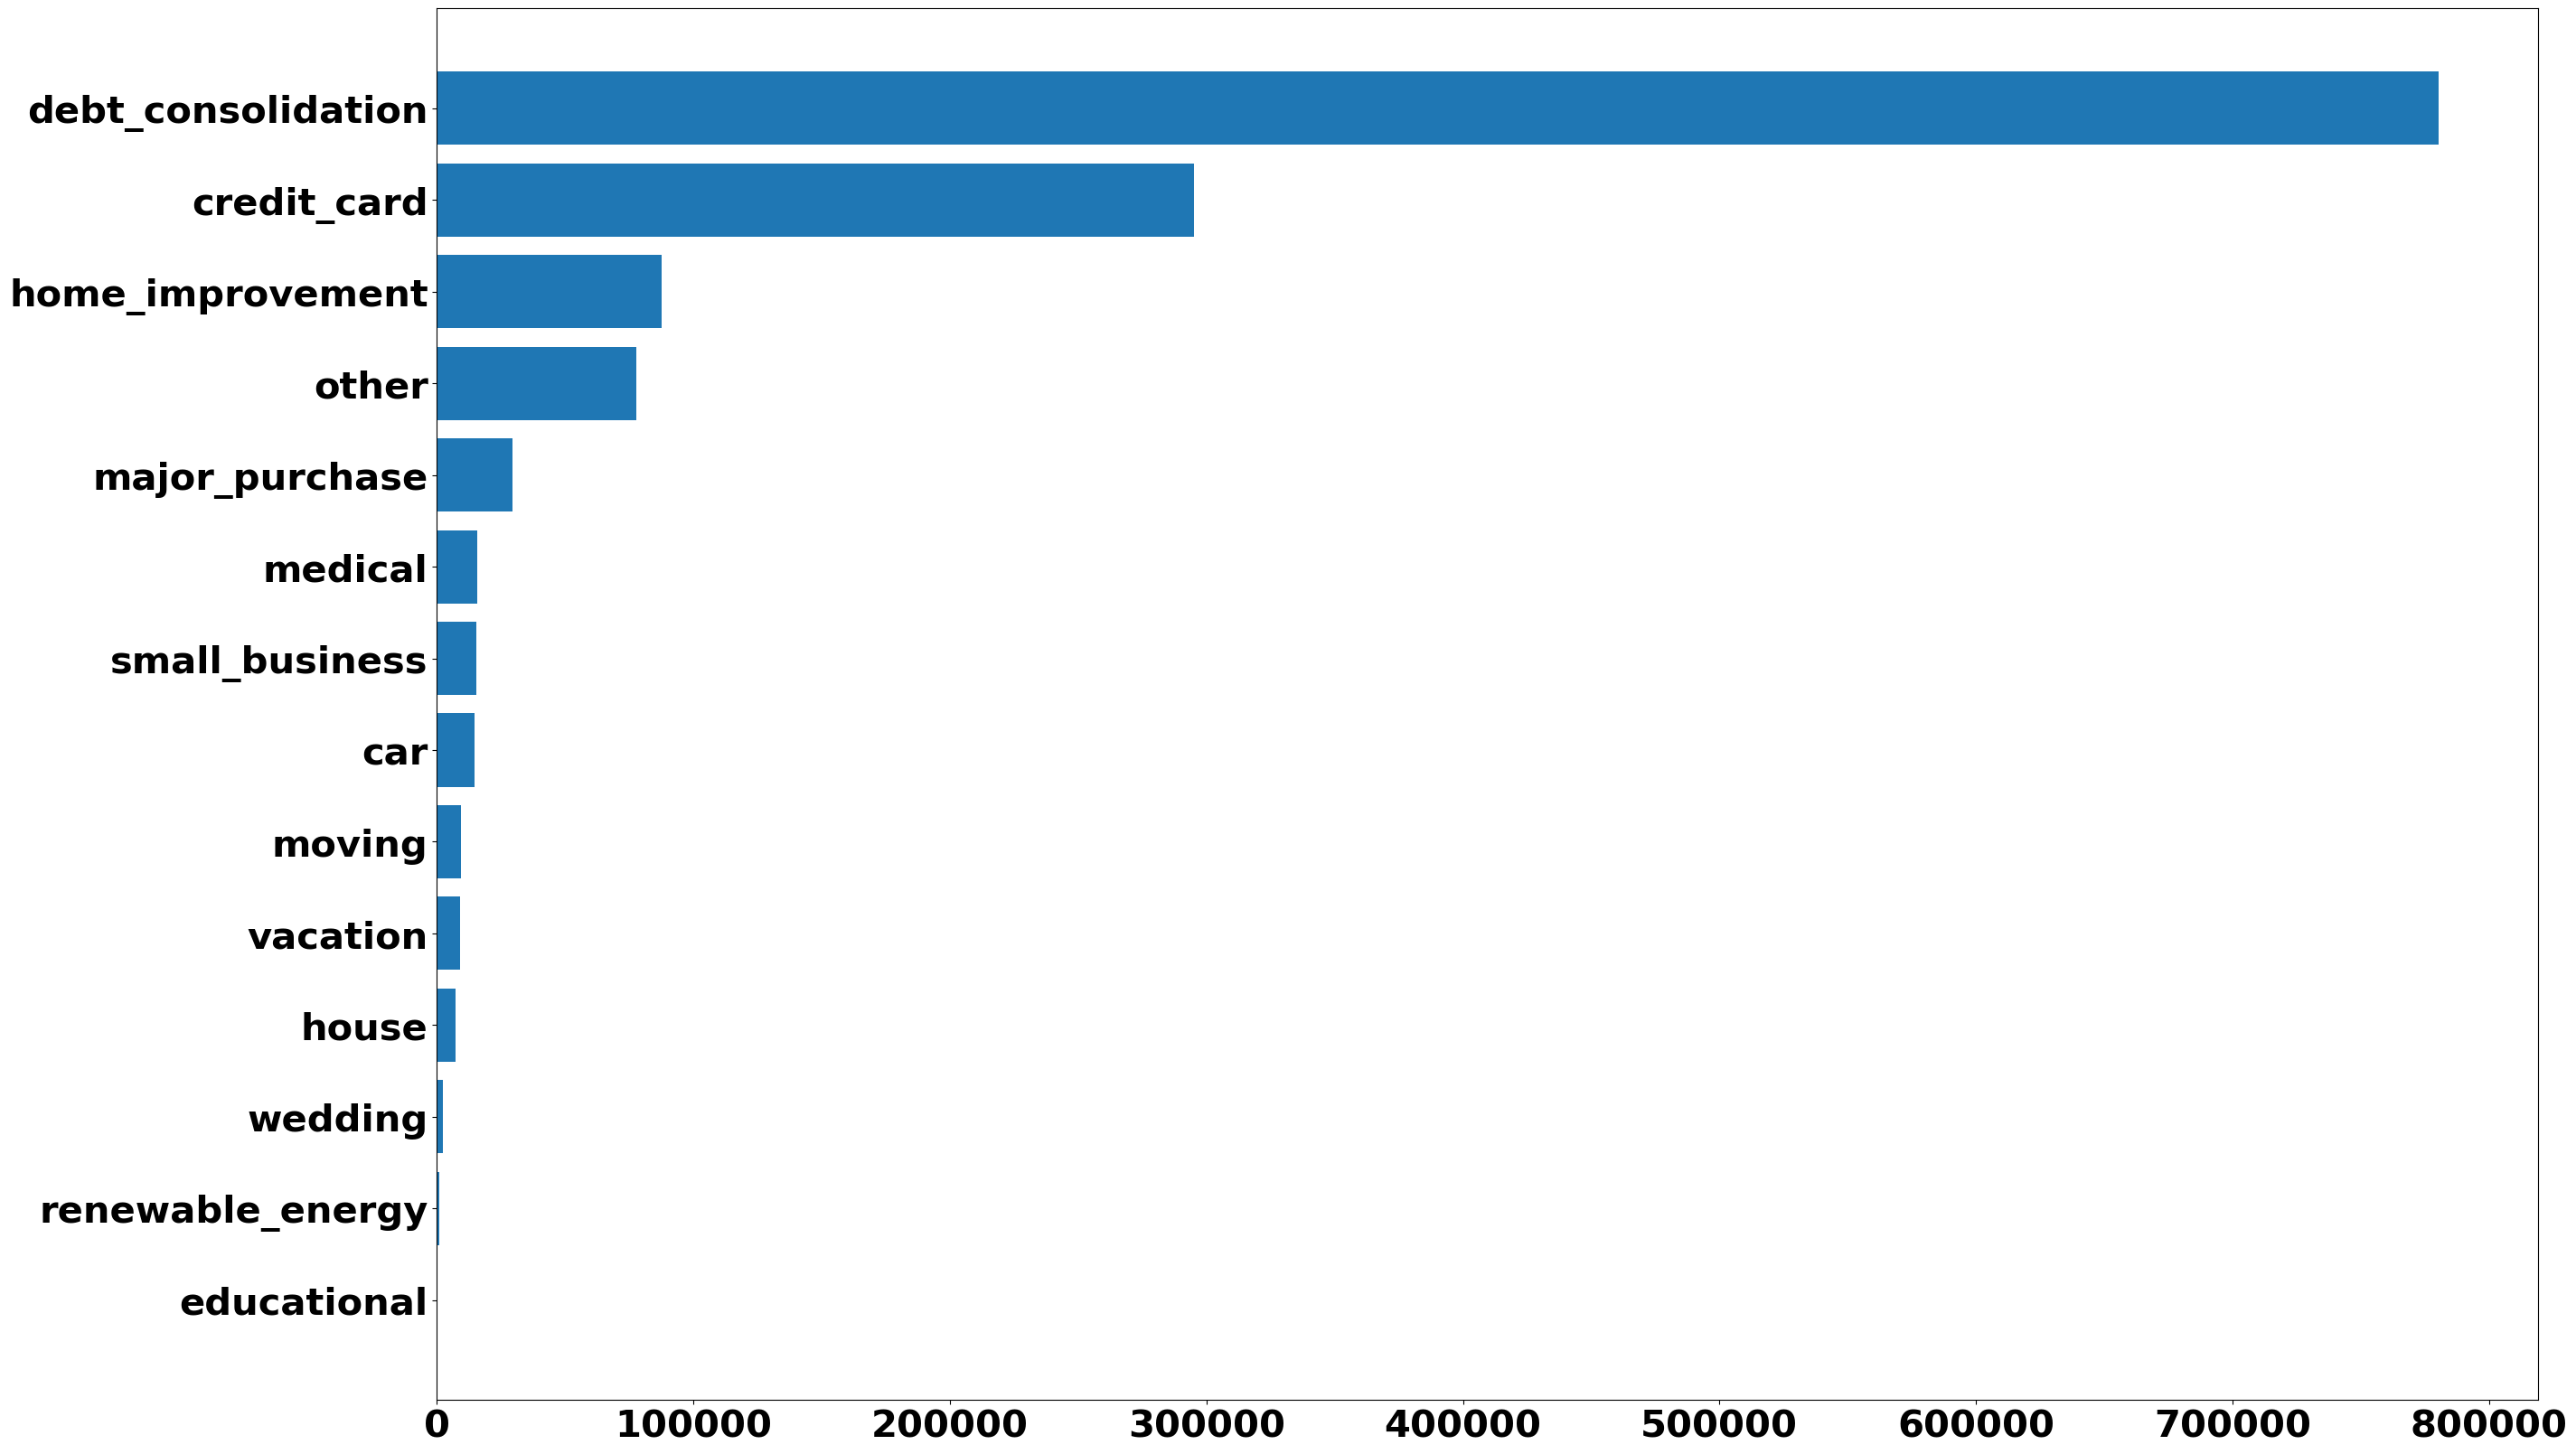

In [84]:
plt.figure(figsize=(30,20))

plt.barh(df_train.purpose.value_counts()[:20].index, df_train.purpose.value_counts()[:20])

#plt.title("Purpose Occurance",  loc ="center", pad = 20, fontsize = 30, fontweight = "bold")

plt.gca().invert_yaxis()

plt.xticks(weight = 'bold', fontsize = 30)
plt.yticks(weight = 'bold', fontsize = 30)

plt.autoscale()

plt.show()

In [85]:
table1 = pd.crosstab(index=df_train['purpose'], columns=df_train['loan_status'])

table1

loan_status         Charged Off  Fully Paid
purpose                                    
car                 2141         12444     
credit_card         49982        245297    
debt_consolidation  165014       615307    
educational         56           270       
home_improvement    15502        72002     
house               1587         5666      
major_purchase      5473         23952     
medical             3387         12167     
moving              2214         7266      
other               16385        61490     
renewable_energy    221          712       
small_business      4580         10836     
vacation            1738         7327      
wedding             279          2015

In [86]:
df_train.groupby('purpose')['loan_status'].value_counts(normalize=True)

purpose             loan_status
car                 Fully Paid     0.853205
                    Charged Off    0.146795
credit_card         Fully Paid     0.830730
                    Charged Off    0.169270
debt_consolidation  Fully Paid     0.788531
                    Charged Off    0.211469
educational         Fully Paid     0.828221
                    Charged Off    0.171779
home_improvement    Fully Paid     0.822842
                    Charged Off    0.177158
house               Fully Paid     0.781194
                    Charged Off    0.218806
major_purchase      Fully Paid     0.814002
                    Charged Off    0.185998
medical             Fully Paid     0.782243
                    Charged Off    0.217757
moving              Fully Paid     0.766456
                    Charged Off    0.233544
other               Fully Paid     0.789599
                    Charged Off    0.210401
renewable_energy    Fully Paid     0.763130
                    Charged Off    0.236870


In [87]:
df_train.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values(ascending = False)

purpose
small_business        0.297094
renewable_energy      0.236870
moving                0.233544
house                 0.218806
medical               0.217757
debt_consolidation    0.211469
other                 0.210401
vacation              0.191726
major_purchase        0.185998
home_improvement      0.177158
educational           0.171779
credit_card           0.169270
car                   0.146795
wedding               0.121622
Name: proportion, dtype: float64

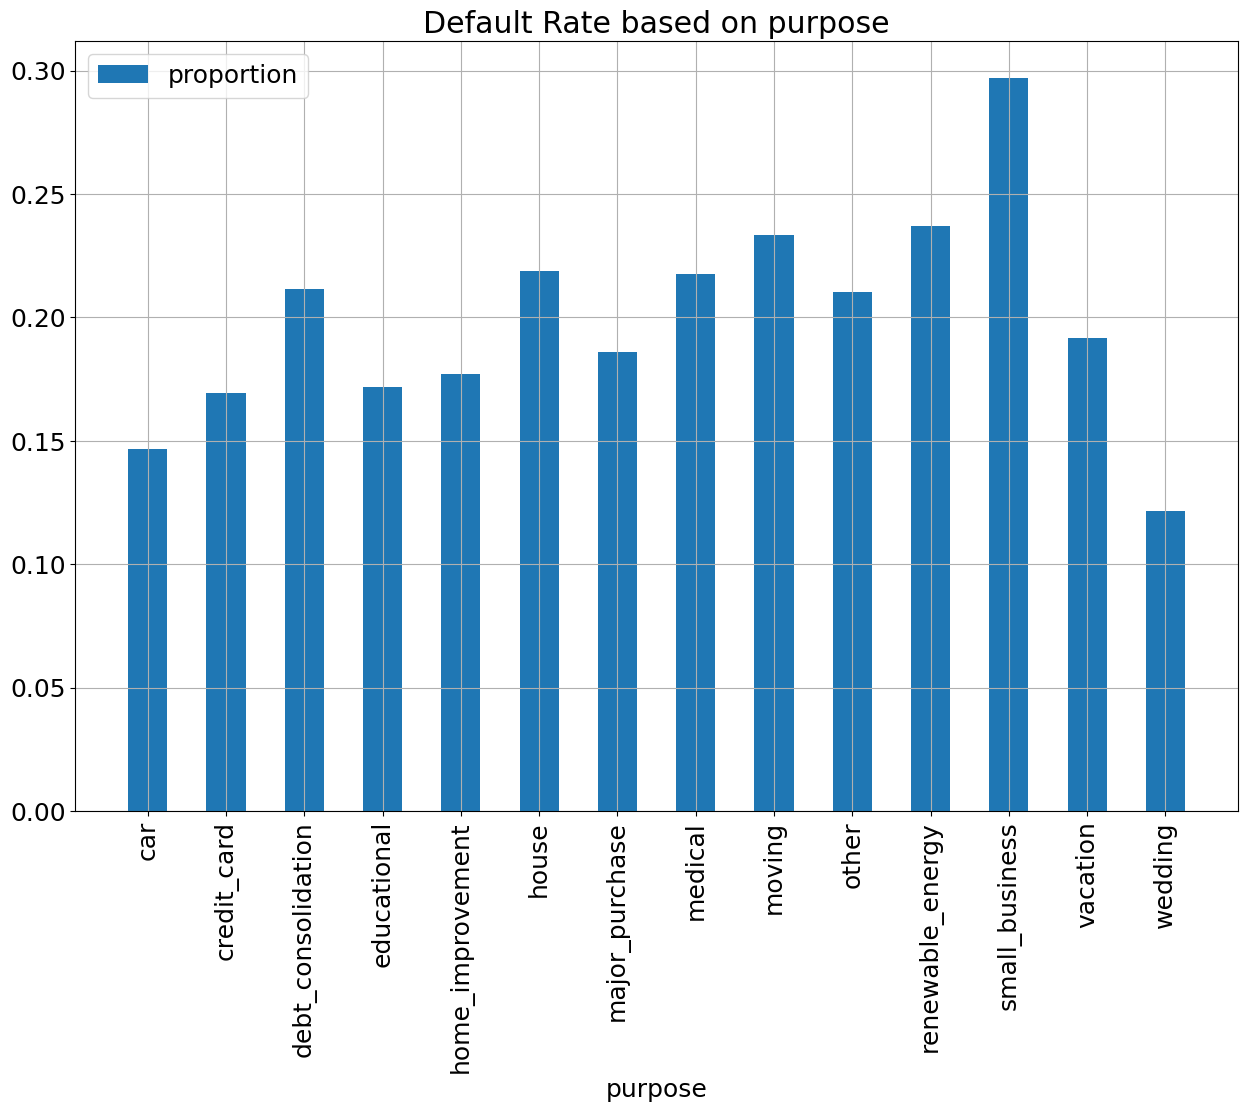

In [88]:
plt.figure(figsize=(15,10))

p = df_train.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

p = p.plot.bar(title='Default Rate based on purpose')

plt.autoscale()
plt.grid(True)
plt.legend()

plt.show()

Notice how small businesses despite their smaller scale have the highest probability of default

In [89]:
df_train['dti_cats'] = pd.cut(df_train['dti'], [0, 5, 10, 15, 20, 25], labels=['0%-5%', '05%-10%', '10%-15%', '15%-20%', '25%+'])

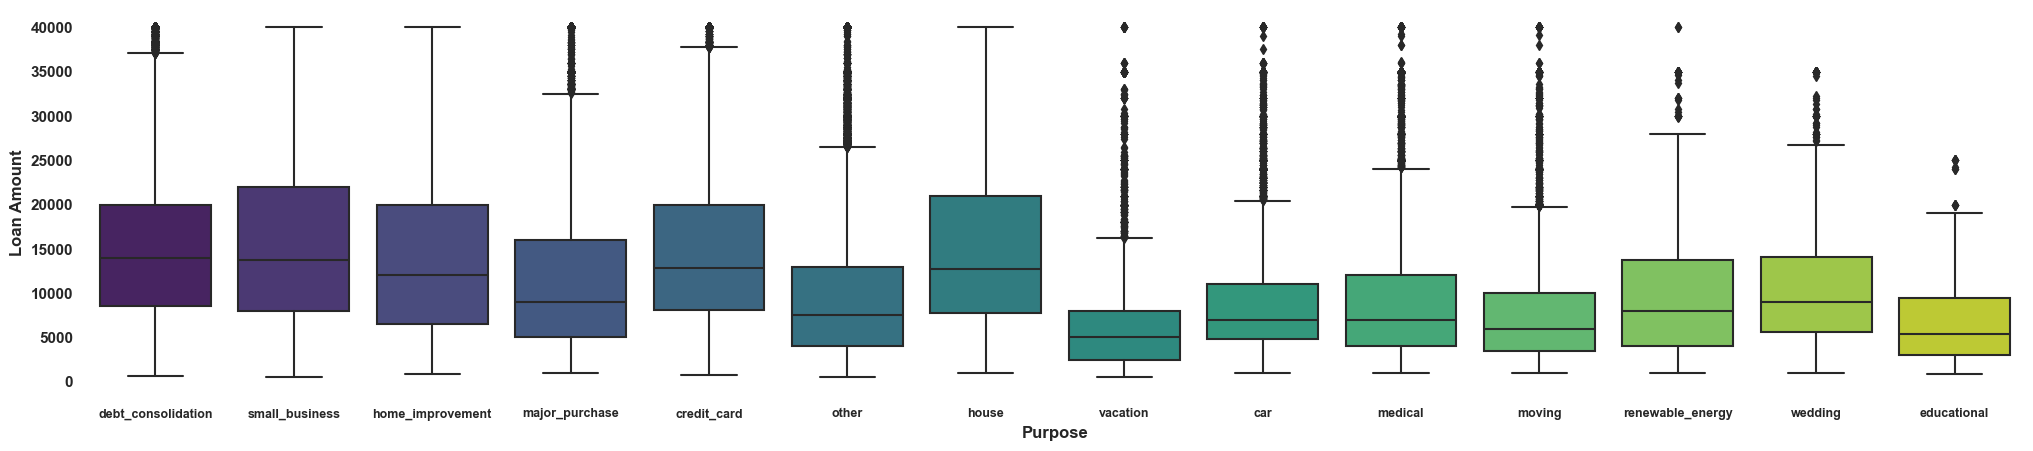

In [90]:
sns.set(rc={'figure.figsize':(25,5)})

sns.set(rc={'axes.facecolor':'white'})

ax = sns.boxplot(x='purpose', y='loan_amnt', data=df_train, palette='viridis')

#plt.title("Relationship betwwen Purpose and Loan Amnt", fontsize = 30, weight = 'bold')

plt.xticks(fontsize = 9, fontweight = "bold")

plt.yticks(fontweight = "bold")

plt.xlabel("Purpose", weight = 'bold')

plt.ylabel("Loan Amount",   weight = 'bold')

plt.autoscale()

plt.grid(False)

plt.show()

- **Title:** The loan title provided by the borrower

In [91]:
df_train["title"].describe()

count     1328650           
unique    61681             
top       Debt consolidation
freq      660960            
Name: title, dtype: object

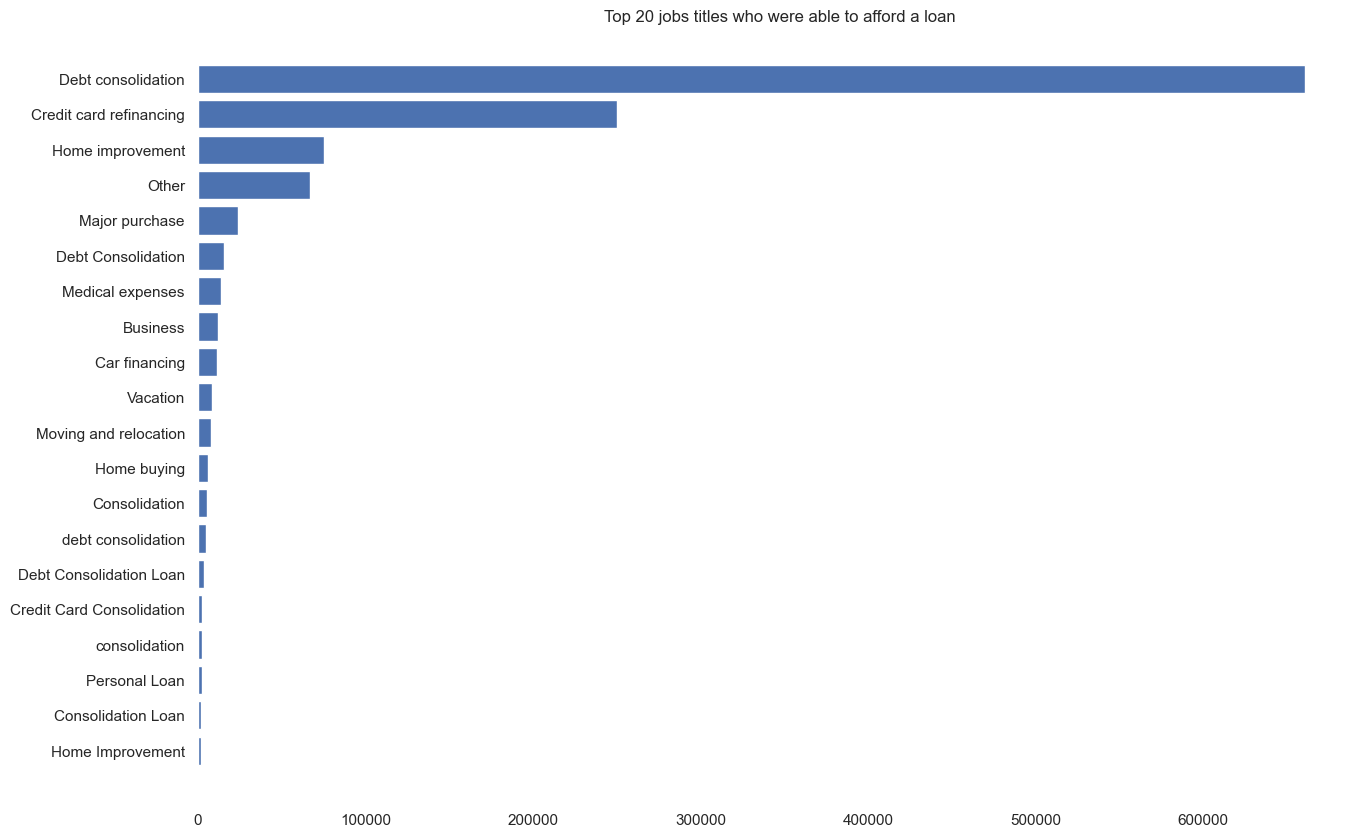

In [92]:
plt.figure(figsize=(15,10))

plt.barh(df_train.title.value_counts()[:20].index, df_train.title.value_counts()[:20])

plt.gca().invert_yaxis()

plt.title("Top 20 jobs titles who were able to afford a loan")

plt.autoscale()
plt.grid(True)

plt.show()

We apply the same reasoning as "emp_title". There are too many features. There is clear need to organise and group these variables.

In [94]:
df_train.drop(['title'],axis=1, inplace=True)

## **Verification Status**

<a id="5.11"></a>

---

- **Verification Status:** Indicates if income was verified by LC, not verified, or of the income source was verified

In [95]:
df_train.verification_status.value_counts()

verification_status
Source Verified    521273
Verified           418336
Not Verified       405701
Name: count, dtype: int64

In [96]:
table1 = pd.crosstab(index=df_train['verification_status'], columns=df_train['loan_status'])

table1

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified         59535        346166    
Source Verified      109232       412041    
Verified             99792        318544

In [97]:
df_train.groupby('verification_status')['loan_status'].value_counts(normalize=True)

verification_status  loan_status
Not Verified         Fully Paid     0.853254
                     Charged Off    0.146746
Source Verified      Fully Paid     0.790451
                     Charged Off    0.209549
Verified             Fully Paid     0.761455
                     Charged Off    0.238545
Name: proportion, dtype: float64

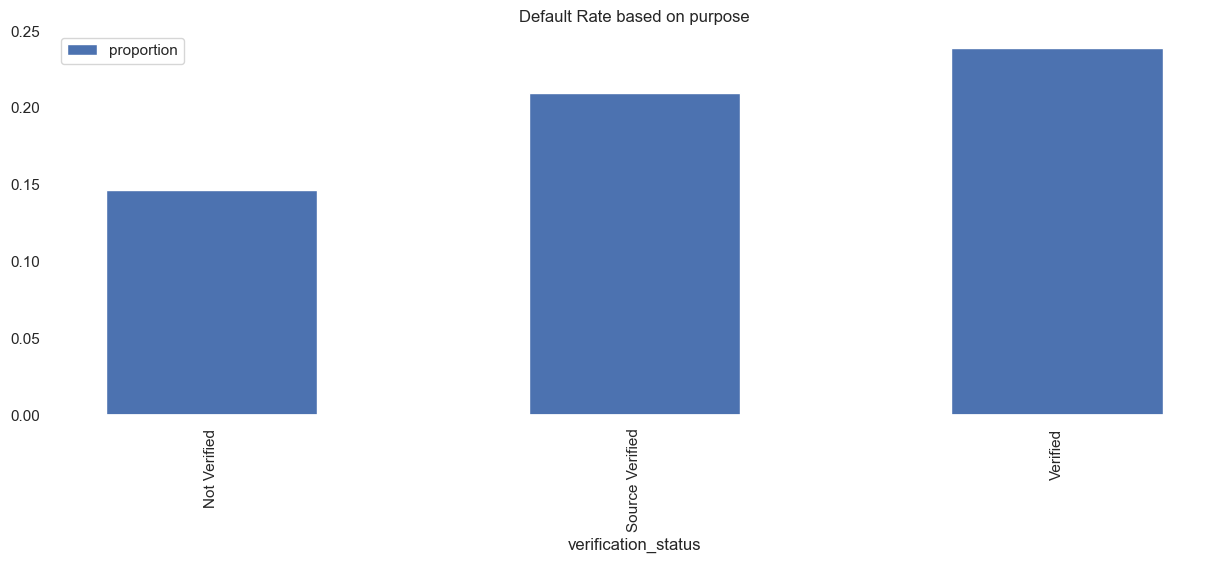

In [98]:
plt.figure(figsize=(15,5))

p = df_train.groupby('verification_status')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

p = p.plot.bar(title='Default Rate based on purpose')
plt.autoscale()
plt.grid(True)

plt.legend()

plt.show()

Verified Loans show a higher rate of default

## **Issue Date and Earliest CR Line**

<a id="5.12"></a>

---

- **issue_d:** The month which the loan was funded
- **earliest cr_line** The month the borrower's earliest reported credit line was opened

Lets extract the year and the month for an easier analysies

In [99]:
df_train['issue_d'] = pd.to_datetime(df_train['issue_d'])

In [100]:
df_train['issue_d_year'] = pd.DatetimeIndex(df_train['issue_d']).year  
df_train['issue_d_month'] = pd.DatetimeIndex(df_train['issue_d']).month  

In [101]:
df_train['issue_d_year'].value_counts(normalize=False)

issue_d_year
2015    375545
2016    293095
2014    223102
2017    169300
2013    134804
2018    56311 
2012    53367 
2011    21721 
2010    11536 
2009    4716  
2008    1562  
2007    251   
Name: count, dtype: int64

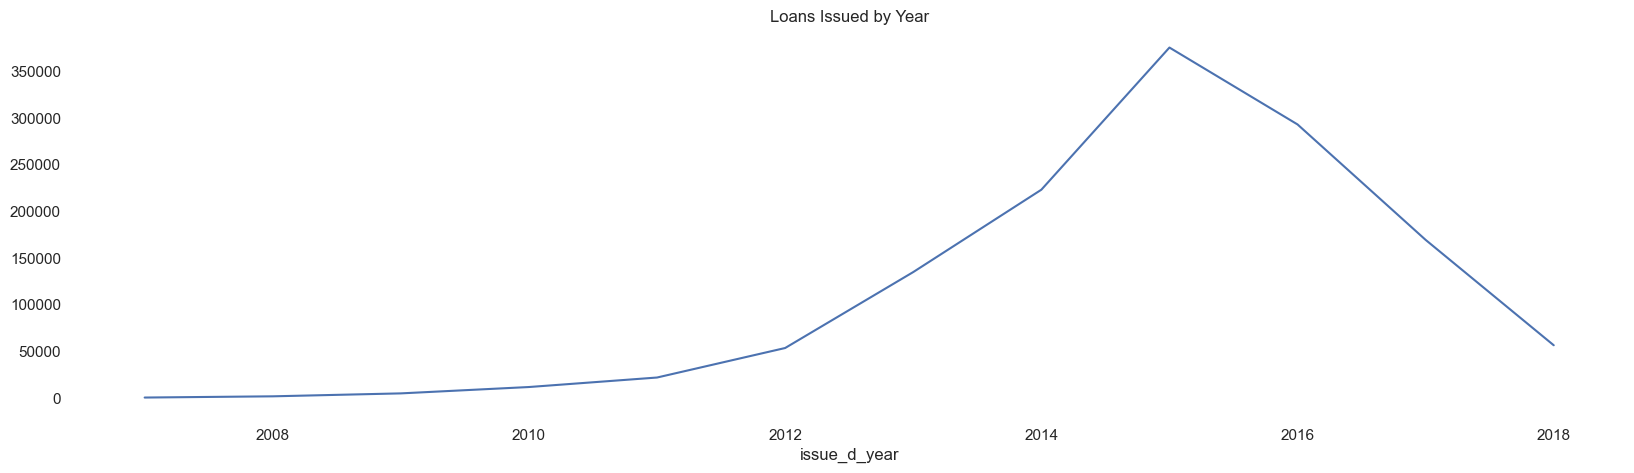

In [102]:
plt.figure(figsize=(20,5))

(df_train['issue_d_year'].value_counts().sort_index().plot.line())

plt.title("Loans Issued by Year")

plt.autoscale()

plt.grid(True)

plt.show()

Most of issued loans happened in 2015

In [103]:
df_train['earliest_cr_line'] = pd.to_datetime(df_train['earliest_cr_line'])

Drop old earliest_cr_line

In [104]:
df_train['earliest_cr_line_year'] = pd.DatetimeIndex(df_train['earliest_cr_line']).year  
df_train['earliest_cr_line_month'] = pd.DatetimeIndex(df_train['earliest_cr_line']).month  

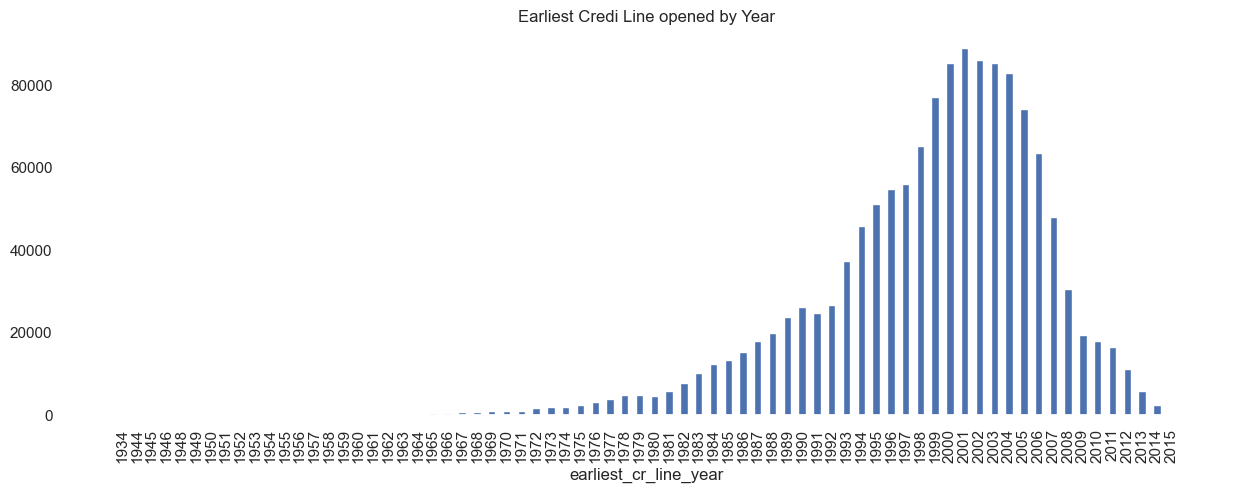

In [105]:
plt.figure(figsize=(15,5))

(df_train['earliest_cr_line_year'].value_counts().sort_index().plot.bar())

plt.title("Earliest Credi Line opened by Year")

plt.autoscale()

plt.grid(True)

plt.show()

In [108]:
df_train.drop(['earliest_cr_line'],axis=1, inplace=True)
df_train.drop(['issue_d'],axis=1, inplace=True)

In [109]:
df_train.drop(['issue_d_year'],axis=1, inplace=True)
df_train.drop(['issue_d_month'],axis=1, inplace=True)

In [110]:
df_train.drop(['earliest_cr_line_year'],axis=1, inplace=True)
df_train.drop(['earliest_cr_line_month'],axis=1, inplace=True)

We wont consider any date variables for modeling, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date. 

As for earliest_cr_line it presents to many features

## **Address State, Debt to Income Ratio and Annual Income**

<a id="5.13"></a>

---

- **Addr_State:** The state provided by the borrower in the loan application.
- **DTI:** A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- **annual_inc:** The self-reported annual income provided by the borrower during registration.

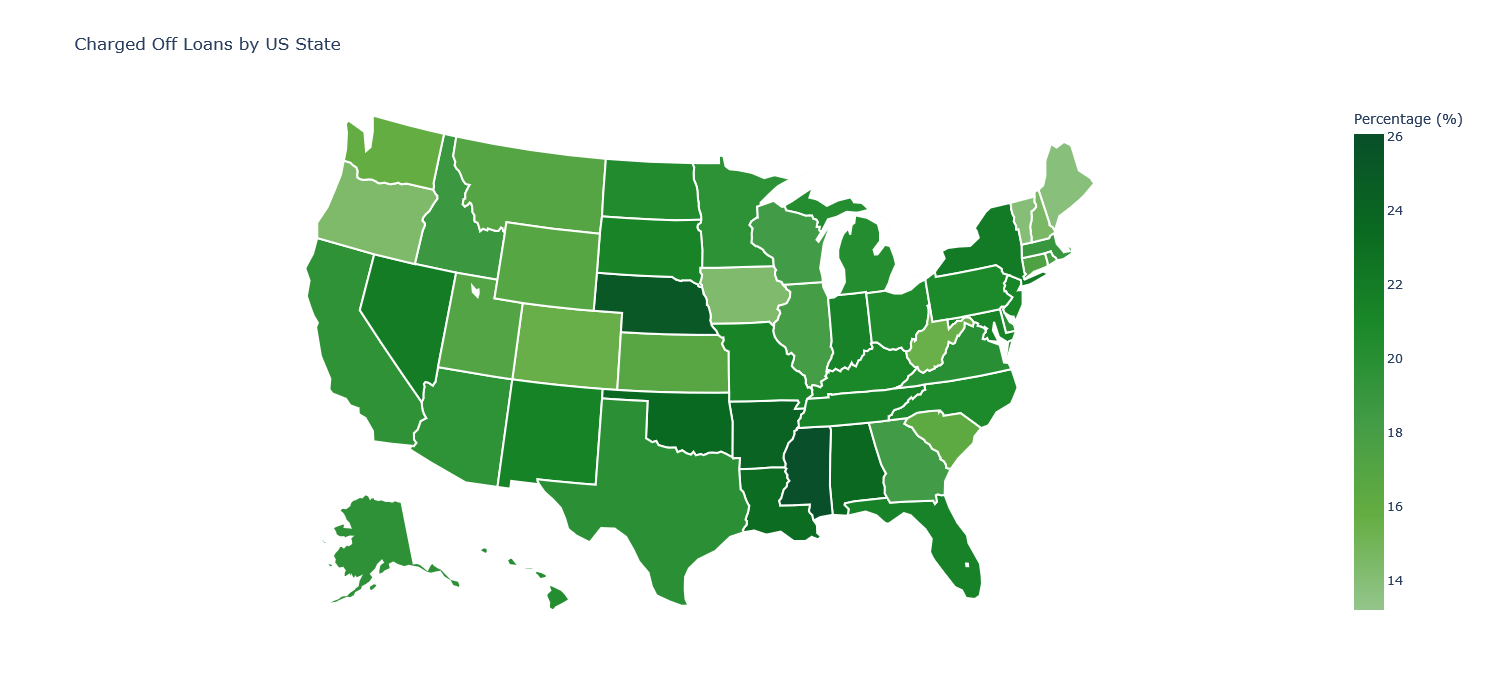

In [111]:
temp = pd.crosstab(df_train['addr_state'], df_train['loan_status']).reset_index()

temp.columns=['addr_state', 'Charged Off', 'Fully Paid']

charged_off_percentage=pd.DataFrame({'charged_off_percentage':100*temp['Charged Off']/(temp['Fully Paid']+temp['Charged Off'])})

temp = pd.concat([temp[['addr_state', 'Charged Off']],charged_off_percentage],axis=1)

temp1 = df_train[['dti', 'int_rate','addr_state', "annual_inc"]].groupby(['addr_state'],as_index = False).mean()

temp = pd.concat([temp,temp1[['dti', 'int_rate', "annual_inc"]]], axis=1)

temp['int_rate'] = temp['int_rate']

temp['annual_inc'] = temp['annual_inc']

temp = temp.round(decimals=2)

temp_copy=temp.copy()

for col in temp_copy.columns:
    temp_copy[col] = temp_copy[col].astype(str)

    
colorscale = ["#94c58c","#64ad42","#429b46",
              "#1a8828","#0a6921","#094f29"]

temp_copy['text'] = temp_copy['addr_state'] + '<br>' +\
    'Charged off Loans: '+temp_copy['Charged Off'] +\
    'Charged Off Loans (%): '+temp_copy['charged_off_percentage']+'<br>'+\
    'Average Debt-to-Income Ratio: '+temp_copy['dti']+'<br>'+\
    'Average Interest Rate (%): '+temp_copy['int_rate']+'<br>'+\
    "Average Annual Income:" +temp_copy['annual_inc']

data = [ dict(
        type='choropleth',
        colorscale = colorscale,
        autocolorscale = False,
        locations = temp_copy['addr_state'],
        z = temp_copy['charged_off_percentage'].astype(float),
        locationmode = 'USA-states',
        text = temp_copy['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = 'Percentage (%)' )
        ) ]

layout = dict(
        title = 'Charged Off Loans by US State',
        geo = dict(
            scope='usa',
            projection=dict(type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
     height=700,
             )


fig = dict( data=data, layout=layout )

iplot( fig, filename='cloropleth-map2' )

By using the plottly library an interactive US map was reproduced. It presents by state:
- The Average Debt to Income Ratio
- The Average Interest Rate
- The Average Annual income

We present bellow a funtion that retrives the states that presents the highest values

In [112]:
def sort_max(df,Features):
    temp_max = pd.DataFrame()
    for f in Features:
        a = pd.DataFrame({f: [df.sort_values(f, ascending=False)[f].values[0:3],  df.sort_values(f, ascending=False)['addr_state'].values[0:3],]})
        temp_max = pd.concat([temp_max, a], axis=1)
    return temp_max

In [113]:
Features = ['Charged Off','dti', 'int_rate', "annual_inc"]

max_by_state = sort_max(temp, Features) 

max_by_state.columns = ["Charged Off", 'Debt-to-Income Ratio', 'Average Interest Rate (%)', "Average Annual Income"]

max_by_state.index=['Top 3 Values', 'Top 3 States']

d = dict(selector="th", props=[('text-align', 'center')])

max_by_state.style.set_properties(**{'width':'10em', 'text-align':'center'}).set_table_styles([d])

By looking at the table we can see the following information:

- Mississippi, Nebraska and Arkansas have the highest amount of charged of loans
- Idaho, South Dakota and North Dakota have the highest debt to income ratio
- Hawaii, Idaho and Alabama present the highest interest rate

**Debt to Income Ratio**

In [118]:
loan_grades = df_train.groupby("dti_cats").mean().reset_index()

sns.set(rc={'figure.figsize':(20,5)})

sns.set(rc={'axes.facecolor':'white'})

ax = sns.barplot(x='dti_cats', y='int_rate', data=loan_grades, palette='viridis')

#plt.title("Relationship betwwen Purpose and Loan Amnt", fontsize = 30, weight = 'bold')

plt.xticks(fontsize = 9, fontweight = "bold")

plt.yticks(fontweight = "bold")

plt.xlabel("Debt to Income Ratio",   weight = 'bold')


plt.ylabel("Average Interest Rate",   weight = 'bold')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.autoscale()

plt.grid(False)

plt.show()

TypeError: Could not convert BCAAADDAAABCBBBCABACABADCEACCCABCABDBCCBDCEBCBBBACBACBACDAABCCDECACABAABBBCBBDCBBDBACBABABCCCCACBBAABAAACAABBABABCBCAABACABBBBBABEBDBABBACAABABCCACADBBCDBBCADCBDBBBCADCACCBAACBACFABBCCBABCBBDBCABBCDABBBBBBABDABAEBBDAACDBADACCDBACBBCCBABABBABEBCBAABBBBFAABABCCBBBCBCACCBAADBADCDFBAABCBFCDABDACABACBCBBABAACCCACEEACCDCAAADBBCABBBADCDDAABDACBCEBBGDBDDCBCBECBCAAABDCDCDAABEDBCBACBAABBECBAACCABBCBBDCABCACBABBCCCACBCCBBCBCBBACCDDCAABDDCCACBBADBCCACDBCADBBBCDBCDBADBBACADBBBBACAACCCCCCCABBCDCAACCCBDECABBAABCABBCABDDADBAEBDBBBBDCCBCBBBDCBBBADBBAACDCCBBDBBEACCBACCDCBCBAAAABAAAAADBDBBCBACDCADBCCBBDCCCDBBAABCBAACADBDBBABBBADBDCDBBCCABBAEBGDCBECADCCBABBBBCAEEBCCACCCCCAAAADDAABBABBCCEBCBBABBACCBCAAABBCBCCBBDABEABCCBEFDBBDBCDBCACBADABBABCEDCACACBBBCCACCACEDBDAABACACDBBCDEABBCBCBDCABCBADAABDBECDCCEAEGBADBBCCABABCDCBBBACEAEDBCECEDBCFBAADDBBECCDBABBBCCBAABCBDCEBAACBAAAAEBCCBBBECCBADADBBCBECAAACCBBBBBCAAABBCADDABACBAACFABBCFDABBCCCGBBACBBCCFBCABBBBDBDCCBBEACCBCBBDAABABADAABDDCBABBEBCBDCCBCDBDCCBCABBDBBCABBABCDACDBBBBAACBBBBBACADBBBCABBBBCCECCBCBCDDACACCBEBCBAAAEBCACDBCCCDAAADAEABABBBADABBBCAEDCBCBBFDACBBBBCCCBCBEBABCBCCCCBEAAABACBAAAABCDCDACECBAABDABCBCACADAGABCBBAAADACCBBCCFBBACEBACAEFBCBAACDBCECADBEABBBBBGBBACCEDCCACADCABABDAAABDDAEBCBFBBAABAECBBABBEBBAEBCBBBCABCBCAEABABADBCBAEABEACCACDECCACBBAADABABBDBABABAEDAACBCBADCCBABECBACBCBBBAADCDBBCBACACBBACACDBBCACDBBAACDBACAAABCCEDCBCABCBEAABCBBACBCDBCAAAAAEBBAECBAAABCBBCBDDAADCBBBDBAABBBBDADBBDACBEEBAABCAECCBCAAEAFCABACABCABBBCAACADCFCABCAACABDAAAAABCBDADCCAACCDBCBABCBCBBCFBBACBCBBBDBCBBBDBCDDBDCCBCABCBDCDBCBBAEABBACCBCBBABEECBADBDABCCBCDBABBFBBACBFABABCCDDCEADDBBACDAEACCDBBCACBBABBCDBCCBBBBCABCECABDACBBEBABCDBBABCCCEBCACECBBBACBBDCCBDCBBBDBBDECBDECAABABCAEBCBAABABBDACCDDAAABBBBACADCABBBCCABBBBABCAAAEAFADCDBAABACCBDACBBABAAEADEBDECBCCBBACCBACBACCABECAABACCDBBBCEBACCBDEBBABAFBCCABDDEABBACACDBCBCADCBCEACBBCBBBAACDBABCBBACBAAAABABECDBCCACABADEAACBFADDBAACAAEBCECCDBACDACBCBBCCBBCABADCCBBCCDBBCDBCABBCBEBBBCBCBAAAECAEACACBCDBCBBBCCBBBCABEADBACBBBCBACBCBBAACCABCBAAACBACCCBCCACBDBCBCABCBBABCCCCBDCBBBBBCBCDADBBAABEBBBABACACBCDDDCBBECBDABCABBAABFBCADBBDBBBCBAABBBCBBACDCDCCACDBBCBCAADEAABBEAFCCDDACBCADDABAAAABAAAACCCBACBBBCDAECBCCCBDBDDACFDCDAAEDBBCCBEAEBBBBBBBEBBCABCBBBCACBAAABBABBCDFDCBBBDBACDDABBDAACDCCCDBBBDDECDAFADBBAADBBAAABDBCCCBCABACBBACABBDBABCABCBBBABBCDCBAABCECCADCBEEAABCDABDCBBADBBDAABACCCBCBBACAAADBBBBDCBAACBEBAEADABBCDCACBAECBABABCABBDCBCDABDAECBACACCBCCAADDBABAABABAAEACEAAACDACADABABBCACBCADACDAEBCDEBCBAABBBBAAACAACABBCAACBABAAAAABAEABCCEDBBBCCBCADCBACBAFEADBAABDCABACCBAECAEBCACBBBBAEABCBBCDBBBAEDDEACAACDAADBABCBCBAACDBBBABBEBCBBCABABABDCDBBEBCCACDBBBDECFBECBCEBGCBCCAABBABBBBBCBBBCBBBBBBCACBCCBCEABACDABCCBBDADECBBBAAADBCBBDAABBBBCEBCEDBCAEBCDCABBBABCCCBCBBBCBCABACBBCDACEBCBDCADBBBBBBCBCCADCBBCDBEABADABBCECABCBECDCADBADCBDBDDCAAABCCBDBDAABBBCACABDADBAAECBBDBBBABDDCADBEFCACEDABABBBAABCBBEACCBBBCABABABCABBBCBBBBCBBBBABCDAACBBCBBECEBCDCCDBBADDCDDBBABBBEFAEBEBAEBBDCBDCCBCCACDADDDCAAACCFCBCCCBBBDBACBDAAAADDCACBBBCEBBBBAABBBCBBDCBBADBAABACCBBDCDABBCBAADCBBACCCBDBACDEAADCABADBABABACDEBBDCBCACCBCBDBABBCACEDCDCABBADBBABBBBAEBBBCCCBBCCACCDACCBBBAABCAADDEDBBDCEBCCCCABBABDBBBDBAAAAABAEBACACCABBADCBBAAABAACCEDDABEDBBCBBAABCCABACBABBACDDDACCCABCDCBAADEBABBADBEBCDBBAAECBBACAECCAAAAABDCABCAABBCBBBAACBABCBBCBBEEDCCCAAEBBBBCBBCDDBCEACEBBACCACCCCFCABACCDBBBABDDDDDBDADBBDBABDDBACECABCBABABCCACBDDDEDABABCCDBAEAFBABBCDCABCCEACDBBAAADBCCBBCABABCBCBBBBAEAAABBBCDEBFBCCACCCABABBBBBBABBBAABABBDBDDAECACDCAAACABACACBBAECBCDABDFACBDBACABCBACCACBDEBDBCBACCBDDCDBCBCBADACCABAABBBACACAACBBCCACABCBCBBADABEABBCABBCBGBBABACAEDGDCBCBDCBABBABBCCABBBBBBAABCCCBCBCABABCBDAAADCBBAACCBACBABCBBBABCBABBBCAFBCCCBBDABACCDABAAABFCBBBADBAECACACACABCBECCBAAAADGBAAECCCCFABADBBCABBBABADACACDBCBAAACBABBCCDBBABAGEABAFBBACAADECBBCBBBAAACBBBAEABDEACBACDBCEAEBBACCBADDBABCADABBCADCEBDABDEBBDCBBBECBCDACDEAADABBCBBBCECCCBBACCCACBCDABCCCADCBDCBBCABDBBCDABBBABCBCCBAABAADCBCECCCBCDCBBBABEDDABBAEACBBCCADBDBACADCBBDCBAAECADDDFACCBCBDBCBBBACCCEBBBACDBBCCCACBDACAABCACBCBBBDDBABBCCABCBECCBCBDADCDCADCBDCCDCBADBBBCABCBBBDBAACBCBDADCABCABDBAAABDCCBACCBBACBAABEBEADAAACABECCACBBCCGAAACBACCCCBBBDFAACABAAADBCABACCBEDBBBDBECDBDCDCAAAABBBCDDBADCACBCCBADCBDBEAAACCBAEBAABADAACAACCAABCCCCBEBBCABDEAACAABABDBBCBBAABACBAABADADCGBCADAFBCBABDCABABCABCACCABBCEBBCADABBBBADCCBDACDAACABCBAAABBADCBBCBBCFDBBBECCCBBBBFCACACBACCCGAAABBBBBBDBBABDDDCCCADEBBBACBCABCCBAADEBACBBBABBABBBABABCCBDADBECBCCBBBCBCAACBCBCBACBAEBDBAADCEBAACBBBBBDCBBBCADBBCBAAABCABBCCCACADBACBBBDBCBACACBEABDEBBBCFCACDCBADBACCBBCABBDBCDACAEACACCBAACBBCAFCDACBDBACEABABCBBECBCAAACCCBBBCCCBBDDECCCAABBBCBCEDBBCBBAABCEEABBDACACDCCBAABBABEBBBABACBEBBBCCAEBBCBACBEBCACBCBBBABBCCBCBABCBAACAGFBBAEBCABBEACACCDACEBBCBACBCCBBCBAABDDADBCCABBDBDBBBDABBDCACCCCECGAFCACAADABBDACCCCBAAAACCBBCCADBABBDAABCCDADACDAAABCAACCGBADDBCCBBBAECCCDADEBBBCCBCCBACBCBBBBBABCFDBDCBDACAABAEAEAAAAEBADCBDDAEBAACDDBCAAABDBBBABCAAAFBABDACCCACGADDCBCACDBAADBABABCAABABGBDBBABAEACDACABBADBAABEBABABACCECBCBCBBDABDBBABDCBBBACABBDBACACACDAECBBAAADDFCBBBBDBDAADBCBDCACECBACFAAABAEDBBDDCECDBBDDABAACDABBCBBAAFAECCABAAAACDBCBBDACACDDDECBADACCABDBACBDBCBDCAAEDDCAADBDBDBABDEBBDBBAEACCCCCBEBEBCBBBEBCAACDFBAACCBABAECBDDBAAECAABBCDBDCBBCCDAABBCBACBCECECBAACCCACFBDADAEAAAAACAABDCBACBAABCCBAEBBBCBABACEDBBCCCGCCCADABABAFGBBBBADCBCCDDCBCCCCBADCCBACAAACBDBFCACBABBAAACBBCCBDBCEBBBBCBCCBCCBACAECBBCAAAAEADCBADCBBDCCACABGAACEDEBBCCDABDDCBCBADBABBBBBBBBAAADCCADABCAABBBEBCDBCBBACCDACBCBCBAAACAEACCABCCADBDABBBCADDCEEADDAEDCCACDDEBABDECADBACBAACABEEBBCACBCBBAAACAAABCCACBBCBACAAABDCCBABCCBCADCDACEABCCABCCFABDAADBCACABCBACCDCBDBCBBAEGBCBBCDABABEFBBBDBAABBCACBAAAECBEAFCCDAFACAGCCACBDEDABDBBCAABBFCABDBAADCCCCCABBDDCCBBCCBACECBBBEBCCBBDCBCCBBBBACCDBCADDEBAABCBBCDCBAAABCDEBBAECBAAAEBDCDCDACCBBCBABAABEBCBABBACACBCADBCBBBCDCCBEAACCBBEABACBBEBBCEGCBCBCBABCADAABCBCAABBBBABBBECABCDBDDACBABCAADABBAFABBEDACCCABCACACBCAABCAEBCBCABCDCBBEDBACEBECBABACBCBACFBCCBBBBABADABADACDBADAEABBCCBCAEBCBCCCABECDABDBEBABAACCBACEABCBBCDABFDBCCEABBEEABDBADDAAACBBCABACCABBCCCEBBAAABCCCDEABBDABDDDCBAAGEDECBBACCBADABAEBDBADAEBCBBABCCCBACDCAFBDBCCCFBACCBBECBBACBBACABCCBBAACCBABACBBCCAAAABBAACDBBCCACBCDDCABECABCBBBBFABADCABBEDBAABABCEDCBADCCBCBACACCBACBBCBBADCDAAABBBABBABDCADEABBADBEBBBDBADBBBBFBCAADBCACCCBBDBBEDCBABBBCGCBCBAABBBCCBEAACACADBCBCBGDABDDBBBCECBCBBBBBDBAEBBBDDDEBABDBACADBCBCBCCABBDBDCDCFACBBBCCCCCCCDCABBBCBBBCCBBCADDACAEDCBDBBABABDBBCDACCCBFEBBBACBCBBDBDACCBBCCACDBDCBCBBCCAABEABBBBCBCCDBAEFCBBBBBCBCADDACABACCBCADABBBCCCBBBCDBDBCBABBBABBAADCDADBBBDCBDCCAEAABABAADCCCCBDBBCDBCEACBACAAEEEBBCBBBAEBCBABBCAABCBBEBBBBAABBBBDBBBCCBBDACABBBBAACBBBCABBBABBBBCCBBEBADABBEDECAABBAECABACCBAAADBCBAABBAAABBDECCCABBCAABCBBEAAABABCCDBBAAADABADCABACCBCACAECACDCABDACBECBCBCACBDCADCABCAACDADCABBACBBBAABDBCABCCAAAAABBBABBABAABBCACBCCADCBCBABCAAAABDACBCCCAABBBBDECAABBADCAAABBCAABDBBBABBEBDABBBABBCCADACDACABECAACAAACBFBBBBBCDDCBBCEBACECBAABBBACBBACCEAEBEDAEDBEABEACDABDAAEABABABDCECAEABCDADAFABBADACADFDDCCCBBCBCAAAEBCADAAACABDCBFCAABAAACBABCBABACCCCABABAABDBDDBBCAABBABAAABCEGCDBACDACDADCACCAEABCECDDCDEDBEADBAACCACAEDBFACBCBABACBCEBBCBCAADABDCDFBBBDBCDAAACDCACACCCAAADBCABAAAADBBAEBBDBABCCBCCAACDAADAADACBDFAADACDCDADBDAABACCBBCCABBABCADABCCBDCDADCBABCAFBAAACAABABCBAABCACDABAAAACDDDACBABACCBACBEBCDBACBAAABABFBCDDBCBCCCCAEBCABDCABCDCBBAABAECDCGACDEABBEACCBBCBEABDAAABFCECAABCBDBDDABABDABABCBBDABBBBBBCBBBDCCBBCBCBCCBABCACDCBBDDBBDCCBBBBDFBCEBCBAEDCBCCCDBBACABEBDCBDAEABCBAABCBCBCCACBDBDCBAACBECCCBBCDCBBADCCBBDBBABDCAFBCCAAACBBBBCCCACCDFCAACECEECBCBABACDCBACCDACBBCCCDCBACBBCBAAECBCCDCBCCBECBCACAAABCAAADCDBADGABABCBABBCBEEBCCCBABBACACDBDBBBCEBDEBBABBECBBAAACCBCBCBABBACDABABBBBAABDCCABBBDADAEDBBABFEDECCBCACCABACBBCDAABBEBBFBBBEAFCDBDBCDDDABEDCCAEEBADACBACACDADCDEACACCCBCECBBDDBACCCCCDDACBCDDCCBCDBBAEBAABCACCDADBDBDDCBCBCAABCBDBCCBEBBCDDBBACCDACBCBCBBBCBCBAECBCABACCACBDADBABDABACABBAECABCDBBBCCBDACCAEBAABDDDEBACBAFEEECEFABBBCCCCABAEACCBCBCCBBDABCEDDCDCCCBBDDBABABBCFBCCABDDDBCBBBFEDBBBBBBDCCCBBCADAFBBAAAADDDCBEBBBCBBBBACCBBACBACAABFCACBAACCBBBABDCCBCABCABEBEABEAACCAAABBCBCABCBCACAAAABABDDCAECAAAACAEDCAEABCBABBACBCECDCBCEDBCBAABCCDABBDBABDBAABBDBEDBADBCBADBCCABCBAABBABCCDCCBBDAFBBBDABECADCBDCCCFAAABAABECBFBABACDCBDDABFDABCAABDBAEEDFABBBCBCACBBECBDBBABAFDABCBBBCCBADBADEDEACFAADCAAABACBDBEABADACEABBCDACACEBEECCCCBBBABDBBCDGBDDECCDABBBDCDCBACDBBCDBCBBCDABCDDDEBAEDAACCABEECBCDBCBEEBACBEEBABDDACBADCBCDCEACBBCAAABECCDBCBABCABCAGBBAEABDACACAADCBACBDADDBADABBBEEBAAEEBECABBDBABDBBDABCDCCDABAACABAAADBABBABBBBACAECEBBABABCCDDCBCABCDAFADBABCCCABCBBBACFCDCBBBAABADCEAAEAECECACAADADADEBBBADADADECCCBBBAEADDABAABBBBCBCAFACDACACAADBBBBDDBBCCCBCDABAAAGBDBBCCDAACABADCBCABADCACABCBBBAADCACCAABBCCCCDAFCCCBBDDCBBBBADABAEAAACEBCBAACAABCAAACCBBBAAACFBACADBBABEBEBBCBAADDDBADBBBBDBBBABCACCABBBCCDCBACABBCADDCAFEBDAABBAAADBECCBCBBCCECECBAAABDCABCAAEBABBABEABCACABCADAECDBBBACEABDBCDEABBCCCBCECBCECADACCBDCBACBCBDDBCCCBACEAACBACBAAABBEBBCAABGBCBDEBEEBBCBBCCCDDCCCCACBABADABBBADCDADABACABAABBDBDBBDACABEABCABEABAABBCBABDCCAABBEBBBACBACECACBBCABCAAAACBBFBBBCBCDBCAABBBACAFACCABEAACDABADBDABBEAAACACDBBCCAABBDFBCBAACCDCDAADBACBCDBDDCADCCCCAABBBAAFBCCAAABCABCDBBBAAAACAAAEBADBCABFBAEAABACBABBDABABBAADCADBECAEBCBBBBBBAEACBADACBBBBABBBACEBCBBACDBCABBBEBCAABBEABBBBAAABBADBADCBBDACAACCABEACABCABECAACAECBCCADCBACBBDAAAEABCACCDABFBBABBAAABABECDAABDDCBDBCDDAEAACACBCBCACABBBBEBBCBBACABACABABBCAADBAABAAABBCBBCGAEDCDAAEBAACBCAADABAADABBBBBBCAACABCADDCCBFCBBBBACAACACBCBCACADBCBCCDEDGAACBBBBDDDBCEAACBEABBCBACCACEADBDBBABADEFECAAADFCCCBABCCBCDABBFCBABBDDDFBCBCABCACAEBADACCAAABDACBCCDBCBCCAEBACECECCBDBBDACDDBDBFCBEAABACBCBCCCEBAADBABDCBAEBCCADDBDAEADBCAEBDAEABADACBAAAADDECBACDAABCBDABABBBBCAABABCAAABEABDAAECBBAACABACAACEBBBBCAABACDBAACCABBACCCECBCCBBCCDAAECEBBFACECABAECBDBEDECCAAACAADAACCBCCDAEBCBBBCBABBACADBCABCBBAADABABCABAEBACEBBCABCACDCDAABAABBBEBBAAEACBABAABBBDCBBCBACADBCACCDACECBFBEEBCBAABFBCDAEECBCECDDCCDEBACBBACACBCBCECCCBCBACDCEBAAAEDACABDBACAECCAAAABBCCCCCCAACCBABECBBBCBBBDBAADADFECBEAAABBCCBBCBACCCCABAECAAAADAAEBCBABCAAAABCABCBAAFBCAABCECEDBBCCEEACAAAFCCAABBBBBBECBBBADBBBECACCCBBABEABBAABECDBBEBEBEAAACCBDCCBCDABBDAABBBCCABCEBCEAAAADACCABABBCBCAACCACCCABFCABDBCCDBEBCCAADACABBDCBBBDDABABBFABCBDACBACBBBEBDACBEACBDCCADCAFCABAEACABDDAABACCDCACAABADAFBCAABAEBCAACDCDBAABAACCACABBAACBADABCCBAAAABBDAACCCDAAABBACBACABBABADDAAAAACBAACEBABAAAAACABCCCCBBADCAAABBCABDAAADABCBCBBECBACBBCBECBCABBCCBBDBEBCABBBCCCCCBBBBADBGAAAADADBCECEAEAACCEBEBEAABDFBBBBAACCCABBECBBECACCAABBBEBCDCCAAAACACEEBDDCABEAAAAAAABCCDABCABAEACCBAAAAAACBDBAACACADFDAAECEADCAACBDAACADFBCAEBCBCBBBBBEBAAAABBCBABAFCBEDADEBABDBADEDCBCBACBCCDBBAAAADCEBAEAAADBEFAADABABAABAABDCBADDAAADCDAGECCDABADCAEBBEBACAABCDAACBBEDCDBDCBCECBDACAABDFCABDBBDBBEDDEBBDBFCCCABCAABCAAADABAADACDAAACAEDDCBBACBCCBCCDDEAEADECBAADABACBCCBABABBAAAADBDBDBACABFBAABCDBAADACABBACCDCDACEADBCBADBBBCCCCDBDBCABEACAAEEAACCCGCBDAECAABCBBBBBABEABABBAAACBBBCACACDCACBCCDADABBEBBBCAEDBCACEABEACDBAACBADBCBBAAACEBBBCEBDBCBCABBEAACAABACADBAEBCCCDBCCCACBAECDDFDCEDDBAAABBCDABAABBBCCDBBCAAFBADCCDEEDBADBBCCDEACBBBCCDDADAACDBCAADCCCDBDAABBAECDCBABCAAACAECDBAAEEABBEABCDCFADBGCADBCCAEBABFBBDDADCBACAAACDCBDCBCCDABBBCBBABACFCCABCCABBACCBABCAACBBCAFAFBBCBGAABABDCDABAACABAAAAACABCBCBCBACACABDCCEBEDADDEBBADCAEABADACACDBDCFFBAACAACABDCCCECCBBCBACCEBCABBBCBAACBADBCCABEDCBDDBBCCCBBCBBACADEDDCCBCEBBACCDDCBACBBBDCBBBFBAECCBBBBAAACAACEABADCCBCAAACBBDDACBBABECBEBAAEAACDEBAABBABBACABBBBACACBBCBAAAABBBBAAAACABCAABAADCADCCCAADCCBDCEABCBBBCACBEAACBBBBCCEBDCCAADBDAABACAADCBABABCCBAEADABBAEAACABCBAADACDCCABBCADACBCCECACDBABBAADBADAADEABCCABDABBCFEDBBBABEDDABCAAACADCCAABBCDCBFABBBDDABBCACACBAADEBAABFBBBCACDABDCBBCEDBBABDBCDEABEABCBFCBECBDCCGBEBBCEDAACCDADAEAFDCCDCBCAECBABDDACBBBCCABACAADACABCACCABCADACACBBDACBAEAABAABBBEBABDACBBACCBDBAABBBDADFBDABACABABACBABBACDCFBBBABDCCDACABAACADBBDABCBEAACAACBCCCBECACCBCFDCBCCDABBBBACBAAACADDACCBDBDAFACBBCCBCBCBCDABBCCECBABABBCAABBCBCBABACCCCBEDCDBBBDAABECBCBCCBBCBBADACEAACAACAABCCFDCCCCBABCEAAAAAABCBCBABCDAEAACFBBDBCCDBCEBACDDCDBACDCBBBBBCCEBABAAABBACAAACABACABCCAABACACEAACACDCCAACCDCEBBCCCBBDAACBBACDAABEDBCAABBAACBBFBACCAABAABCBDABABABAEBFAACCCCBBGCCAACDACABBADBFCDACBBCDACBACFCABEGABCABADDCDBBADBAFACCAABABACBBABEADBAEABCDDCBECBAAABBEBECEBCCBBCBBCCBCBBADDDACDBCDCEBBCDAAAEBEDACCCBCDADDEBBCCBCCBDAABBAAEAACAABABBBCDCBBCCCCACCCDACCBAFFABCBABACEBBACABCCBCCBCADBCCCCACEACFDBDGDDCBACAABBBDAACABDAAAAEDDBECBBAEBFCCCCCAABCBCDCECACAADBEACBBEAABDECBCCCBDBABCBBCACBDDDBCBCAADCBDDABABBACBDDBBBBBCCAAADBCCCABCADDCCBDAAAADBCCBCEDDBBABCGBACBCCADACDAAGCABCCADCDCFBBBBCABACBECBDACCCAEBBAACCCCBDDDBCABCCBFBCBDDCCCCDBBBACDDACBBCBACACACBBCAADBDBEEFCBDCAAADCDCDAABCDEABAEBCABBBEAEAEABCBADCCCACAEDDACDDBABEBCCCDDDBBDDDCABACFAADFDABBACBBCACCAACDABBCBABACBCBDECBBDCAABCBBBBBADBABDBBBAACACCBAABCDCDFACACEFCCABCCDBCCABBAAFAABBCCEECABCDBAABBBCBDDEBCBBCDCCBFBBBFCBCACBBCACAAEDCFCAADCECGBABCFBCCDBBCAABBCABCBABCABBBACDABCEBCBEAAAACDCACDABCBCBCBBCADCAEAACEAEBCACABBBAACAADBDBBCEDBDFCCEABECCABBBDCCBCDCCCDAABAADAEDCDCCBBBCBDADACAFBDCAABBBCAFBCAEAAAACCAABBABCCBCCAAAACCBECEADCABADDGBAAEBCCBDCFBABABCCCABACBACCBCCCBBBEEBEBDBBDDDBAABACBBDECCBECBCACCDEDAEBCBCCBACCDCBACBDABCDCBABBBBBBCBABBBECFBCABADBBCBCBBEBBDCDACEBBBEAEBFECBCACACCEABBADBCEAAAEBABAAFCCAEDBFBECFAABBADADDDCCFAABDBACEACDACDACAACGBBCCBCBACECGABACCDAAABAACDECCABBCABAAACBCBACDBBBAAAAEBEADCAACBBCCDBBCEBCEBCCDBCABBBBACCECABABBABACAADBBBDBBABBADBACEAACAACACAABBEEDAECDAEDAACAGAADACDCFACCACCBACDEADAABBDBCBCDBCACBBADBBCBCECABCCACBECCCDABCBABCBDABCCDCCABCDDBABBCBCAABBABACABAAAACCCABCBAABCAACBBABCCBDCCADABDCCAABBAADCADADCAEAADAAAEEECCBDDBBCEDAECBABBBCFABCBACCABBDCBCEACEBEBAADBCDACEBDADCDBADDAABFABCCEBABAABCBABCABBDDDCBCBBEBBBBCACADDAABBBCCBFCBABBBBCCCCADBDCBBBAAACBEBCCEEAAAAAACAACCBABCDBECEBBADDACCBBACCCCABAACDADABAADBABBDBBBBCEBBBABBCBCCBAABDBBABCABACBCBBBCAAABAAABECAAEDBFCBCBFBCBABADAAAAEDCACCBABACAAAABCCAABDCDCCBACCEBBCACBCDBDBDCDDCACEABDBBBAAAADADBADCAEDCCBCDBCCCAADBDABCBBBDCBCDAABDABABBCBAABBAABBACCBBCCEBACBCCDECEDCFBCDBCBBBADACCBECBABCBBDCBDACCBDDECCAAABBBAACBDDBDBBABCAAABAACCCAAEABCBBDCAABBCADBBEDDCCBCGCACBBCBBDBBACBDBBCFADCBBCCCBABCCCAECBDEBDBCBCAABDDBBEAABABBDBEBECCBCCCDCCBCABDAFBABACADEAECEEBECCDCDCBCAACABCBDCAABAAACCABBCBAABDDBCAEDDBCBBABCAEDCDCBCBEDDBEABCEACDEACABACAEAAABBADAAEAACCBCADAEDABCBDABBCBCBECCEDBBCDBABABCEGACCBABADECADBBBBBCDCCBDCDABABCEDCABECADCCBBAEDCDBCACBACBFCBDCABCCCCCABBBCDEDAAABEEAABBBADADDDABBACCAADDABEACACBBBADBBDACDGBDCBAAABDEBABCBDBDCABBFCFCBABCACDCBCABCEAADBCDBACAAEADABBDBCBABBBBABAAABAAAAAADCCBACAADDBCCCAEACBDAABCBDBCACBBECACFDCCAAABBDACACAACBEABDBCBBCCBAGCBCAGCDCBDDCCACCCABACBCCBAEDBCADBDABCCADACCBBBBFCCBABBABCBCAABAAEBBCCCDAACBACEBCBCCCCDBCCBEAAABABACBEBACABACCAAABABBABCBCAABCCCBAAAAACDBEBEBDBACABCCABDCBAACBBEDBDACCCEAEECABEACBBABCBDBCADBCCCBACACDBBBBDCBBAADACBAABCBBCABADAABADBCCBDBAECAEBADCCECCBCADCBBDGCCCBCCBECDCABABCDFACDCCDBCBBEACACBCDBAABDABADBCCEABBCBBBECBBACBCBDBCADDBECCABBABBAECCCBABACDACBEACECCAAABDACDACCEBCBCBDBBCACABCEEACAADCACCBBDCACDBACBBBACBCBACEABBADCCBCCCEDAACBEBCDBABACACBBCBDCCBEAACEABDBDAADDCAABBCCEDACBADBCBACCDECBCDCBDADBBBBECECCBCCBDDBDABCDADBBCAADDDDBCBDBBCABACCAAACAAACADBBBAACECAAAACABBBCBCCBDBACBAABECDABCCEBBCCBADACCACBCBBCABBBCCEBAABACCBCBBAACAADCCCABCBABCBAFBABAAACAABABAAACCBADABCDADBCCCAAAAEDDBACABDEABADCACABFAAAACECBFCADEAADABDBABAADBAAABCBBCBAACACECACBCBBDCBCACCAAEACECCCDADBACCCCBDDECABBBABDABCEDAACCECCBCABBADCABEECDCABDCBCBCADCEACDACBDAADBCBACAABBBCBACCCBAABCDAAABBDBCDCDBDGDDDDFABCBABABCCFBCADBADCDCBABAECBDCCABCBDCBDDBABBCABAADBBBCBCCACACAACABBACAABAABACABDABDBACABDBBDBACBCADCCAAABDCAACDBBBDBBBDAAACBBABBBACCBEBDADAABBCCBACDBCCACDBACBADBABCAACDCDACBABABAECCCAAAABCCABBBBCAAADCCCBDBEBCACBAABBDAAACAAACADACACACAAACFABDDACAACDDDADBABDAAAADACABBACBADBECABBCABABBBDCDAECBDCCABEBCACABBBBACCABCACAAABCAECABBABBBAABDDBBABBBAABBDBCAADCBACBABDDAABBBABDBBABBCACEABDBAAABBCBDAAABDCABAAAADACADDAAADBBCCCADBABCBAABAEBDBABAACBBCBABAAACCCACBAABDABADACABBBEBBCDCABBCAADBCBDDAAABDCBBABBBABAAEADACABAABCBBABAACAABAABBABACBBBDADAABAABDBCBBAABBBAAAABDCDABBCCCAAABCDBBBBADACBABBAAACABDCBAACBEBACAEFACBBCACADCBBBAADBBBBDBAABCACCBADBCABACCDBBDDBBABDAADCABABCBABAABCADCCDCBAAACAABDCAABCCCBAAAACCABAAACCBABBDABDBCCAACAACABABBAABEABBBBBAABCABCBCADCBBBAAAAAABCACCACACBCBABBABACABBAAABCCCDBAABDBACCAADBADBCDABABBBCCBBCBCDAAAABABBCACBAABDBABBBBCCCDBBCCABBDEBACBAABBAAAADAABBBAAABCCCCBCCAAACACADBDAAACCBBACDBDBDBCBBAABAADABAABCDCBAABBADDBABAACBACCACBBBACBECAAECDACDDACCBAADCCDAAADBABCBAABBCBCCBCACCBFABBDDBAADCCDBCABAABBDCBBCABBCCDABDABDBBBABDCCBDEDDABAAABBBCABDADAACAADABAACACBBEBBCBACAABABBADBBDBBAEDDCCCBADACBBDAADCCAAACAACBAACABAABDABBCAADDAABBADACAABCBADBDBADEABACABACCBCCBAAAADCBDBABAADDCBCBACCABDBCBBBDBBCBBAAADBACAABDBABBAABADBAABBAACCABBADCCDDAAACCABCCBBBDABABAECBCAAACDDCCBDBCBDAABBCCACBCAABBCABAACDABAAAFBCAACBCAACCDBAAACACBCCBDACADADBCACDBCDACBBBABCACABCADADBBBAABBAABBABAAAADBBABACBADBBDAACBDCBCCABABDCCBECBAACADAAABCADCCCADBBCBAADBCBABCAADABCBBABAAAAABABBBBBDCCCABBBCBCAABBAABBACCBAACCAAABBFDBABAEDADBDDBBABCEDBABABBBBDBCBAACABADABDDABCBBBCDECBCACDDBAAADACACCEABACCCBCCACDCDABBBAABBCAABAABCCBBACAAAABDDDABBAABBABADCAABBCAAAAADDDABBCCAAABACCCBCCBAAACBCDACCDBBABBCEAABBCDAAACDABBEAACDABACDABDCCACCDCCABABCBACECCCABCABAAAACBCBBBCABCABEAABAABBACABABBABCDBECACDCBBCDBBCCABABCBCAAAACCAACCADAACACAABAADBDBACEAAAAABCBABADCBDAACCAAACBBADBBACEBAACBACCBCADBCCBCBABBCACBCEDCABCDBBBBDDCCBCAAAABDBBEBCAADBABBBCBDCAAACAAAABBCCABCBBAABABEBFBBACEAAAAAABBBBAAABACCABCADABCBBCAAAADCDBBCCADABCBDBBBBDBAAABBACBCFBDDBCDBBABCBCADBABAAABDDBBCCDFCCABBABBACCCBBACBCDBBBDDBABAACBCABABBBAGCEBBABABABDBBCDADAABCABBDDCCCDACCDBECBEBCBBDBBCCBBCAABCCDABDCBADCEBABDBCACCDBBBCABCBDBBAAEAABBBBDBBACCBBBBBADACABEBCDACABBBAEBAACBAACDADCFABDCBCABACACFACDCCCCDGBCBCBDBACECCABCBBABBDCAABBDBBCCCABAAABBCECABBBABABADAABCCAABBABBABAADCDBDAEAABABCBBBBCADADBGBCACEGCCACFBACAABABECBBDCABEBAABABBCCDABCDGADACDABCCCCDCABBBBACBCCDDCAAEBABBBAAADDGEBBCBDCCAECABCCBACABBDCABABABCEBCCDBBCBABCBBBEBACBCCDCDCABBABDACABDCDBCACACBBDCBBBCACADEADADABBCCABCABBACBCACBCABDABCEDCCBCBCBBBBBCFBDCABAACCECBDDCAAACADEAABBCDACCCBEBCCABCDDBDCBCAAACCBCAECAAABCDAGACBBDBDCBECACCACBCACCBECDCFAACCCCGCCBACCCCBABCCCBACCCBCABCACBDABBACDABACBCDBBABCCCCCCDCECECDBACCBAACAACBCCEBBCCECFBCADCAAGFCABCBBBDECCDACBEBABCADBBBCCDABCABGCCACACBCEDACACBACCCCCAFCBBBBAAABABBBBAGBCCCBEBCBBBCCCADCDCABBCAAFCBCBACBBDDAEDCBDDBBBBAADABCBBAAAAEECBACBEBCDBCACCAEBBDAACCCBEEABABCBBBCACBCDCCBDCABCBADGACFBCADBDDCAEDCDBBCCBCACCBACDDDBBEACBDCCBBCCEBABBCCECBCDAACCAABBAAFCAADBECBCCFAEDCDCBEACBBCACAABBBGBCCCAAACBDFDAACDBCADCADECBCBBCCBCBDBBADAGBCBCCADCDACBDDAAACBACCBDACBEABEAEBBACFBBBBADBDCADDBCDBCBCBAACBBBBBCCCACCBCBABBBBBCCCABCGBDCCBADEBACAFBCBDBCECBABCACBDFDBBDBECBBACCBCBBDABDBBAABDCDBBEAECCBBAEFCABBBADCDADBCCCBFACBBABCADABCCCCBDBACDCBCCDCCBCBDABABECABAABBABBCBBCCABECCFCBCBADCBCABBCEEDECBBBCCBACDCCBFBCDFDCCGBBBCCBCCBADCBAAACBDAABABAABCCDBCCAAEBADBBAABGEACGBCEGCCACDBDBCEECBDBCAACABABDDCBCDCBCBACCFCBEEABAABDCCBDECBBBCCACCACCBAADCACBCFGBCBCEDABCBCBACABABBFCBBEDECAABCCBDCBAAADACEBBBDCBDBBBCBBCAABBBBBCEBCCFEGBDCBGDCBFBBCADDCCGACBBBBCCBCDACBBBBEBEABBDACBDCCGCDBDBACDBBBBBBDDAABDBGEABCBBABBDAEADACEBCACADACBCFCCBCDDCAACFBADBBAECBECCBBABGCABBCDCABBDCCBCABAECDECDBDABCCAABBBCGAADDDCCDCDBBACDEBCBBDBACBBDDBCCCBBCABDABABAGDDCDEBDACCAADDCBBCCCBCCABEBDBAADABBCCCBBCBECCCDEDBBACCBCACACCFABDCCBCABGBDAACCBBBCACBDABDACCBAADCCBDACBABBABAEBABBBABCDCBBCCCACCABCCCBEBCEBADBEBADDABBACBFBBACCABCDBBDBCBBDBCBCBBDBCBBBCDBDAABCBCCCAACBCACBBBABBCBBDBCEBCEDCCADBDCBCAEABDCABDCDBDBBCBBBABDCBFAACCDACCEBDBAAAACCCDBCACDBAACCBDCBCCCDBBCCCBDBBDCEBCBBACAFBCDBACCBCFBBACCBBDABACCAADCACGFBCECCFABCBABABABCDCBCBGDAAECCBBCAACABBBBCCDCCCAGCFDABDCCDBAECBCCBCECBCACCACCCBADDCBCFECAABBBCCDAACABACDBBBFBCBCBCCAAACDCBABCDEBCEFGAABBACCDFDBBAAEDADACAABDBCDDDAAECBCCAACCBBBCABEACCBBDCDCDDACECACDFBBBBDBADBDDFCBAACCCCCDACDBACBDBBACDBBDDDBEBDBAEBBCCAADCDBCDBGBCCBEBBBBCAABAAABCBDCCCACCBBACDBDBABEABCBBBACCABCABEDGECCCGDCCGDECECCCCECCCCCCCBCDECFCECFCECCFCAACCDABFCCCCACCADDBACECDBDCABEFBCBCCABBACAABCCCBABAEBBABBCCDDCCDADCDBCCCBACCBBBCCDCACCCBBBBBBCBBDCCBBACDBBACDBFBCBBBADBDADBCCDACACCBBACCCCBBBCABBADAFCBDADBBCECCCCBBBCCACBCCCFCDBBDCABBBDFBCABBBBECCACBCBCAAACEBBBBCBBBCBDCBDBABCCCDCBBCAEAACFCBCDBBGCDCCDBCBBBBAABBBCFCABBBBBBCABBBBAABCAABBGDCBABCDBBBABBABABBABBCCABBABBBAABABBBEBBBCAABCCBABBDBDCBCCBCACCEABABBABBBCBBABBABBABBAABDAABBACBABABABABABAEBAAACABBAEAADCACBCBCCCDABDADECBCCAAACADCBCDACBACCCBCCEADBABBAABAAABBAABAAABBABAAABBBBAABBBAAABBBAABBABAABAAABBAABBBABBAAAAACDBFBCADCADAABAACGDBBBDCCBBCCCDACCCCBBCDCBCCCCDBCCCBBCCCCEDFBDCADAAABCFAABABABBABBABABAEBBBCBBADBAABABBBABABBBAEABBABECBBBABBACCABBAAABBAAAABBABCAAAEABBABBBDBBCBAABABBBCABAABCAABBADDBCDDABABABAABBBBBBAABBBBBBABABABAABAABAAAABABEAABEBADBAABBBCABAEBABBABBBAAAAAABDAAAABCBABBABDCABABAABBAABAABBBCAEBECBABAABAADCBACAABBBABABBFDCBAABBAACBACBABECCDCCDABAAABADABACAABCBBBABABBAABABCAABCACBBBABBACBCBACAAAAACCABABCBABBBBAAACAADCCCADBCCEABFDBCCEBABDBAABBBBDDACCDBDEABCCEDCCCCDCCDCCCCDDCCBCCACCCDCCDCBACDCDDCCDCBCBBBBBACACBACCCCDBDCCCDDCDCFDDDDCDDDDCCDCEDCCCCEDCCECCCCBCCCCCCBBECFCCBECCCDCDDDCDDCCCCDDCCECACCECCACCADCCCECCCCDDCECCCCCECCCAECECDCDCCGEDDCCCADBBDDCDCDECBACCCCDCFEAACCDDCDEDDDBDDDDABCAACDBBBACBBBBDCABBBCABAFBABABACAACBAABDCAEBCDBBACDACBAAABAAAAABCCBCBDCBDCCDBBABCCBABAEBBCBECCDCCBBCCBBBEBBBDAABABABBABEADABBABCCDBABAABBACACABAAABBBABABBBBCBBABACAAACABABAABBABBBBBBBBBABBAAABABBAAABAAABBABBBABAABBAABBCABBBAABBBACBABABAABABBAABBBBBFBBABCBABAABABBBABABBAACCBBBBAAAAAAABAABAAAEDCACBBBABCBADABBAAAABCBBBBAABADBBAACCABBACCBACDBCBABDCBCBCBABCBBABACBAACCBBBBDCABCCBECACACAAADDABCABEADEACACABCBCCBACCBDCCABCDCBCAAADBBBBBABDFBBBABACBBBBBAAABDABABBABBBBABABABCBCBBBAACCCDAADDABCBCEBBBABACACAABDBCCBBAACBBACBCCAABBDBACACACCCABCBBDABDCBBACECAFCDAABDCACCFAABCCCABDBCBCDCABADBBACCCCBDEBCBACBDCCCBFADACBBBBABBABBBABABDCABAAACCABBBBABAAABCBABCAABDBDABADDABCADECBACCAEBDADCCCCCCBDCCCCCCCCCCCCCAADBDDDCABCCCBAABABCBAAACABABBBBBDDBCABDBBAABDBCBBBBBBAAAAAAACCCDAACDBCBFCDAACCCBEDBADBDDCEACDBAADBBBCFACCBDBCBFDABABAAAADBFCAAABBABAABBACBCAABACBBDBBCBABAACCCBBABAFCCADCCDCCCBADBBCCEEDCABDADACACCEBCADADACBEDCADCDCCAABCAADCBCCBBCCBCAACECCCBCABBCDBEDBDBECCCDAAABACACACCCBCAAADEAACCEDBADBACAAACCBAFACCCABACECCBBDCCDACBCACBBCAFACCAEABAAAABAACCACABDCACBDDADDEECEDAEFCCDEAAADCAAABAABDCAACABCBBDABCBCDBBBBCBCCCCCFAECDBBACDCFCAADCAAACACCCABCBEEEBDFABBCCDCBCCDAEABCDACACCDAABBBBCBABBBBBBBBBDBBBBBBBBCAECAACCAACFCCCCCCACCCAACCACCCCCAACACACAACCADACACCCACCCAACACCDADAECACCCCABAACCBDCCAAAAABBDBACBCACBBDDCBBCABAAAAAAAAAAAAAAAAAABAAAAABAAAABABCAAAAAAAABAAABCABAABAAAAAAAAABBAAAAAABAAAAAAAAAABABABAABAAAAAAABAAAAAABAAAAAABABEABAAAAABAAAABAABAABAAABAAAAAAAAABAABAAAAACBACECDBBDAADADBCBDAAACBDDCFCBBBDEBACDCAADEDFBBBABDBBADDDCABBCCABDBCCBABACCABAAACBABABAABDACFCAAEBDDDBCBCBBDCCBBEBDDCBCDCBBCBCADBDEDBBBCBADDCBADCEDFEDBCCBABCCCCBACCDBBBDBACBDCDBCECCACDBFCBBBDCCCBCCBCEDAFBECDEDDBBEBBADDCECAGDAGABDAADBBAEBBCADCCACCCCCBDBCBBDABCBCABBAABABFCBACCFAAECGCBAACDABACDAACACBBBABBADADBAAACCABEDBCACBADCCDCACCABACCBEACCCCCCCABEBABCEEDABBBBDABACBBCBAAACAAECCAAEAABAABAAABEABBBBAAAAABAACCBEBEBBADAABAEDAAAADBAAEEECCCBCBAGFAABCABBAADACACBABACCAABADBADGBABABFCAACBDCACABBADABAACEAEBAAACBCADBDAAACDCCEAAACCBBABDDBAAABCEACBDDACDADBABEEBCBBACAABAADAABEBACACAABCDACBAEAABBBAEBCDCCBCACADACCBCABAABAADADFBBACBBABAAAACACADACDBAAFEADDCCABCBEDDBACEDDAAADCAABCABAAABCCBDEBBDBBDBCBDBBDDCBBCBCDBDBBCEBACAACABBAACCAAADDACBAAAEAABFBCCACABEABCBADDAABAECCGBAACEBBBCABCCBEADBDAAAADACBABECFCCDCCCBABABBEDDABAEACCBACBBBADAEAEDADBAABBAAACADDABACAEACEAAABDCAAACACBCBBBADCCEEABDAABBCDAEACDDAABABABCBCABBBDBCACAAAACDCBCCBBABBDCBACBBCCBAACBBAAAAADCCCCADABAABAABDCCBBCCBCCAAEBCBABDAAAACBBDBACDEACBCCAEBEAAABABCBAACAAEABBCADBDDBADABDDAECBDEAAACABDACDCDCBDBADDDAAEABABAACDAAAAFDCEBEDCBBDAACCDAEDBBAACABEAEDEDBCCDBBCBDEABBDBBACACDACAAEBABBACCACCACAABACCCBBACAGAABEDCCCDBCDBBBCBCABDAAAAABDAAAABCBDBBABBAABCADACBEABBDDCBAAAABBCBCACDABBDCCADBACAEADCCBBABDDBAEDCDBBAADAAABCCADACBCCACDDBBBABCCACACAECCCCBABBCEABBCBCBACBDCADBCCCBABCABBCBBDGADCBCACACABDCBEBBBBDBCBABCDDCBBBCCCACBDACDFAFDBBGBAABCCACCBBEBBCBCABCCCDCCAGDABBCBCBDADBACECGBCBFECDCCDDBBECDCCBBCDBBADCEACCEDBADBBACACCCBCCBBBCCDCCDCBCBBCDDCCBAACACDCCBBBBBCDAABBABACCCAACBBACDEBCCABDCCBDCCACBEADDBCACACCCBBACABCAABBCABBCCBCCCAFCBCCBCAFBDBBDBBABCBCCDBECACCCBBCCCCBBAAFBBCBEBCBEBGDABBCBCAADEAABCEBBCBGABDCDBCCBBBFEACEACDCDBDCBBCAABCDCFCCCCBBCCABCCDBBABCCEDBDCCCCEBBBBCCCAADAADCBBCBCBADBABABBCAEDDCACABFDFCCAADACEBABCGCCBAAEDCDABBCDCBAFGCCCCACBCBBCEDBECEBBCBCAEBBCBCDBDAAACCBDCBCECBACBBCBDBDDBBBDFCCBEBBBBGAEBCABACCABDFADDCBCCACBDACABDBBBABBCACCBDCABCCAFDCACBCBBBCACBAABBCAADCABCBGCBAAACCBBABBBCEBCCCBBCBACCCBACBACACCCGBDBAABBBCCGCCBABACBDBBCABDBCDBCBABBACCAGCBACCCCACCBFACCEBABCBCCCAABCBCACCFBDECAADACDBBAACBBCBACADCCCBABGADCABBBBBBCFADCBCEBBADCCADEBADBCECDBEBCBCBBCBCBCCBCBCCBCAABBCCEEADCBDCCCCCBBAGACCCBADBABCBCABCBCBBCBBBBACAAAACBCCCBCBACBABBCCDBBADCCACCBCACBDCCACBABCBBGCACCBBCABDCACACBACCEBADCADBAACAAFCCDDBEACCDCACBCBCCBCBBBCAACCDAABBBEBBDABCBCABDCCABABBABCCADCCCCECBCEBACADAABCACDCBCCBDDCBEEACACBCDCEBCDCBCAABCBBADCBCGBCABECABDAEDBABACCACCCCCAECCBADDBBCEBBBCCBBDBCCBCCBBCBBCBCCACBDBCCBACDBBAABCCAACCBCABBABCAABCBCAAFCABDBCCBDDAACBCCACCDCADBECCCABACDEDBCACBACCACBACBBDDABCBBABCBCACBBCACABACBCCCCABACCBCDDBABBADCBCCCBBCCEACCCBBBABDBBBBEBBBBADBCECBCBCDBFCCCFBCABABDBBACBCACABAACCCBBDADDCABADAEDAAADCADCEBCCCCAABBBDCBAEDAAAEACCDCCCBDDBBBDBBCCEACABBCADCCCBBABBDACBDBCBCCCCDFACBBAABAABCCCAAAAABAABCCCCCDEABACCCCBBCCCBAABCFCEBBBBBDCBCCCCBADBDEBABDDCBCCBABBBDACDCBDDECBACFCBDCBEDCBBECBCBADCBDCCDACAABACBCABDBCBDAABACBCAAADBACCDBCABCBFCBCDCBCDBCDDEEBBCFCBDCBAACDBADDACCACBDABBBBCCBBBBACCBBACBCACCAFBBBCBDAECDDCBBEADCFADBBBBECAABCCAAEBCCCCCBCDABABBCDBCBECCBBCADDECFCCCCEBBDCCACACBBACDCCABDDEBAACABCCCCDCAABBBDACCABBBDCAABACCADABACECAEBCBBACCBBCBCACBBCACCCECBACCACDBDCBCBBFAACBDDBBCCCACBACBACBCECCCECCCCDCADCCACAACAABBECCABBDCABDBBCBCBABCDBABADCBCCAABCABACEAEBADCABACCBACDAEAAACCBCDADCCACBCBCCEDBBBECDCBCECBCCCECBDAACADDABAACBABBCBCABAEFCCCBABCCABCACBBBDEBACBBBCCDCBBBEBCABDBACACEABBCABDBACEABBCCCBDDCADACBFCBBBCDBDCACDBBBACCCAABCBBBAAAAACACCABBAABACCBAAAACAACBCCBCBFDACCCCBBCCCBBCCCDCDBBCCCECCBBDBABBBADECCAABEAEDACDEABCACBAABCACBCEEBBCCCBCADBBCCCBADDDCBDBFCDDACCDDDACDDAACAACCACBDDACBDADCDCDDEAEDFCCCCBBACABCAAABBABBBDBCBABAADBEBBABBEEBCADDBECBACEAACEEDBAFBBABBBADADCAABCBDBCDBACAAEBAAABAEADBABAABDCABABDCBAACEBACCDBAAECBBDABCABBEBBBABBCBBBACCAAADCAABBACABDABACACAACAECCABBAABABDBABABBABBDBDCDCBECADBCCDDDCDAGCDDCBAGACBADEACDEADBBABBBBCADBAAEBDCBDCBABEAABECBBCBAACEBCABBBADECCCCCECADBEDACCCBEABDCABBACCCEAACBAABBAAAAAABDADCAACECCABEACAAACACCBBCABEACBDBCABECCEAABADBACDBACCCAABBBADCBAAACDCAACADBBDDAADABBAAABBABCDCCAEDBADDBBCCBCDFBBBBABADAAADACACABCAFBAEAAAACBADGABCCCBAECBAACACACDBCCCAADADABABBECGCBBAAADAAAABBAABBBABABAABAEAAABCBAAACBBBCAABCCCBCBCDACDEBEEDCBCADEEBBCBCCCCBCDCBCCCCCCAACCBCCDCDDDCDBCCDACACBABAACAAAABAABBBABCBBABAAABDAAAAAABAADAABAABBBBBBABABBBBBBBBAAAABAAAAAACBBBAAAAAAABBBAAABAFBBAAACAAABDBAABABCBDAABBABAAAAACABBAABBACABAAABBBCAABBABBAAADCBCCABAABEABAACCBBCAADBACAAADBDAEABDDACCADBCBBCCBDCCAACEEDDCCCEDDACBCDCDDECACDDEECBBDDADACCDEDCDDECDDCCCCCCDCCCBACBACCACAABCCACEABABBCDCCAGACDBADBABCAABCBCDAACBABAACEABCEBCEACECCEABADCAACBBAABBACCAAABAAEDCACBECCBDCCAACACBCABDCBFDBADCFADCBDACAECBBACBCAAABCFAAABACABCBEBDBADAAACCBAEAAGDDCACBACDCCAABBCCCDCBDECDCBAAAACCFBBBBCBBBAABAAAAAADADCBABBCADCFACBABAAACABBCABBBDCDBBAAABABCABBABAEBEBBBABAAABCAAACBBCBABBAAAAAAAAACCBABCBAAABAAABABAABAACAABDBCDBCAACABBCCAEBBAAAAADAADBABBBABCCCAACCBCAACABBACCABAACACBACBAABAADCCAAABABAADCFCDBCBADAAABAAACBAAFAACBBCAADABACABCACCBCBBABABBBACABACACBCCABBBBCAAABDADBBDBCABAAAACAABBCCAAAACAACACBCBBBBBACBABCCAACABAECBAECCAACBDAABAABCBBBAAABAABBABAAABBBBBBABCCBBBABACAACABAACAAAFBAAAACCDABCBAACACAAACFBABCBBBAACCDBBAACAABBDBDCBCAABDBBBCCACCABBBABBCABDBCEAABFCCDCDDCCBAABBECBAAAABBCACAAAACBCABABBCACADBDBCBBBBABBAACDACABAADBDEDBBDCDBAEAABABCCDBABAAAAADABBBBCBCAACABACAABFAACBBADDFAACDACABBBAACDCBDDABCAAABBBCEABBACDEABADBDAABFBBBBGBDCCBBBBBBADBACBAABBDACCACCAAABBABABDCAABADDABDCAACCAECABAAEBBBABACBEACBBBCCABBBDAAAACACABBABCAABBADACBBCBACBBACACCBBBBABCBBCBCCBBAADBABCFABBDDABACBBAAADBBDBACEBCABCACDBBBACBCBBCBBCACAABAAABBCCBBACBACDABAABACBCBCBCBBBCBBABBACBBCCBCABCEFABBAACAACABCEBBCCCCBCGDBEDDCGCBBCCDCDDEBBBBACDDBBCCDCDACABECDCDEECEBAADDBACBGCBAACBCCBEBAADADBACBBBBAABABABBDBCBBAABAAABBBBABBABBABAABBACBABBABBAABBCABFAAFBBAACABBCAABADCAACACCABCADBADABABCACBADBBABBAAACBBCCBDBCDBBCCCBBCAACBDFADCDDBCBAEABBCBEBBABAABCCABCBCBCABCDDCBABBAAAADCBACBFBBBDBDCBABBEAFBABBBBBDBBBCBBBBBBDADCCBBBBEAAABACAAABBBBAADABCAABABCBBABDBCBCAABBCBBECCACBCCCCBDABBECABEBCBACBBFAAEEACACCBBEDAEAAAFCACBGACCDBDCCCADCBACBCBEABBEBBBBABCBEBACDDCBBAACCDABCABABAEBDCAAABBBAEABBDCABABAACBCBACCDCBACBBCABAABBBBBBBBCBCCCADCACEACBCBCCBEABBBACCBAECBBABCBBABFBABCBBDBACBCACCCABDCBBBBBBABABCACCBBCBBBACABCBACCBBDBABECDCDBCBFABABBBCFACBGAECAABCBDBBBBCBDCCBACADACABCBCBBAADCBCEBABBEBDDBBCCAEBFACCBBCCCAADBABBCBBBABABABCCACCFBDBCBADCBCCABAEBACCBFDBACAABBFAACCCCAABBCABCBCCABABCEBCECBCBBBAABCCCABCBCBDBBCCBABBAACEBBBCBBACBBBACBDBBBBCBBCADDABACBEBCDBBBCBCACCCBCBABBCBAADCCEABAACBACACABBAABACCACBBADDACBDABAABBADBCBABDCAACDDACBCABEBABABABBACCACCEADCBCBCCBCEBBBABDABBGBEBABDABAABBAFDDBFCCBACDAACDBCCBEBCECABBABDCBEAEAEBABADBABACBFCBBABBAAECECCAACAACEACBBDFBEABACCABBCAAGBCCBCBBBBBBAABADABACAABBBABDBAADDABABADCBCCFBCCCEBECBBEABCBBCBBEBAAAACCBCAAABCBAADAAACABBBDAABBCBBAADABEAEABBABBBBBACBBAAABADBCBAECEBCCBECBADBBCCCCBAEECAABABDEADDCDCACBBDAABBABBAACAADBCBBACADCBCCACBBAADBDCAABCDCBBCACCBCBBCDDBBBBDAEFCDCCCEBABDABCCBCDCBCCBCABFBBBBABBABBBABDADBCBACBBDCBEBBADBEBADCACDBBDADBBBAADDCDAAAFCBAACADBBBCBCABBABAACAEBABBBDBACBEBACDAACADABDBAABAABCCCBADADAAAAABADAAABCBCBCABBCABBBAACAABCBCCCACAABABCBDDBCGCCCCBEBCBDAAABBBFCBBBECCDBCAABCABDBBBBBABCBEBCCAAACBBDABABCAAAABCDCADBCBAAABCABCEACAABEABABBCBABBBABDCCCBACBBGABCEBBCBCFCABCBBDCABBAAABBAAAEADBCBADBEABBCABCBCCABBDCABBCFABAABBBCBBCBFBAEBBBCAABDBBABAABBBBBCCCDAEAAABABABCAADBACCDBBDCCAABCAABBCAAABECBEAACABBDBBDCACAEAABCBBBBADAEBCABBDBBACABDBDCBABBBBACCEBEDBBCCBBEBADAABBBEBEDBDABAAAABAACFBACCAAACAAEBBACBABAACCAABBAACBBBABBBBBAACBCBBAAAFBDABCBCAAEADECDBAAADBCDBAFBABABAAABBAABCBBBFCBBBAAADDBABEEAAACABDFFEDAACACACABCBBACABABACEABEFBCDBBADDCBBCDABBDDCCCBGBCCBACEAABAACBCCACDACCECABCCABFBABBFAAABBBDBBAACABABAAEBAAACAECBCCCBBAABBABBBAABCBAABDADBADCACBDCABBBCECCBCDBCBBCABBBBCDACCBBACGABCABCCCBBCCBDBAAECDDCAGABABABCCBBACCBABACCCBBACABBBABBCCCCBBCABDAEBACACAABABACBBABBBBCABBCEBBBCDABBCBBBDDDFABAAAEBBCBABEAACCCFCCCBCBCCBACBBECBBBABBDBBABCBBBAABAACCBACACCEBCAADBBDCBBFBCAACABAAFBEDBAABBEBABCACBEBBBACFCAACEAACBABDCABAABDBBCACBCCBBEDBBGCCBCBBBCAACCBCBFBCBBBBACBBBABDAACBDBABAADBBEBAECAACEDBBACBBDACCBBCADACADCADABCAABCAACABBCEAEBABAAAACBAAAAACDCBDCCACFDABBBABAABDCBBCBCBDCBABDCBDBCBCDACBBBCAABBBBBABCABACBDABBCAAABAABCCBCBCACDADCBBBCBFBBDCBCCEABECBACECAADCCBDCABACCAAAACDBABDCBBCABBBBEFCCBBABBBBAAACAABAACCBBDBDDBACBCBCBBACADBBBEBABBBBBBBBBDADAADAAEACCDEACCBBBCABCAABBBAEBAAAAACCABACBEDACCABBBCBBDAACACBBACCCECBCACCECBAAABDBDCAFCCDBCBACBBCDDBCAABCBBADCADCGBDBCCBDCCBDCBABBCBDDAAAAABCBCAFDACEEBAAAAAAABCBDAADDACDCCCBABCEAACAACBACCBBCAAEGAABAEBBCAAAAACCAAAAABBBEEABAEADBDEBECDCFABABABABDAABAADABBABAADCAAAACBABACAAAAACBAAFACABAAACBACBBBACDBBDBACDFBBAACABBACDCCBBCCACBCACCAACAAAAACDBBCEAABDAEAADCAABACBDBABEABBBEBGACCBDBAABDCBCBBDAABBADABBADGBFACCCBEABAADDABABCACDDCBBBBBEBAAAAADDDCDAACDDACDCAABCCAFBBCBCAABBBACAACCAACBACBCBCAAACBAAAECBBBDAAADBBDAEBAAEAABCCCEDBBAAADDDDCACECCDBCCACABAAACABCABBCAADDCAACCBDAAABEAABBCDABCACACACDDFEBEFAAACBCCDCCDAFDCDBBDCACBADCDADABDABABCCBEABCAABCABAACAGBBAACBBABDABBCDBABADDCACABEAADCBCABFCABCCBBCEBCBCBCCBCDFABDAACCDDBABEADCBBBACBDADBDAADBABFADACDDBCBBCBCCACCCECBBCBCBCBCACABEABAACCCBACDADGCABABACCADBACADABCGBBBBABBDBFACDCDACBEBCDACBACACBBAAACDABBCCDAABABBBEBABAFBAEBAABECAABAADAACBBCBBCAEBCBDBDEABAECCDAADDADBBBCBBABADADDABBCCCAABCBDCCACBADBABCCBBAACCBDCBCDADABCBBCDCCBDACBACBBDDAAABDBBBCABCABBCCCBACEBABBCDDBAACBBCBBDBACBBDBDCDDABAADACDBBBDDBADDEDEDADABECBCDCCACBBDAADBBCDBBCBBBACCCCABBCCBCEABCDABDCACDABBDFACBBBCBCBDCBBBACCBBDABCBBAAEDBBBDBDDDBDABBABAEDBCAECBBDCCDCBBBAEFAABBCCBCFDABCADBAEADBCCBCABCDDACBDCDCDECADBDBBEBDCCBABCACCBBCBABCBAABABBDAABBCFAADCEBCDBAAEACBBCCCABACBCABBCBBBACCBDBADCACAABACBBBDDCCCCBBADDCBEDCDDACFDCEAACBBABACFFDBAABDCBBABCDCBCBBBBCDAEDDCDABBACBADGFCBCAAACAEADBADCBDAAACDADBBBCBCBCBDBBDACABAACADBCCACCAAEADADEBCEBCACCBBEBCADDBEBBBADBFBDACADAEABBCEBBBADCDBBEADACBDAAABABCAACDBDDADAABDABBCBDBDBAAEDFBBCBABCCADDAACAACEEBADABFCAABBECBADBCACBCBACABCAECCBBCBCAAAACAACCCABCCAAACDCGACBBABBDCADCADDCBABADAACECAACCCCAEBABBEDACCDACBCCDAECCACBCBEAADBBCBEBDBBCDBBCDCBABBADFCBDAAEABBBCEDACCBDAADABADABACACDAADCACDBBCABBCCDABBAAEBCDFCBDBCBCDABCBBBDDBEBCBCCCBABACCCCBBBCBEBCACCCABBCAABEADBBCAAECDCAAADDABBCBDBBEBBDAABDDBACAABCFCCAAAAABBBBBDBBCAAACDACACDDABCABAAAADBABBBBCDCDCBCADCDBAECCCEDCABBACADEBCADDACBEBBAEBCDCCEBABABEBDDBBCABDCECBADBADCCBAAAADCDCBBBBABCDACACBCBDACBDACCDCDEACAADAABDDBBBDBBDACEBEBEDACFCECFAABAAABACCABCBABACCBADDBADBCEBDBCCABAACBCAAAEBDCCCCABDAACBABADCCBCCADBBBCBFACDADAAEAAAACAAACBABCABBECBADBCBACCAAABBCCACECCGAABDDCABACDABABBCCECAAACBBBBAADBCBCCDCABCBAACCCABAEBGAAABBBCBBAFADBCADCBAABBCEDDCEBACACBACFCACACCBAADEDCCCCEEAECADABBBBBFBCCDBCAACBBBABABCBBACCCEEACCADCAABAAAACDACEBCCBCAACCABBDBABEBACBAABCCDBAABBACACCCACECABABAABBABAABBBCBABDABBBCBABBDBBCDBADBBDADCDCDAACBDBCBCBBCABACCACAACCCCCCBCDAACABEACAABCDDCCCAEEBABCCBDAABABEAACABAFADAACAAACBBCBBBBBDBADCACDABAAAACADCBAAAABDAABACBACDBACCCDEACCBCAAADCCABABBCABADDCFACBCCBBBCFEABCBBCABBFAABDCDACCCBAABBBCCAACCABCABCDABCBCBABEAAEDBACCBCBCBDFDEACBCCCADBBCBCCCCCDADABCEAADBECDAAADBCCDBDDBCCCCCABADABDAECAECBBFABCAAADADCAFCADBCBCDADABEDBBACBBACCDCAAACCCACADDCACGABABEBBCEDDBCCCECBDBACCCCACCDABACBEABBDCDBEFBACDBDABDCCBADCCBCCDBDCDAACADBDAADADDEBBDACBFACDAGBCABBCCCBCAAABCACBBBGCCCCACBGAABCCABBAAEBACADACABACDBBACDBCEACABDAADCACBDBDCADDBACAEBDECCBAAAADCCBACCBADBACBCACAACBFDDCAADBBBAEAAABBABABDDBABACAAAACACDFECACACACCDDBAAACCEABDBCEBAAAEADCABBABDDABAABBEFEAAABBCCBCADEBCBCADBACCABECAEBBABBBBCBBBBBAAABAABAADCABAAACADDCBBAABABCACADBFDABBBCCCEABGGBAABAACCGAACABADACBCBACBBCDABACCEACDABDBCCBBBACBDDBFACAACCBCDDDBCABACAAAABAEABDABAAEADDBDCDDABCBACAACABBBBCGFACBEDDECBACFBDBBDEBDCABGCACCAFDABDECBAECACDBBBBBABADCCACDADAAEECAEDBBFDADCBBBFBBBEAAEEDCBCDCBEBBABADBDDBCBDFCCAFBDECBBAGDACAADBFBDABACBABCAACBBAABDCBBACBCEFBDAEACAADFADCCBCEDCBCCDBAECDDBCBBEBBEBBAAACBEDCCCFBBABACCFCDBAABBCAAACBDEADDCCEABBCBCFAEAAACBEABCBADBABFCDDBBEFCCCACDDBFBCCAABBCDCBBCDACAABECEBCADCBCBDCDDCFBACAADABBDCDBCBEECABCFBBBBCEBBDCADBBDDBCBBBEGBDBDCABDBADABBEDBEDCFAAAFCABABABCCAGACCAECGGAAAECCADCEACEBDDCBAABBCAFECBDCCBBGFAAECCCDADCCDAEBAFCDBCBBAFBBCFFAFABCEEEEBFEBBABBBBCABDBBBDCCCBCDAABBBEBBABBCCACCEAACCDCCDCAABAAABABBEABEBDBABCBCBFDABCDACBBBABDAACBADBDEABABDFBAAACCDACACBDCBBEEACDAEBADABEABACBABCCBCDCACBBBAAACABCABBBADFBBACDDBCBCCDBAFDAFCCACAAABBEEDCCBACDAECDAEADBBCAEDBBADAAEEBBCBDACDCCBDADADCDCECABCCFFCCDCCCBBECCCBBCBADABBBCCBDEDEBCBCBCBCBBEDCEBADDDGEEBFADBCBCCDGBFDBACEABEBCBDDCADBECBCBDBBAEBFDEABBCBDBEAACBADBDBCECDCBAACEDABDBDDADBDCEDBBBABABEAAABCCBECCCABBAACDDBACAABEADACCCACCDDCBFAABCABBBCBBCAACBECBBCEAABDCAAADBBCGAADBABDDCBBBAAECAADACBCDCBABFDCBBCBACDBBABCEBDCBCBBBEBEBFCEADCCDCABDDFBBABBEBDDCBACACADDBABABADDBCCBBCCAACDDABEDBBBBCBCCDEBAAACCCDCCDCBBBDBDCCBEBCCABCBDCADCFABADBDCBBBDCFFDDAACBDBABAGCFCCCABCCBDCCABADECCCCCDEACCCCDCDCCDBDABDBFBABCCCBABABCBEECFCAACBCCBABCCCBBBAECBBDEADCFDCBCCBACCDDEABBDBBBEBBBCBDCEAABCDBACBBAFACBACEAADBDBACABCBCBEABAABCDDBADABABCACCEBBCEACBDDCACDEAEBDBAACBBBDDDBDBCBBABBBBBCACCEDBBBFABCBBCBCDBBABBDBEDCEBCCDDCECDEEBAACCBBBAAEAEAEADBCCCFADCCBBCDBABBBBEBDABCABBCDACCBDCBGACCCCBFDCCBBCAAAAAACBCCBCDCCBBBDFADBCCBBBFECABDBDCBCBCCDCDCGEACCBACABFADDCADCECCCCFDBCBECDBCFBCABEBCBCCBACBADBBCBCCBACDCCEBBBBBCCDADBCCCBDEBBBBCBBCBEDEAEACDEDAACEADCABABAEEBCBADCCCEDCCBBBBBECCCBCAECBBBCCEBDDBBBBBDBDFDCCDABDCCBCCAFDACFDEDCFACBADAACCACDCCDBDCBCCABBBECFBECCBDBCDCCACACBDCDBCCDGCADADBBGCCCACCECECBCCCCCBABACDBCABCDBBBDDBCADFCBBBABDCBCCCBBCCABAEBAECBDABBCEBDBECBAGDCCBAECCEACFGBAFBDCCCBDDCBABBCCABDFBCEAEDCDBEBACADBCBBBCCDCCBADAACABCDBABCEDBDAEAFDFABACCDBBACBFBACDADABEECEEAEAADDBEACABBCFCAABCAEECBBBBBAFDFDCCEDCBAABCCDBCDCCCCDDDBCCDCDBDABCCCACBABDEBBAFACBBBDCGBDCDBAAAACBCECCDCADADBCCCFBECEACDCDBEDACBFADABBCAFAFEFCFDCACBCABDBEABDBCEFCBEDACBBBDDBBDBDBBACCABACBEBDBBFBCCCCCCCCECCACCBBDEBBCDBDCFAAECECBACCABCBDAEBCDBEBCDACBCDBECECCDDBECDFBBBBAABBDBFDBDBDCDDABACBDFECDCEBDDBDDGBCBCBDCCBAACCBFCCBCEBACEBFABFBACBEBBBEDCBDECBDCDCAECDCABBCDBABBECBCBABCBDBCECBEACAABCAAABCBADBEBDEBACCCCABACEAAFABCDCBFAAEEBECBDABCBBCEBBBBEABBCFBAEEBBCCDCEAACBEEDDBBACFCCAAECBABBCDBAFBBDDDBAAACABCCABCCBCCCBDBCADCCDCBCADDDDADBCBDBDCBAACDBBBGCFGCBACEBBABBBBCEABCAECCCAADABCCDAAEBBEBCBEBABDCAAAGDBCEACBDDABECABDAFECBBCBDAEBDBCBACACCFBBCCCBCDCBFCAACBADBCDCBFEFBCABADACBEGDABDDEBAACCCBDEDACACECDDBCCCBBBCDABDDBABCBDDAAFABBDCBAABEBCACBBCBECDBBBBABADDACCBDGCCDCCDBACCFCBCDDBBBCCCBBCDACFCBBCABBABDBCCCACCEEDFECCBABAABCEBDDBBCABCBFBCDBBEADDBEEBABCCCBBBDBBCACCBDFBABBCABDFEDBEBBEDBCBBDACGBBACBDBBBADEADDCACFCCADCCBDCCBAACBCDBACBCCACBCBADADCBBACBDBEBDBBBBBDACDBCCBCADCCDBBBDDCCABCBDDDABDEDBADDACDECBECDBDDAACCBFBDCCFCCADBCCFEACACABFCDBFBCCCECBDCACBBDBDDCCEBDACACDABBBCDEBCBEBACCBBBCEBCCCBDDCBDDCBBDCCDDABCFCCBAADCDAEBEBECCEBBCCAAABECCBDAACDBCBFDBAAAEBABCABCDBCDBCBDBCCCFDBAGBABBCBDDAAAECBCDBEADCEBCBBDACCBCCCDBBCCBBCECADCAFBCBBDCACBBBBCBDDDBAGCAADDCCBBCDADBBBCDCCCDBBCACCBBCDDEECADABBDBACABDBBBBABCDDABBDACAABBBBCACAEDCECEECBBBCBBBCADCBCCDEDDBCDABCDBCDBBEBDECBCADCCDBBEBBDABBBDDCBACBCACACACBDCCCDBBCDDCACACCCDACCBAABBCAECBGADAACBAECBDCEDBDBACACBCABECDDACBCCBDBBAACDCCCEBAEBBBCBACCBGBBFCADCBDGFCCBDDCAAADCACCDCCCCDABCAACBCEADBCAFABCAACFCFBFBCABAFCECDBECDEACCCBEBBECACBABBCABABDCDCBCCCADCCCBFDAFBFABAEBDDFDABBDBBBBCBDCEBACEAABCCECCDFDBBBDCCCCAACEDBFADBBBCBDEBCCBBCDCDDBCCBCDCCABCBDDCEABCBBCCADFBFDEDABCCBCDECCBBCDCBEBDBEBADGDCBBCECCDCEGDAECBCBBCBDBBBECBABBCACDDBEBCACBABCCBBACAEBDBCBCCCCCBAADCDCDCBCBFACBBDDABBDCEDCDDDBBBBCAABDAFEBBCDDBCDCCFDCBDBAFBBBBBADFBBCECDCCEBBDAECABADCBDBACBCAFADFBCBCDACAFCDCBCCCBBCBCDBCDCBDABDBBCAABCCDACCCBBCCBDCCDBCCEBCADBCCBGABACCCCBDBBDABBBDDCCADCFCCAABCFCEBBABBBCBECCDBBBACDCBEDCDAAEBEEAFCDCBDBCCEBBCDBCDABCCDFBDCBABCCDAADDBABBEABCBCEDBDBDCDBCBDAFBBCAAFCEABEBECBACBBABBCCEBDBBBBCBBBCACBECCCACCCBADDBCABCABCCCEFBBCABCCBCEBBCBBDGDCEBBCACEDBBDACBBBBCEBDBDABCDBCECBBCABECCCCBBCEBCDCCBDCCAABCGCACCCBCCDEBCBDBDABCBCBBEBADEDAABAEDACBCAAABEBBAAABBBBCECABACCEAGBAABABCEBCCBEAABFGEACCBBBCBCCACCBCCDBDDCCAAABCEDECAGADEBDECBABBCBBDEABDBBDCEBADBECBBCABDABBAECBCCCCBDBADCBCACCBBABCDADBEACCDBDACABCBBFCGBBBDCABDBBEDEEBBDCBBDEDDADBBBECBCEDAEBAEDBDAAACEBCBBCCDBBDDCCBBDBCCBAEFBBDBACDABAABECCAACCBCACBCAFCCBCEGBCCADECADCABDBBBBACBABCDCDBDBBEBCCCBAACAADBCDBABABCABBCCDEDFAFBBCACBCBFCDDBBABBCBCFBAFCBBCBCCAEDDBAACABBCECCCBCBADADBCBBECDECDEBDCBBCCAECBACDCBCDBBBEBACBCDEACFAFADACBBFABBBDBDBFBGABCBABBDBDABCBDCECCCCBDDBDCBBCBBCAAACBCBCCABGBDFADDBBDCFCEFDBEGEACDEDEDBCDCCCACBBADDABAECCDCBCCCBCBABBACBDCDCEBEBBEAEBDABCDCBBDACDBDCCDABCECCDDFBCCDBDBEABAAABCCABABBEABBBDCBCDBCCBEBCDBDBBDADCCBBEABBCDBDBCCBBBCDBDFBBCBCGEBBEDBDBDBBBCDBCCACCADCBDBADBBCDABCDAEBCBDACCBABAACADBCCCBEBCCACABCBCBDBBECCBEABACAABDCBDCDBDCBDCCCDECCCCBBCEEEACBCDEGBACBCCEBCDCDEBDADBBBDACCBCEEDDDCCBCBDBFBFACCBDCECCBBDEBBACDADBDAACBCDCFCDCECCBECDCBABBABCABCDCCCCACEECCCDBCBCDBDFECBBDCCDCCADAEBABBBAABBDCBABAADFCEBCBBBBBBCDBDCBCDBACFCAACBCABECBBFCBECCCDCADBCCCCBABECACCCCCCCEBGBCBBDCABCBECCDDCBDBCECCCCAEABDBCACBDDFBDAACBBEADDACBCBCDCADDBCBECDCCCCEDDCECCBEEABDDBCFDCAEBBEEBECAAEBCFBCCCDABEAEDBBBBBEBBBDACADCCDECCDEBDBBECCADDBBCBFCEFCADBEBBCDDDCABCBCABBABCCDBGBDCFBBACBADBEBEDADCBCCABDADAAABECBFAEDBBDBEDBCCCCADCADCDBBBBBBCEBBAEBCBEBEBCCBCBBBCEABBCBFCCCBBDDCCFBCBFDABFDABBACCCAADCCCACBBACCDBDBCADACDBDCCCDCDCEADCADCCDBAEABAACBCDABCBCEBDCBCCCACBDBCCCABFBCDDBEECEAACCBBECAEABBBCCABCCCCAFEDDBEDDDDACCBABBBCCDABDBBCEDDAAABDBBBBDABBCDCCDFABCABABACFBCBBBDBBBCDBCADBBCCCCDBCACCABAECBBDCDECACBCCCFEBAABEDCAABEDECBCEBBDDCACCBACCEDBAEDACCDDCBCBBBACACDCCCBBEBCCABDCBBCFBAEBBDBBBDBCCBDDABDCCADDDAADDAAADBDACCABCCBAFDBBADBBAACBBCFCDACBCCABCBBDBADDAECCCCABAABCCBBAABCADCBBABCEDAEBACCEGDDABADGBABEEABCCABECFBCBCBBECABDAFBCEFCBABBBCADACAACECDDBBDCACACDBFBCCBBCCBDBCBBCDACACAEADDECDBCCCCBBABABDBDBBCDEBEACABEEBBABBBCCBEDBADAAABCCBDCCBCDEDCBCDBCBACBAAEABDDCAAFBADCBEAEBAACAACADDACEECCBAACCBCBDBCABAECCACDCBDGABACBACBABDECDDDADAAAAFBCDBABACCBCCFBADCEAABAACCDBCDAEACAAADABDEAADBBEBABFBCBBBADBBDBEAEADBBFBBDBABDBAAABBDBBCBAAACCBACDEDBBECBBCABCBBECCBCDDDBBBEBBACBCCAABCCDACDBBBBCEFCEBABACBCCAABBBFCECBDECCBDCBCACCABCCDEDCBBCBDBCCGEDCCCAACCCCCCDFCCBBBEDAEFCDDCBDBDCDCAAAADDECAADCADABACDDDBCBFEBBBEDBBCADBBBBAADBEBBCBDABFCCAABBBBACEADDBDBDCEBDDDEBCBCFADCAABBBDCEBBDBCDABEBBBCDBBBAACBDABBBADBBAFCCABACAAECBBDABBDBCBBCCDCGBABEECABBFCDDAABBBCCFDABBBBDBDGCCCEBCACCBDBABAEBABCAAACBAABDBBDADAADCEDBBBBBAEEBACABBACDBCCBDBCABBCAEDBEACAAADCEBCBADCCABCAACADABEAABABACABBEAABBBCABCABBBCABCABBAABBADCDBBEDCEEBCEBACABAAABAABCDAABDAECACAABCABACCAABDBCABBADCBAAEBCCBBDAAAABBBBBBBADBACAEAEABBBBABDBCBACACABACDBBAABCABBCBBAABBDCBABAEABEBCDACABBBCABAACDBCBBCABDABACABACABBCBDBCAABABCCABCBABDBECDDCBAAECABABBDCCBCBEBABBDABBBAFABAAABBBABEBECDBFBABCAABAABEBACCADDBABABCAACBCACEABBBDCACADDEBBAACBFBAAABBAEBBCBADEDAACDBCCFADBADABAACECBAACBBAAACADABDACABABACAAACCACABBCACAABAAADDAAABEABADAABABAAAADBDBADDABDBABCDBBBCDAAABBAEAAAACABBADBBCCDCAABADAACAAACDBABCCAABCDABABBADBACDACCCBCDDAABABACBBBBADACBABBAACAAAABCACABBCCABDABABBBBBABCEBADACAACACBABCACDECABBCCBBDCBBCBCABBCDAACAAADCACADEBCBBAACBDBBCBBCACADACACBBABBCBADACAABADCAACACBCAEADAADAADBDBBBBDCCABCABBDCABADBACBBCCDACCCABABDDBBCDBCBFCCDABAAAABCABAACBBAACEAADCDBBCCBBAABBABBBBBBCDDBACBDACBBABABACBABCDBBBCBDBDBABADAABCBFADACABACCACABBCBAAACACACBAEBBADEDEAACAABBBCCBCEAEAAAABCAAACBABBAABCCCBEABDBDAABBBCACECDBABAAADBAACACBCACBABCBDACBBBAADBABCDECAAABBDBBBCBDBBBBABAABACACBDAABACCDADCBBBABBBCACDDBCFCABBAACBADCBBBABADAACCDDDBCBBBABBBAACBABAAABABBCBAABBABDADBAAADCCDABDCCABFBBCGAADCCBBAADACAABCBCBCCDABBBBDBDDABDABBACCBCAAAABBBBCBABBBABACACBADBAADBBBBABDDAADAABABCBACABABCDACAADCCBCCACADDBCACCAAABBBAABBBAADDBCCABBCACAACBCCCDDBCBACACAAAAACBBDCBDACAAACDACDAAAABCBABCAAABCDCABBBCBDDEAAAADACCEADBCBBABCAABABACADCBDBAAAACADBDACAACCDABBCDCAAABCBBCBAAAACBBBBBBCCCABDBAACACBBBABBCBBABCABABBAAAFAABBCBABABCAEADCCDCBACBABDBCBBBBBBAAABBCABBDACCBADCDBCAAABDCBAAAAEBBCCBBBCABABBAAAADBABADBACADEBACACDBBBACACAABCBCCABABAACAABBABBCCCDBEACCADBABAAACACCABBCBCBDCEDBBDAAAADAACBBBACBABACBACABABCABADCDAABADDABDBACACCAABDABDABBACACABCCCBACBCABBDBBACBCBABABBCAAAAABFBACBBAABCBABBABBCBAAABBEDCCAACBBBAAACBBBCBBBDBBCABABBBAACABABACAACADAABDCEEBCBAACCCAABBBDAACACBBAABACBCACBAACBBCABBEACBCCAADCADAACCEBCBAGDBABABCDCCBCBABACBCCABDBBCEBABBCAABBAEAACAACCCACBBCACBBBFAABACCBCDADADCCAAABABAACACBBAAADCABCCBECBACDBCCBCAABCACCBABBABCDBBCAABAACEABACABBBDCACCDBCBAABFBDABBAACBCEABAACDDDBACBABACABCBAACCAAADCAAABCABBDAABBFBCBBBCABDABCDBAABCCBACCBBBABAEACADDCAACBAAABBABBAFADAACBCBAEAABADBBBAABBCAABDCAAEEAAABCACBABCBAABCCAAAABDECAAEDCCBCDBEDDBAABACBCBCBBBAADBAAAAAABCCAAABBBCABACAACBCBCABEBBBBBBABAECABEACCCBBAADBACAEABBABBAAAAAABBFCFDCABDDAABACEABDCBAACACACACCAACDAFAAABAADAAEAACABAECCAAAADEBACAAEACACCEBABAABAAACAAFCABDCBDBABABBBBCCFCABBCBAABBBDABAEAAFCACDBBCAAABCAABBABCBCAAAFCABABBACBBABACAABAAAADBBCAAAAEBEAAACBAABAABABAABAABBDCAADBABBCAGBCBACBBABACABABABAABABBECBAFABABABEABACBAAABABABAAAEAAAABBBADADCCABAAEAAECBBAAACBEDAFCDCACABAABACAABBAAAAABBCAAABAABDEABBBAEAACGFDAEABBAACAABBEBBCDCACBBAACAFBCDAADBAAADCADBCCABBAAAAEABCAACFBACABFBABACDBAAABAFADDADAAEAAACADDCBAAACAAACAAABAACBBBEBAABAABBEAAABAFEBADBABCAABBBAAADDAADABAAGDBCABABABACAECABAABAAFCAABBAABABBECEABDBBCDBACBAAABDBBCFABACACEABBDCABDAAADDABAAAACBBAABAAABACBACAAAAABBEAEADBABBBADDABFFAACBAFBDABABDDACFCCAABDDABBAAACDABBBABBCEBDABBAADCBBEAAEAADDGEBBDABAABAACBEAACBCAAFADBBACBBFCBAABAEBDACCCCADABDDCBDABACACBACAABBCBEAAACABBABCBBAADGBDABBBDAFEAAACABCBCFACDACAFCBFDDACCBADCCEDEADBCABBBAEADCABBABDBACBEAAAFAACBBEBAABBBEBFEBBABABECCBEABDADBAABAADABDBEABAAACDBABEABEADAABDGAABAACCACBAAEDBAABABAABDBAADABCCECDDDCADABACACBDBCEBDBEECAAAAABADCCBDCCAABECBBEBACBABADBBAAABCBBAAAABACABDADCCABBAAFCBAAABEABDBFCAAADACCDAAEBDCDAABDBDAAAEBCEDFEBCBCADCBAADADADACEABAAAACBABADABBAACEAACBAAABABADBCEDABACAACABBAACBDCBCCABBAABABADAEABBAABBBBAACAACAABACAAAFCBCBCAADEACAABAECAACBBAEAAABABAABABBCBFBEABAACEBBABCAACAAEEABDABBFCFCCABCECBABBBCABAABCBCEACAAEAADAADAAAFCDDBDAACBBCAAAABBAAAFAABABAFABABAADDAADAFBABBBACCCBCCFCBAADBBFAACCBDCCEDACCDCEADBAAADCFBACBBBBBAAFBBFCBBEAAABBABABABACBCAADCBADBAECDBABACBABCBEBABAFBBABBDBBAACABAACCBBABABCACBDCCCEBAABABABAABEEDCBADAABEEADABAEBEBDABAAEAAABEACAABDDBABABCABECAAADEADAABCCABABBBAAADEAEABCBFABBAABABACAAAAADDABBABBAACABABCBACBCAACDABBBBDEAECACBCBECBABCAEDCACDBEBADEBGCCCACAAACEABABDDBECABEBBAAABBABCABABBBDBBAFBDABACCDADDABCABADDBBACBACABABBAACCFAABEBEABBCGBCABBFABBBBDBBCCABAAACBDBDAAABCBADBCCBAAADCBBEBBBABACFCAAACBCAEBBABAACCCBBDBABAEAABBDABDDCBDAGADEDAACEBDDFFABAACBDDGACBDFFAAAACABADCABADACCABAAABBBAEBADBAACACEACAAAABAABAACBBAAAABACBABEABBEBAEDBDABACBBACABCABDCCABDBBACAFBABAAAABDBADGBEBCACBADDAFAAEAAAAAAAAAABBBAAACBCAEAFCBBABBACCACBAAAABACABBBDGDAACAEBABCEDEEBBDABCABAABCABABBBCCABBDGAABABADAADCCACDAAACBAADCDAGADCCBEADABAADDADEBAAEEADBDBBBDACADCEEBBBBAEDBDFBCBCBCDDBDFCACCABCAADCACBDDBAAABBDCCBBABCCABBAADECAAAAACACAAAAAAAACBBDDBBAADAEAAEBBBACDBBCACAAEACECEABAFAADBABABDBABEBAABABCCCBCBBCAAAAABCBAACDABBAACAEBCBBAAAADCAEACACBBBACCEBGABAABAABBABEBACEAAABAAAFACABAAAABDABDDAABBBACCAABBACCBDBACAABBACABEABBBBBBDBBABCAAABAABCCBABAADBAADCABDAAAAACACACCADAAABAABBBAABACABAAAADABBAADAACDCBABAABBAAABEDDCABBABCCBACDBABBBEBEDBADABDAACCDAADBABAAAAAABCAAAAAABBBBDABABCBEFBAABBBBBADDADBBCBABBACEACAABDABBBBCDABBABAEADAABBACACAABABCDEGEGABAABDACBCEDDBACDAABAADAAECEDADBBABBCCBEABBAECABBDBFCCBCACEBABAAAACCACCEBDABABDBBBABFBDDDEBBDFABFCADCACCDAACAAEABADAEEAGABACDDBDABCBAAADCAAEAADEBBAAAEBABBCAFBCCBADCCBBAACCACAADABDCBEBABCBCDAACDBAAACEBCBCAEBBCAABCBEDAAABEAAAAABEFBBDDBBDAEAABBEDBBDCAAADBAABBACADBBDCDCAABABAEECBCBBBCCBCBACDAEDDEBDEBCCABBBBFBCAACCDCDACDAACDBDDGABADBCBBEACCABBBCBFABBBBDDFADCBADCBCBCBAABCBAACDFDABBABDACABADAFEBCDBEBEBAABCCCAEEFEEACBDECAADAAAAAACBAEBBDBACDABBDBBCBDDDBAACDBABCBBBBAABDAAACBBDCCCBBBBBCBBBDBDCBCBEAAEBBEADACABBBCBFAABBBEABBCACBBDDAABCABCBBADAADBEAEDAADACAACEAAEEFBDGAAACCBCEACBBAFBBBABBCBFACBCCCABBBCADBBDBAACECCCACEAAABCBCBBEDCCABACBAAAABEDCBEABDDACABBBEEBBCBABFBAACADDBCBDAABAABDAACCCDACDBBACBCCBEDAEECDCDCBBBAAABCDBCBBDACBADEECBBCABCAACEBCBDBAEADCDAACCACBACDBADBDBCDABCDCBDECBAABAAAEBACDBBBACBBABCABBAACCAABBCCAABCBDAADCBABCBACEABEEDBBCECCCCABAAAAABACACADCCABBDBCDCABBDADCBBBBABBCCABCCBBDCBCDAAAABCAACCFBADBDBBBAABDBBABDCAADBCDEBBABBCBADABBABBCAABAADAABAAABBAABABBDCDBBCAABEBDAECAABDACBBBBCBACBABGBBBBABBBBBCBAABAAAAADAACCACBECBABABDAABBADBCBDBCCDBABCABABBDCDBCBBBBEEBABDECECEGCCDBBACBAADBCAABBBCACDCAACDCCBABCBBBBBAAACBCABAEBABDACABCCDECFBAEBCDABABBDEAABCBEAACABADFCBCBAABBAEDCAABACABBDBABBCBCAABBBAABBACBAEAABAACBAAACCBDABCCBGCBFBBAABDBBBEAEABADBADABDCDAFBDAACBAACCAAAABBECCDCBDCABAACDABBFBBADDBABAEBABDADBDDAABBABAACCAACAABABADCBABBCBAAAABCBABBBCCBAADADDAAFBABAEDCBABAACBDABBBBAADBCACBBADECABCEBCBDBBCCCCBAADBBAAACAABAAFDABABADCAABBACDABBDCBAABCBDABACAFBCBDCEBBBCBBBAACAABAAADCDBCFCDBFBCABBCACBCAAFAEBACACBBBBBDADCBACADDAACEABDBAABCCAACBCABCBACAACAABDACBDACABAEAAABDCBADABBCAABBCAAACABAABBBAACAADBBBAAAAACADFDACBBACADCDAACACADBBCABCAACAAECBFABEBDDABBBCAAEADCAAABBACBCACAADAAABABCDDDABBBBCBDABBACCABBBDCACBACBBBBABAABDEBABCAACBBBABBBCADCCAACBAABBCAAAAACADABADABDCDCCDDDACEAAADEACDAAEDCBCACCDCBABCAADAEEDBAABDAADCEEBACCADCACAADEAECABABADFCBCDAAAACAABBABFCAEACCAABAABECAACAAAACCCCDAAECDDBABAACCCCCBCABCBBAABCABBDACCABBBBABBCACCBABBABCBBAAAAFDCBBADABCABCCECBCBBBABACBEBDBACAABCACBBDCAEAAABCADAACCAAACCBADBBCADBABBBBCAACABAACABCAABCBCADCACAACBAACACABAAAACBAEBCACCAABACBABBDBABCBBBAAABBCAABABAAABCADBBCACDAABCDBBBBABEBABAABAADBBBDBBDBDBBCABDBAABAABBCBBABABBEBBCCCCDCABBBACADDDABABBAAAABDAEBBABBBADBCBAABBCEAABBBBBEACAAFDAAAABABAAAAAACAAACACAACAAABBBBECCACACDCDBAACCBDCDBBBCCCBCBBBDCAADCDABBCBBEBDECAAABACCABDCADBCDDCDABBCDCADECADDDAGBCCBCGEBABACCCDBBBBDAFDDADADCBCAACBCACBCBADBACCABFACECACBACCBACBABAAABCCBDECCCCBCDAECCCBCABEDCCBDBCCAEEABBCACBCBDDDCBBCAEDCACBCDBCBEBBABCAACBBCAADCCCCDCBAEGACBCBEACBADBCACBBBBBABCCBBACCDBDABBBDCBADDBABBCDDABABDDDBAAAEEBBACDCACECCDBDBBEADBECCBAAACAEAACCBCCACBBCCBCBCBABFDAAECCBCBDBBBEBECACCCCCBCAADCBCBCCBABBADACABBDBCACABBEBBBCCADCAADBBBCCBCCBBFCBCECDCCEACCCDBEDCBABCAABEBBCCACBACCDDBCCADCBDBACCBBEACEECCAACDBEEBCACAACECCACAAADDEBCBAACACCBBCDCCCECCCBCDCBDDBCDDDCEAEBCABCBBABABDDBBCCBBBBBBCCFDABABDABCCDBCACBCBBBCBACBCEDAACBBCBACACEBCABCBAAACEAECACDBDCCBCCACABACDCABCDBCCCBACAADBDACCBBADCADAAEBCABABCCBBBBABEDCCCBCCABDBCABACACCEBDCBCADCCEBDBBCFAABDDEBBABBCCBEDABBDCBDEDAFAABCBCDBCBBCEABACCBBDGBCCDBBDBCCDBCAEBEBBBBBACCCBBBCCACCEDDBAACDCABAADBAAACCEBBBBCBBBCBECEACDADDCABDBBCDACBDCECCBCBAACCDDAADCBCCFCDCFDBABACDBACBBAAACACECBBBACBCADABCBCAACECBCEACAACCABGBCECCCBDECDACDCDCABCAACBCBDAAEBCBBDCDBBCBDBAACABEBAACBBDADCCAAAABBDBBBAABDEEBBCCEBAABABDDAABCDCBDBCCCCADCCAACCBDBADCFDCBABDCACCBCBDCCBBCCCBCDBDDEBCCDAABBBAACCBCDDBFCCCCECBCAACBABBDCCDEABBBBBBCBCBCAAEBBCBBDCBAEACBCBCCCCAAADCABACAABAADEBCBBACDABCCCCCABACCCCBDDCCCDADBCCCACBCBCBAADBBABABBCBBCACAACBBCCBCCCACCBBAECABBAABACEADEADBDCBAEBABBCDCACDACBBACBFCCBBCACDDBBDCCAADAADABEBCBCCCBBCBCABCECAABDAABEABCBBAABBAACBDCACCDBACBABADDCAAECADACCECEECBCDDDAEACFCCACCBBBBCBCACABCCBCABABBBACCAAABBABBCAAABBCCBCABBCAAACBAECCCAEBBCBBEBCBABBCCCCABCACBCCCBCECCACABCDCCCCCBACCBEBBDBAABDCCEBACDACCCAABBCBEBACCDABBAEBCFCCACBACACBBBCECBBCBBDGCBBCAABBBCBCACCBDBACCBCCBBCABAADBCABDADCCECBBCBCBBBCFCCCCCBCCCDABCBFEDAECCCBCDCACCCABCCCBCBACDAEAAACAACDBBBDAABBAACCCCBCBBCBCCCBBDBACCBBACBCGBDCDAABCCBCDDBDCEBBCEABCCBADDDADDBCCDCCCBBBDCCCCGBGABAAADDDACBDBBCCAAEDBCBBDCCDACBDCBCABABBCDCCCCBAEECDCCDCCBCAEDCCBCCDACCDABACCBABADADACACCCCBBBBCACCCCCDECEBECCBBCACCDCABAFBFABFBDCBCDDBCDDCCBCACBACBEBDBAAADBBBBAAACCBDCCACABACDDDADBBBCCAAAAAAAECDBCBECBCDBCDCDBCAACBBCCAAACCADCFDDCECCAABBADBACBCCCBDDBCCBACBCBCEDCCCEABDDAACBDBBCBAACCCCCBBBBCCBABACDAACDCBADECCEDEBACCACCADCBCCCCCDBADCDAAACEGDACAABCBADCBECECECDDABBCDBBDCCCDFDCBCBBADACBCBBBBDCBCDCBDACCDADEBCCAACBCBFECCBCACCBCDCDCEBBFDBCCBCFBBBEBBBAADABACFDDAADBBDACBBECBDEBDEBBEDBCCCDDCCCDBFBBBABCBCDABCCBAACCCDDBCCCCBDCDFEBCCCEECDBEDAABEDCAAACECCDBDFDDDBEBAAFDDCBAABCCDAEBBFFDBCCBACDCBEGCCCBBBBBCCBCCACADCCDCBBABECDCCDBDBBFCDDBBCCACABCBACBBCCCDADCBCCBCCDEACACADBADBBCADDGCACDFBCACDDEBCBBDECDCEABACCACBCBCBBEBFBDCEBAFFACCEBACACEABCBFAEABBCAEBABCECCABCACBAFEDDBDCBCCFBCBDDDBCCECABBCCBDDADCACCBCBAAABACBBCEABFCCABBCECABCDBEBCDCABACECBACCAEBCBAAEBECEGBDBBBDCBBDFACCDFCBDGAACBBBAEBBBBCDFBCDCBAEBABBBDDBBBFBDBDBEBABCACABCAFCBADAAABCBCAEBCFCCBBBBCBDADBEBABBCBADBBBBABAABDBBABCCCACCBBDADDABCCBBBCCCCCCCBBCBBDBBBBDBCBCCCABAAABBCDBABCACBCCAAEDDCACDBCBDCACEBABABBBABDABCBDBBCABCBADBCCCCADCACCBBEDCCAABDDAABAEBBABCBECBEAACCDBCABCACCACDBCBBFACBDBCCGEDDCBAAAACADBBCDBBDBACEEBDBEACACCACCBBEBEABCDCBCCDDABEBBCBCCBAAFCBABCABBBDBDCEBBECDBAABCAGCCABDEBADCBDDEBBBBCCDCBCBAAABADABABBBBFDBDBDCDAAEADAADAECDBBCCCCCCCDFCBCCBCCDADBBABDBEDDBCAABADBAABCBCCCCFBCEABACCAEADBCDADCABBBACDABCCFACDCEDCDCAAAADBFCDCBFBCCAACBAABBDABBCBAABFCBACCDBDAABCDCAFACCABAAEECBABAACCDADBABBAAAAADBFBAABCCAABABADCBCDBBDCBDBACADDADBBCGABAADBDAFCDCACBAAABBBDEEBBBBACABADCBBDBBCFCBCCDBCBBABDBECEEDBAAABBABEABCDCBAABBDCBABBAFABBBBCBDBACBBCDBABADBCADEAADCAABDAACDEBAABBBDACBBCDBBBEABBEDEABBAACDGAACBCBBBBBDBDEDECBBCEACBDACBBDFCADBAFBBCCCBCGBCCEBDACBAAABBBBCAAABCDBBBBCCDBBCABAABBBDDEDECBBADCABCCBGADBCABACCCCBBBDCBCCCBDDCBCBCADBCCADBACECBCBCCCDABEADBDBBBBABCBAADBCEDCEBABCADADCCCBBBDBDBACBBBDDEDBBBAABFAFBAABBBBCBEDBBBBFABAAACBBBBEDDBBBBBEDBAEBFACDBBBDCBCBBBEBBBCAACEBBCADBDGFBCABBDBABDBBCBCBBBFBABDDBBCABDEACACCCCABBBACACFBCDCABBAABBBABDBBBBBCCCADBACCBDEBCABCDDBCBDCBBACBCBFABABBCDBABACABCEACBABADCCDBCBBDBADBBEBAABEDBCADCAABABCBBABADCDBCBABACBABBDBDBDAAEEAADAAADACCCCABDCBABACEDCBBBABECCDBACBCCCCBBCABBBACCBDACCAEAGCACEAEBBBAABACABBADCDCABBAEEBBBBDCDBCAADABBBAACBCBBFBCCBACDCCCDADDBBCACEBFCABBBBFABBAAFABBCCABBABDBEBCCACBCCBCABBBBCBDEABBCCBDBFCBADCACCBBEBCDDACDABACDBBABBDDCDCDBBCCCBEBABECCBEBDCAACCCABDACBBBCBBCBBBECBADCBCCCBDCBCAAEAABBCCBCDBCDCBDACABCACDBADBBACGDCACDCDBAEBEBDCBCCBBBBAADADBBBBBDDCBBBDBCCCDBCCDBAADAACCDEBECACDCBCBCDADDECBEADBFCCBEBABCACDABCCBABCAEBBABAACABBCBBACAFBCAABFBBBBCBDCBEDBDCCBEDBDBCABBECCBBBCDCDBCACBAADABCBACCCBBAADCDBBCCDDCCECACBCCDDADFBEBBCABBABBDABBACBBACCBFABABBABCDBAACCEECCDBBABDBBDBBFCBFBDCACDCDBABECBAAAAACFDBABFBBDCDCDBBCBBBAABAACBDADCEABABBBEBBCCBDAACDBBACCBCEADBAACBABCECBBABDEDAAAADCECBBBADEACBCDAADDBBDBABBABCBBBBAABBCABABDBCCDBACFADBBCCBEDCFFAABABBFCAAABEADCDCBBABCBCEBABAACEEEEGDADCBCCABABEACBGBFCAAGEDCCABEBBCDBBCCBACBBACDEBDDBADABBDCDBABEBCCAADCCBBEDDCBABACDCBAABBBBFBDECCBABAEADDDCEBABACBDEBCABBCBBCFCEFDCAAAEDCCDBADDCFAADCFBBECBGACBDCCCDDCAABBACBBDCDBADADBCDCBBCABDCACCDEBEBBBCAADCBDEDCDADDEBDBAABEBBCCBADCEBCBCEBEADCBBBDBBEDBCBDABBBABBAEAECBBDAABCCBCEADBDAFDDAAABABAAACFCCCABBDBBCAECBBBAACDBBAAADBDDACECEECACCDCECCBBBAAAABBDDBCAFACBBCACBADCBBDCBBCAADBAADDFACAAABBFDCBBECABCDABCCCEDDADBBBEEADDBBBCCABBDAACBAABDBBCCBDCGEEDAAAABBBCBABAABBBECCBABCABCCBCDDBCBABBBBFCBCCDAAADDEACCBDABBABABBDBCBBBBBBAADBDBCACCBCAACBBBACCABDDCCCEDCBBEBBBBBCCBABBADCCCCFABDEBCCBABBABBABCCDABDAABACCBACCACDBCEDACCCDAACBCDBCBDCBCAEDCACDBDDBDDCCABCCDADABCBAECBBCCDEBADCDDABBBCBCCCDBBBCABBCBBDAACDBACAABBDACBBADBDCBBCBBFACBEFADBDCCCCBDFAABBABBAEDCABBBABFCBDCBCBAEEAABBBEBCDBFCDBDACBCBCCDBCCDECCADCCCCACABDAAFBBBBDCBCBDBACABCBEBACBCEGBABDBACCAEABACADCEABDBDABCDEAEABGCADBECBACADDAAABAABCCDDADBBBBADADDDCCBDDBBBAEBCDEAACCBBACCCFBACFBDAABBBBEBBAACAAACBDACEDBBCCECFBBCACECBBECBBEBDBDCDCFCDABBACACBFACBCDBAAAABDBCAAADDADEDADADACDBACEBAEBEEAEFCCBEBABBCABAABBDCCCBCEADBBEABCBBCDBBBABCCABBBAABABACAABAAECAACCCCBCDAEACCBBCACCABCBABAACACDAADDCBABDBADCBCDEABACCCBCDADACDBDACDCBCBBBBFBBAABGDBBABDCBDBCBBCBBBBBDBCBFBBBABBCCADDAFABCCCCBBADCCCDBBBBBACABAAABADBBCBBCDCADADBDCCADACABAFABCDCBCCEDDBEBDBCAFDDABBDCEADBBBBBBCDABCAACAABBBCBAABCCDDDDBABAFBBABCBECBBCBACAAADABDDBCEBBACCBBCDBABBBDACCBBBAABBBABBCACABDDBDACABGBABDAACBBDFBCACBBBCBBBEDECBCADEBDBAABADAACBCADEABDBBBFBBBCDDBBFBDCAABCBBCBBBBCBBBADBBABBCBCCBDEBDACBCCACADBBBBBBDBABCBCBCDBAABCABDBCAABBBEDDACBABABBBADBBCCBCACBABCABCACBBEBADDABDDABCACBBDCBCECFDDBADECDBACBBDBABACBBBBDCDDACBACBCFDABCDBCABCCACBCBBEAADBDACBAAEADADCCBDBDABBBCCCDDDCDCBBABACBCBBEABBBBBACCACACCDBBCAABDCDACBCACCAABDCBDBBAECDCBBBFABABBACCDCACABDBCCDABBAAEBBCAACDAABBBDBBBBCACBCABABDAABBCBBDAABDDCDABBDBEDCBFBABACEBCBDADCBBBBEBBDDBBBAGDCDBBCEDDEBBCBEAAACACCBBAAEBABABCACEADBABBCBEBAEBCDEAFCAAADCCBBCBCABBDEAABCBBBBBCBBBDBAAAAABDBCBBDBBABFBBACBECCBAADBDCAAACACDBFDDCDBADCBBACABBBAABBAAFAAEBCBEABECDECABCAECEADCDDABADBBBBACEACAAEBABDCACFABBBBCDDCBABABCEDABAADBCCCCBADACCBEBCEBBEBCDCFBEBEBBAEDBFACDDCCCBCBBCBAACBADBDCADAAABDDCCAACCDBCACBBBBADDACCCDBECBDDBCBBEBCBAACCCACBAABECABDCBDCBFABACBBDBBCCABBBAABCFBDDAECDBFBBCEBDABAABBBCACBCBACEABCEBCFEBEBBCCFDCCACEECBCBAFEDBDEDAFFBABEDBCECCCDBDCBCAACCBDBBADCBACFCCDBABACBAFDBCBBDCABBBEEBAFDDADCBBDBCBDBCDDFAAGABACABBDBBAECBCABBABCCABAEBABBBBABDCDBDBCACBACBADCBDBCCBBCCBADDADCCBFCCBCCCGECBBEAABCACBCCBDAADDADBDCBABABCBFCCCDCBCBBACEBCAABDBCCFCECCACCDBDACBEBCEBACDCAFDCAABDBBBEBBBBAFCABEECBCCCCCDABDCDBEDDBCABBCCBBDBCCEACCBCDBADCBBADAABCBDCBDFBCACDBCCBDCCCDCCACCCAEBDCDAABBAAAAAADAAABEBCBCDDBBDDBDACFAFBBBBBBCCCAEABDCABDDDAABCBBCBADCABDDCABCBBBFADBAAACBECBDABCEACCBAAABBCAABECCADBBCABDBBBBAAABABBCACDCCCBABBEBDDAADCDCDDDBCBADAABDABAAADCBBFCECAAABBBDEBBECCBAADBABBABAABAEABDCBAAADABDBBCDDACBBDBBCFCFADBBADAAACACABDBEADCBBBDEAACAADDBCBCAADAEAADBDCBBABBCAABCAEBFBABDFADBBCBAABBBBABAAADBBAADADBBAABADADABBCAABAAABBABAABABAECBADDACCCCACDCBADCCAACBACBCBBADAAEEDCABACCCBCACDGADDCBDBBAABCDCBBACDCBBDBCBCDCBBCFBCADDBBAABAABAABEDBCBAAEABCDCADBCADBCABBCBABADABCBADDACDBCABBCCDBAABABABCBBBBAADCBAADBDBDBBDCCCADDCCBACABCACBAABACAADBBCEBACADADCABBCACDCCDDBEBACADBEBCADEBACBBACCAADBCBBCAAEBEBBCAAACACBDBBCBBCDCDCBCCAAACDCCBABABBBAABCECABAABDBACDABABCCABBAABDBCCBBABCBEECADCFAABCBCCABCBCAAFBBDBBAACCBBBBBBBCDAABBFBBCCAABCBDBBACCDBABDBBDBEACBBABAAAAADBBCBCBDCABACBBADDFBBDBAACBCBEABABBBBAEBABCCCBCCABBBBABCBAABECCCCBBADFBAACABAABBBABBBCBEABCCBACDABAFDBAAAABBDECBBDABBBCABCEEBFCDBBCBDCAABACCACBCBACABBCDBBBBCBBCBEDBABBBBCACACDCACBDDACCCABABBACBCCBACAACBABADBADCADCABCCBBCDBDDABBEBCBBBBDBBCBBBBDABBBBBCBCBBBBCDCACBBBBBDDBACAABACDBBBDBAFCBEAAFBACCACABACBCAACAACBCBBDCBBDBBEBBABACFBCCAACABBCCABAACBBBACBACCBFBCABABBBCADABACDACCBDADBBAABCCCBBBBCACADDBDBBABAAACABBABBDCBACECCBCCDAACCAEAACACCCFAABBABBBDACBACBBBDABCBDAAABBCBBCABDCDAFBCBBAAAACEBEAABCDABAAABAFABABABBABBDDABAAABCBAACBCCDABECAABBBBCABBCCAABBACBCDCABACDAEAAADABBACBCDEDACCBBADDBBBDADACCABADAAADAACAABBAEACFAABABCDBBABBBAACBFABBBAABAFDABABBBACBAACBBACDDDDBCAEABADCBBBABACABABBACDBBBACBBCABABDBDADCAFDBCDBBDBDADBACBBACADABACABAADBABBCABCCAEAABCCBDCBCABBCABACCDAFACBCBBCABBABABAAADADBCBEABBDACBDEBBCEDEBCEFDACBBAABBDBABEAACCBDEBBAABBADBACBAAABBAFCCBCBABBACCCBEABBAAAABAABCACACBBDEABBAACBDAABCACABBBDABBAAABBBBAAADDBBFDABBAACAEAACCABBABBCBDDCACBAAABBCABAAABABABBBABBCAABCCBCFABBAACBCDAADCCAABCCEAADDDBABDCAEABDAAAACCACDACCABBABBEBAABABCCBCBACBBCADCBABBCBABACBDFDBAABDCADBEBCBACCBCACCDCAAAABDBDDDBAADCCDEBBBABBCADDABEBDBAADBABCABCCECBACBAABACBABBBAABABCBDBBAACABCCBABBBAACCACBCCBBCAAADBDABABAFCCCBBDCCABBDDBABBBABEDBAABFBABCBAFCCBBAFBCAABABBBACBADABAABBEEBECCABABEDDAACBABCBBABBBABACDABBBBBBABABABADBACBDADBDCABCCACBBDAABCBCEBCACBBBABBAFBBBBBABAACAAABADDAABCDBCDBBBBCCBBBABCCDAABCCBAABCAACAFACABCABBBAAACABDCAAACDABDBADDBAAACAAAAACAABABBAAABAABBBBACABCBDACBAAFAAACDABABBDCADBCDCACABBBCBCBAAACECCABABACDADADEAAABAAABCCACAABACACAADEBCBEBBDBCADBBCBACCBDBDBBCACCBAABCCBCAAAECBAAAAACBABBDBAAADBBACCCBDBACCAACDABAAABABBABAAAACABABCEADFBBDAAABBCAAAABABAADCABADCABBAAABCABBBAAAABABAAACDBABBCBDCCABBAACBBCADAAADACABACBECBAABCABBABBAAABAAEAACAACBCCADACACADBDBCAAAACBACADACABACABCCABACBACDACACADBABADBACBDAABBAAAABBDDABECABABCDAECABACDBCBCAAACBACADBCDCCAAABBADBABADEAACBACAAADCDAFCAACABDFCAAAADDDBABBFAAADABAAADAAAABADABAABAABADABCBCABDDBBABABAABBAACBBAACBABCCCAEADACABABDEBAAAABADBBAACBBAEBBBACBABCBADACABDBAADBBAABACABABBAAAABBAAADAAAABAAABEDBACCBAACAADFBBCABCDCABBCBDADACDADEAABEBBABDAAABBCBBBABBBACABBCECBACDCBCAACDDDAEBADCDDCCDDABCDBBCCDBABCAAAABDAABCAABBCABAAABAABBABDCCCCBAEAAABABBCCCCBAAACCCBBBAAAAACAACFBAABAABBAABEDBDACBBBEABBCDDACABAACBBACABDBCABACABAABCDAABBBABADCBABBCBACAABBEDABFAAABABBBBACAGAAACEBAABBBCABBADCAAABFABABACBBDDACABCBDADBABEADACBBAAAGAAAAAFAAAAAFAFBCADACEADFCBCBBCECAABAABABACAABAABABBAADAABBABABAACDABBABBABBABFCAAAAAADCDBBABDBABADCBAABBACCBABBBACCAACCBABAACBBBDABAFBABABBAABBAACCCCABAAACBCBAABABCBAACADABBDABDCABCAAABAACBABACBBACCAABBABACDCBCAAABAAADDCAAACBDAABECCACBABDDAAADCBBAAABACAABCAABAACAAAABAAADCBCBFBCBCBBBABCCBAAAABEAAABBBAAACCAAAFBAAABABCADAABCBBBABAABBDBABCBBBBABADABBEACBECBAAAABABCAAEBAABAADEAABAAADBBACDBCAAAEBDBAABBCAAACCAAAAABAACAAAEABBDBABBBDEBCEBBACFBDCAAABBBAFBABCADBDDCBCBADBAAACABBCBCAABAABBABBBBBABBAAABBCAAABAAFBAAABCADCDDDBBABBAAABACBBABBBCABBABAACBDCACADDABCAABBBDBBAAAAAADAEAAABBADBABADFBABBBABABBABCBBAAAAABDBABAAFAABBCBCBCDBAAACCCBACDBCABACACAAABAABAFBBAABABBCBEAABAABABAABBCDDCADBDBAAAAABCDABEFBABABAAEAADDAACACAAAAAAEAAAACABAABAEAABBAADCCCDBCAABABBAADDCDABAAACBGAABAAABACCCBDDAAEBBDBBABAADABBABDAABDAAABGADACADECCCDDAFDAAECBABBAAABABABABAABGBBBBBAAAFABBBABAAEBAFADABADADCCFCBCAADBBBBBBBBCBAAAABBEFDABACBCAAAAAABBBCAEDEBAACBAAACEADBDBBCAAAAAADABCBADBABEBABAEDABCABAAAEAAACDAAAAADBAAAAAACACBBDCBAAABDABACAACABBBBAECCBDABCABCCACBEAABABBAACADAAABBADCBBBBABCCBDAFAAAABBABABBBCABBBEBBGCCDCDCBCDACCCCACABCCDCBCECDABCDCBCACAABDBEBBBCCCBBCFDCECBDBBCCCCACBDGBDCCCDCBCBDABCBBCCCACCBCBCCADBDACFACCCACAABACDDBDBBBECCEABAACDBDBCCDBDCEDBCEADCGBAACCAAAAAAAAAAADAAAAFDABEFAAAAAFBAAAAAAAAFACEAABDADACBEBBBDCADBBDCCCBBABBBDBCCFCACBCCBCBACDCBACCCCDBBABCDACCBCCCCCDCCCCCCCCDCCDBECCCBBBCEDBCBCCBCDDDCBEBDECDEFCCBBDBCDBCCCCCFCBCADBECCDACBCBBDDCCEBDBCEBCDBBBCBCBBBDCBAFDCBBBBEDCCBCDCCCEBBCECBBCFBBABBCBDBCEEBDCBACCBCDDCDBDBCCCAABBBCCBBCBDBDABDCCCCCCCBCABBCBBCCBCCCBDADDCDACEECCCCCCADDACCCBBCCECCCBEBCCBDCBECDCEDCCDBBDCDBECBCDBEDDDCAABEBDDCDCCCDCACCBECDCACDCCBBACBBCBECFDCBCCEBBCCEBBDDDEBGFBCCBCCDCCBCBBCBCCBDDCCCECCCCBCBCBEDBAEAEBACDAADCDABBABDDDACDCCBCCBBACCCCBCDBDBACBDCBBDCCACACCCABBCDBBBDDBBBAABBEAEDBDDCBBCBBDCACDDDBCBBBCCABEADDBCABDCBBABDEBEBBCDCCACCBBCBABCABFAABCCCACACDCCBBBDEBADABCADDBCBCBCCBBACCBCCCDCBBABBCBCEDBCDBDCCDCCDFCCBCACBEDBCDAABCCBBCBFBBCFCBCBCBEBACCBCDACBEBCCCABCAACABBBBBBCAECCCCBDDCBABCBACDBCBCBBCBBCDDBCABABBABBDEBBCBBFCDBEECDCAABDCBBBBDBDBBCBACABBCADACCDCBCCBDACDBACBCCBBCBCCCCCCDBCCDCABBCCBDBGDCDDCGBBDABBBDDCDCADBFEBEACCDDCBBEBCBBCBCBBABACCBACBCCCCCCABBAECBEBCCCCDDCDBBCCACAACCCECCCECCBBCCBDDCCBACCBADADCDBBDBDBBACADBDDBBBCFDDCCBBDBCBEDABCBBAAABBCCBABBBBDCCBACABBBBBAABCCCCDDCFBCCFBCADBBCBBCCBADCABBCAADACBDBDBABDBBEBCBCABBBBAEDAEBCCDACBCBBDCDCBBDCCCACCAABDCBBCBCCCCCCDCCCDBADCFBBBDBDAAACABCDACCDCABADBCCAACBCBBCBBBCCBBCDBBECCBAACDDCCCCCCCBDADCBBDCBBCCBCECCBCBCBDEBCACBADCBCBCBBDBADBBCCACCDADCECACACBCCCCCCBABBCDDBCABBABCBDCBDBCCEBCBBABBBBBDBCBCADACABDCDABBBCCBBAACACACBCCCBBABABACDBACBCBACCBBBBBBADABCACCABBDCCCAEBAECBDCBCBCCCBCACDAECCBBDGABEBCBABCCCCCCCCBCDDCBABCGBEABABCEBCCEAACFBDAADABCDEDBBCCABBCCBBCDBEABBACDBCDBCCBCAABABCBBBDDACCCDBCABABCCABCBDBDCCCBDADCDCBBCABCADBBBCCBCBBECCEAEAABCBDEBAABCCBDCCCCBBAACCBBDCCBABDBBBBBCBDCCCBCBBBBBBCACBBCCBBBCEBCDBCBBDDCAAECBACCBABBCBBCEDBCBBBBBBBBBABAABBBBACDBCBCACACBBEACBBBBBBBBBBCBBBBBBDCEDCBBBBAFCBACDCCCACCAECABCCCCCCBDACDFDCDBCBBCCBCEBBABCBCCBBCBBBABBAAABBBBBBBCBBBABBBBBBBBABBBACBBBBCBBBBBBBBABBBBBBABBBCBAACBCABCABBAABACBEBABEBCCDABCCABFBCCEBAABCCABCDBFBAEECEBBBFBBABCBAAACBBCCCBAABDCDBCCCCCCACBCBCABCCCCCBABCBBDAACCCBBCCGCDCCBACBBCAACFCBCCDAACBBDEBBBBACCCCCBDCBAABBDCCCECBBCACBBAECCCBBCDCBBEBBBBDBBBBBBBBBBBBCBBBBBBBBADBBBBBBBBCCBBBBBBBBBBDCCCCCCABBACDACCCBBBBCBBACBACBBCCCBCDCADCACCABCBBBBBCBCABCBCFBBCEAACBACDGCDACBCECBCBBBDBBCBBABBCBBCBBCBBABCBBCBAECCCBBBBBBBBAEBABABDCDABBBABCDCABBAECCCEACCDCCCCACACCACACCCDCCACDBCDAACAADADCABCBBBACBCDDBBBBBBEBDBBCAACEBCBBDDBBBABCAEBABCBDBBBBBBBCBEBCBBBFCBBBEACDCBBEBADDFECDDBBACAAADAAACAACABCBCAAABCBEABAABBAFCECBCCABEEBCEBACDABBADBCDCCCCCCCBCBCCBDCECDCCBABACBBABBCAACAAAAACAAAACEDAABAADAAAAAAEDAADCABABACCACACACAFCACAAACBAABAAAADDBCFBABCCDACACDADEADDAABCBCCCBBDCCDDCCCCCCCCCEDCCDCCABBDCDBBBBBBBCABBBAAAACABBBAAEABBBABBBBACBEAAABDBCABBCAABBACBABADBABAADABDAACBBBBAAABBAABBBBBBBACBCBAADBCCBDCDCBCFDCCCCDCCDDCABDCDBDDBCCBDCCCCCACBCCADCBBDBBAFDBCCBABACBBCBDCDCCCDEBCCEECEACCCCCCCDECCCDBCCCABECDACCCCCDCBBEDEBDCCACDABDBDDCDDCCDCCCCCCCCCCCCDBBDEADDDCBDDCCCCDBECFBDBCBDBBCCBAAEABBBBDCBBBABBBACCBBBAABABBDCCECCACCCCACCCACCCAABCCABCBDBABDBCCEBCBBABBACBAAFBBBCACBABAABBBBBACBABBAACCEAADBBABBBBCCDACCCCCBCCDCCDADCCACEBCCCBBBBBGBBBAABBAACCCABDAACAAACDDCCAACAACACBBBACACCDAEBABBCAADBCBAAAABEABCDBAECECABAACADDACAEAACEBDBAAACBBDBCCCADACBDADAAAABBADDABDABBEBDABBBAACBAABCBACCBCBBCABAABACDBDBABBABBAABBBADCBBAAEBAAAABBAAAABAABAACAAAACAABBACBDDAAACBDDBCBCABBDBDBBBBAABABADAABBCDCABDBBCDBDBCBDBDABCABCBABBDCAAABCADBCABBAADCCBDBCBCBACBACABDAAADBBCBBBBADDACCACBACCAAAABDAAABBCBACCBCAFCCBDCBABCABBBBDBBBCBAAACEDDADBADBFBADBABACDDABCBACCAABACDBBDBAAABABAADABBBCBBBCBDAAACAAACACBDBACAAADCBBBCBBBCAAABCAACBCBACADBABBABACBDACBBBBBACABABABABDACADBABAAABCBCACDACDCABCCCABABBAACBCAAABABCCDBADAACFCACDDBABABABDACCBBBBAAAADACCACABBDBAAFDAAABDDDAABAABDBDABBCBAABBBBDBBDBBAAACDCCBACDABCCCBBBDBAEACAABBDDAABBCABBDBADBADABCBBDBAAACAABBDAAACCBABCABACACADCABCDBABBCCCABACCBACDCAADABDBBEBGDDAECBBDBBABCABAABBCABBBBABDBCBBCDCBCBABBBBDDCABCCAABBBCBCCAACCAECCABABACCBCDBCBBAAACAABBCACCAAAAABBEBEDCDDCBBABACADCADBBCAFABACCCADBCABBACCCCACBABDDBBBADABCCDBDDACADAAABBBCAACCCBABABAACAABADBCAABDBDAEBAABBBEBCCADCBABAAABABBCBBBCBBDAAAAADABDBAAABBBCBDAEABCBCBBAACBACCBBBCBBDBCAAABABCAAADDAACCBABADCAADAABBACABBCCADABBDBBBACCCADABABABCCABEAAACDBAABCABDDABCDBEACBBBDBAFCDBABBBCAAAADAABBACAABACBAABBCBACBBAACABCACCEBAADABBBAABAADCBACABADCCAACACACCAAACEAAAADCCBBBAAACBCBECADACDBAACBFBBCABDCABABBACBCAABBABCBBFABCBCABBBBBDCBAABBBCCABACBABCCACAACAACABACABCAABBBACAABDACBDCACBDABBAADAADACAAACDEABCDBBBACCCBAAABBBCAAABBDBBCBAAADADBBCBAABBBBCBBBBBCBCBAABADBDBBACABCACABDDADAABDEBCBDEABBBAABDAADBCBAADABBAAACBBDAADDBAAAABCCABABCACDCCAACABADBBBAFBBBCCCBBBCBBBBDBABBBBBBBCDCBBBBBBAABDABDBBAEABBDAAAAABCBDADABBBACAABDCBABBBBCBCABBADCDBCABDAABCCABABAABCCBBCBEAABACABCAACAEBAACBDBBACADBBABDAAAAAECCFABABAAAADACBBCCCDDAAAFAABCGDCBBBCBCEBBCABGCDCDCACFDDADBBBCBBBDCDBEADABCABDDACCBBCCBDBCBADBBAABCBCECBAAFCBDABBCDABABABGACAABCCBEBBCAEABDBCABBCACCDDBDBBBCABCABAFAADAEGBABAAABBAABEBACACBBDBACAAAEABBCBAACACAACDBCCBAADBDCCEACBACBBCADCADCBABGCBBCDABBBBACADBCDBAAGDCACBADBCBBDBBBBACCDBBBBBCAAABCCCDAACDBADCBBBBBABCDBCAABABCADAABABDAABBBBAEBBCDBBBDEBCACCABDCCEBBEABABABECBBCCADADBABBBBABCCCBABCAAABDBBEABCAAAACAEBDFCCACEBBDACEBABADBDBCDBABAACBBBCBCDADAFCCCABCCABDBCEDDBBCDBCABCCEABCCCBABBCBABCEAAABBBFBBABACBABADAAABAAADBBADBDCBCCBABDACCAADCBBBAACBCAAAACAABBCDABFBABBCBABBDAABABBDEBCAAABCACDCCBEDCAAADBCBBBDBCCACCBECAADDAAECBABBADCACCBDCDBFBBABBDCBBCAFABBACCAABCDCAACACBBBAGCBAAABABCCCBADCABCBCAAFABDBAAAACABABAADBBBABECDACABAAADDCDAADABBBCCAACAFCCCDDBAAAACABBBBDBBBABADCAFBBABBEAAAABBABCCDAAAAABBCBBADAAEABBABCCBCAAABCBAAAAFBABABABCBABBAECACACCDCADCACEAFBFCBABBCAAAACCDBABABABDBEEAADBBAABBBDBAAABCCFDACBABEBBADBADACDBAACBABDBCDACAACCBBBBCAAABEAABADBDACBABCABBBACABBBCABAABBBCBCCDCDEBFEACADECEBCCCABBCCDDBCDCDCBDCCCBDABCBDCCCABBAABCBEDBCACCDDCDBCDBCACDCFABCDFDABBACCCABACACBAACCDDBCCBCBCACBECCCCCDAACBBCBABBAADBDCBBEBADCACAEBCCACACDBCCEBABCBABBBABCDDDDBAAAADBBCACDFCBBCFACCBCCBBDDCDCBABCCBACBCAECABBCCDACCDBCDCBDECEEABBBACACDDDBDBCAADACGBAAAADDCCFCCBBBBAEBDDCCCCCADDCCBADBCCFBECCCBCBBBCCCCCACCBBCDACGCBBACBCCABBADBDCCCADCEEAECCDDBCACCCBCABDCBCDDCABCAECCCBCABDCBCBDDDDCDCCCBDABACBCBCBEECABBDCECABBACBCCADBCCDCCEADABBDABCCFDAABCCBCCGCBEDADAEDBCCDCCBCDBCCCDBCFCGCACBCDCABAFBCBAABCACDDBCEABBBBCBBAACCBDBCBACBBDCCDCACBBBDBDDGCBDBBCAACCCCDBBCBCEBBFDBBBBBBADCCBCACBCCCBCFCADEDBACACEECBECCBCABCCCAEDCBBEDDABDACBCCCBDCDCCABDCFDCDCEBABBBCBEBEDBABBBCBCCDABCCDCABEAACDCACCBCECDADBBADCABCCBBCBBABCDCBDDBCACACDBCCBAEBCDDCECBBCBDDCFEADDACCBBBABABBCBCBCBADCCCCCBCBCCBCECABCCBCADCCADCACCACCBBBFABABACAACDDBDCCACEBBCACBCBBACBBDBDCEAACCCCBECCBBBCDBECCACBDBBCDCABBCCCEBABCBCBACBCCDACBBBCBDDDCDBCBBBDCABFCDBBCBCEGCECBBBBABBBCDBEDCBABBAEAABCCAECCBCCECCECBDCCAEABBCCCEDDBEBAEEABBBCBDBBABABDACCACCBEBCCBFCCDCADADCBBBCCCCEDBCFBCBACCCBCCBBBAABBBCEABDADBBCBCDCFABCCCBBCACBBBBADBCCCEBCACCBCACCCABABCGBBBCBAAABCCCCBDFBBBABDACCBCBCBBDCCBCCCBDDCCBFCCCCCCBCCDBDDBCCEBBBBBBBBCCBBAEABDCCCBBCCBDBCBEEAACBBCCDBACCABABDAACBBDBCDCCDCCCCBABCDABBDACCBCBACECBCBCBACBBBDBACDBACCDBBCBBDBEBDCCABCDBCBACCCCCBDBBBBCBBBCBCCACAACDBDDBBCBBBCBBECABCBBECCCACCACCDCBCCDBCEABBCBCECCECBABCBCBCCBBCCCACADCABDCBADABCDCBBEEBCBCABBAACBDCBBCBDBCEBDCECBACBCBCBEAFAACBBCCCCBBCBDBDBCBEBBCDCBBBDDACCCBBBCADCDBBCCACABAABBDCCCCCCBCABCCABDBBBBACAAEDECECBCBACBCCACCBBEDBCBEBCBABBCBDCCCCBDBBBBCCCADFBCBCCCGCBCCBDACBBBEACABBAACBABBDACBBCDCDCDCCCDCCABAECCDBBCBCCCEFDBACBBCBAFDBCCCCCCCDABCCDCCFCBBCCDBBDBBCCCCBDCDBBBBDDDABCCAACBCBBCACEADBBCBBBBDBBDCCCBBCDCCDBBABBCCDBCCBCBDABCAACCBCCBDCAEBBDBCBCBACCCEDBCBDCBCBEBCCABCCDBACBEADCDACCBCAEBACEACDBBBDCBDGBCBCCBCCCBDFEDDCBBCBACBCBBABCBDACEEBFDDEDCCAABBABDBDACCACAACEBBDCCCCBBCCACBCBDBCCBBEDBBBDCBCCBBBEECBBBCCCAACEBBACACBDGBCCCBCCACCBCFBBBBBCBCDDBBDCBCCDBBADBCEBAGCCCCBCBDBCDDBBBAACDBBCBCEDCCCCBADCCCCBDCCCCDBCEBBCDAAACAGDBBFCAACABCACCBAACDDCCEBABBBBCEADEACDACBADAECCACBBDFCFCDABAABDABDDBACDCCABCCCCCADDCCDBCBCABCBCCCCEABBCAADDBFACCBBCCAAGCACBBFCDCCBBDDCADCADBECDDBCDAABCBCCCDAABBACBACCDCCBBCBBCCCDCDCBBCDCECCABCCDCCDBBBADCADBAEDCACBCBBCDDFBDBCCCBCCACDBBBCCCBBACEDCCBBCABCCDCEDAEBBCDACECBDBBCCCBBACEABCDCBCBBABCAECCABCBBCDACACBDBACBCACABCBBCCADCCCABBEBCCCDABBBDDBCCFBACCBEBBCCBDCBCABCCBDCACCDDCCCEBEDDDCACBCCEDDABCDDCBCACDBBBBACDBBBCCCCBCBABDBCBDCBCADACCCBACCCBBABDCDBCDDCCBBCCGDFCBCBBBBCDCEDCABBBACCBCCBBBEFBCDBCCCEBABBDCAFDDCBCDCBCADC to numeric

In [117]:
df_train["dti"].describe().apply(lambda x: format(x, 'f'))

count    1344936.000000
mean     18.282667     
std      11.160446     
min      -1.000000     
25%      11.790000     
50%      17.610000     
75%      24.060000     
max      999.000000    
Name: dti, dtype: object

As for dti by looking at these statistics we can see a max value of 999. We may be dealing with potential outliers.

In [119]:
df_train.groupby('loan_status')['dti'].describe()

count       mean        std  min    25%    50%    75%    max
loan_status                                                                  
Charged Off  268488.0   20.171196  11.831747  0.0  13.55  19.76  26.31  999.0
Fully Paid   1076448.0  17.811629  10.935927 -1.0  11.43  17.11  23.44  999.0

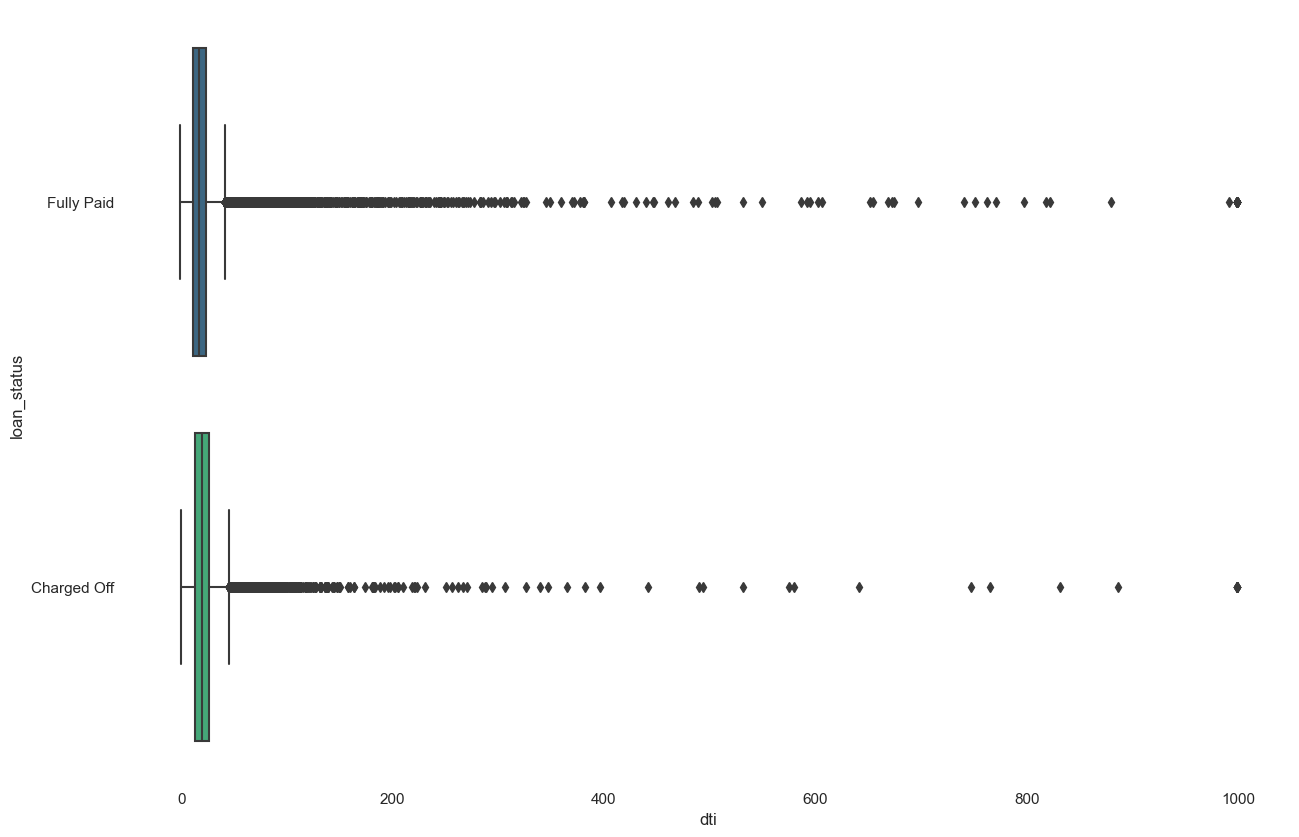

In [120]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df_train, y='loan_status', x='dti', palette='viridis')

plt.autoscale()
plt.grid(True)

plt.show()

The box plots confirm our suspicions. Many extreme outliers are present in our data we will deal with these later on

**Annual_Income**

Like dti many extreme outliers are present

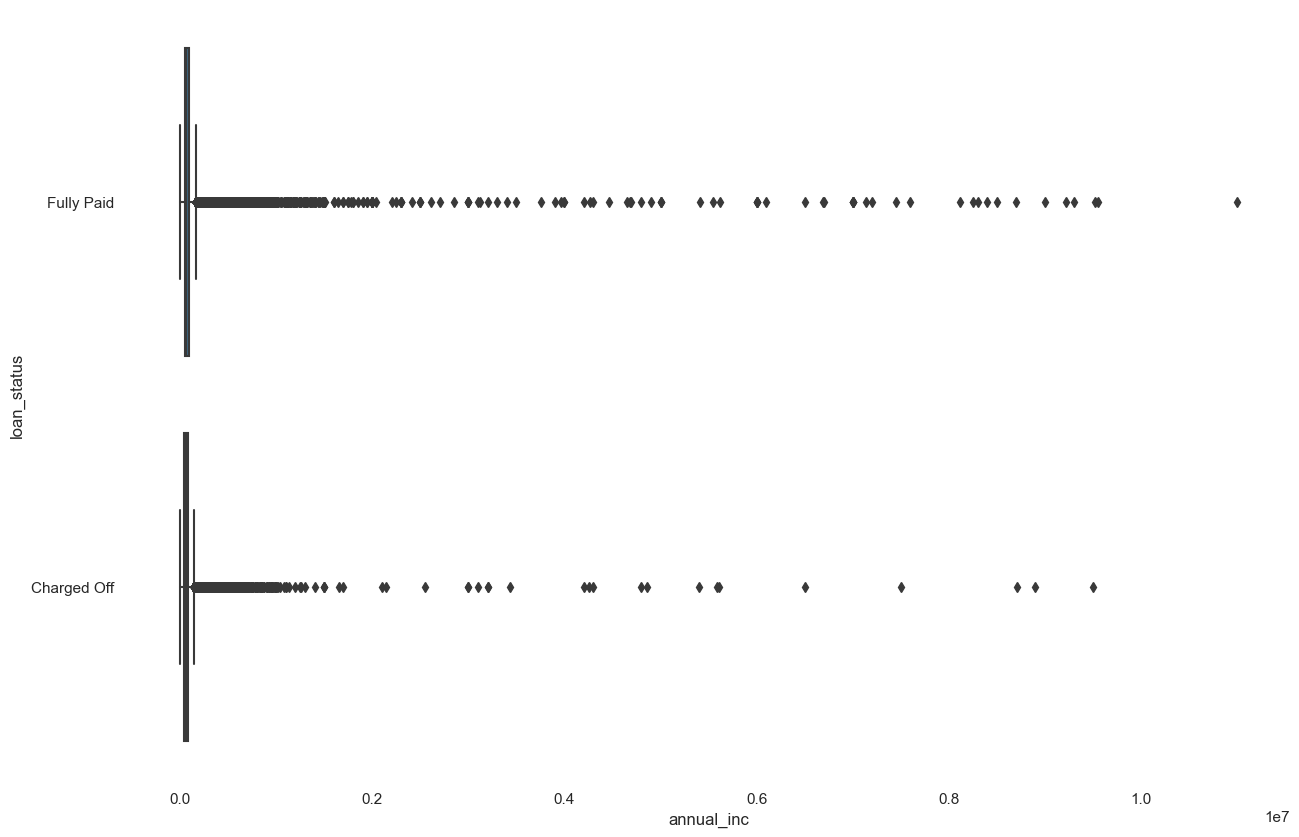

In [121]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df_train, y='loan_status', x='annual_inc', palette='viridis')

plt.autoscale()
plt.grid(True)

plt.show()

For an easier visualization we opted to plot the values that are less than 200000

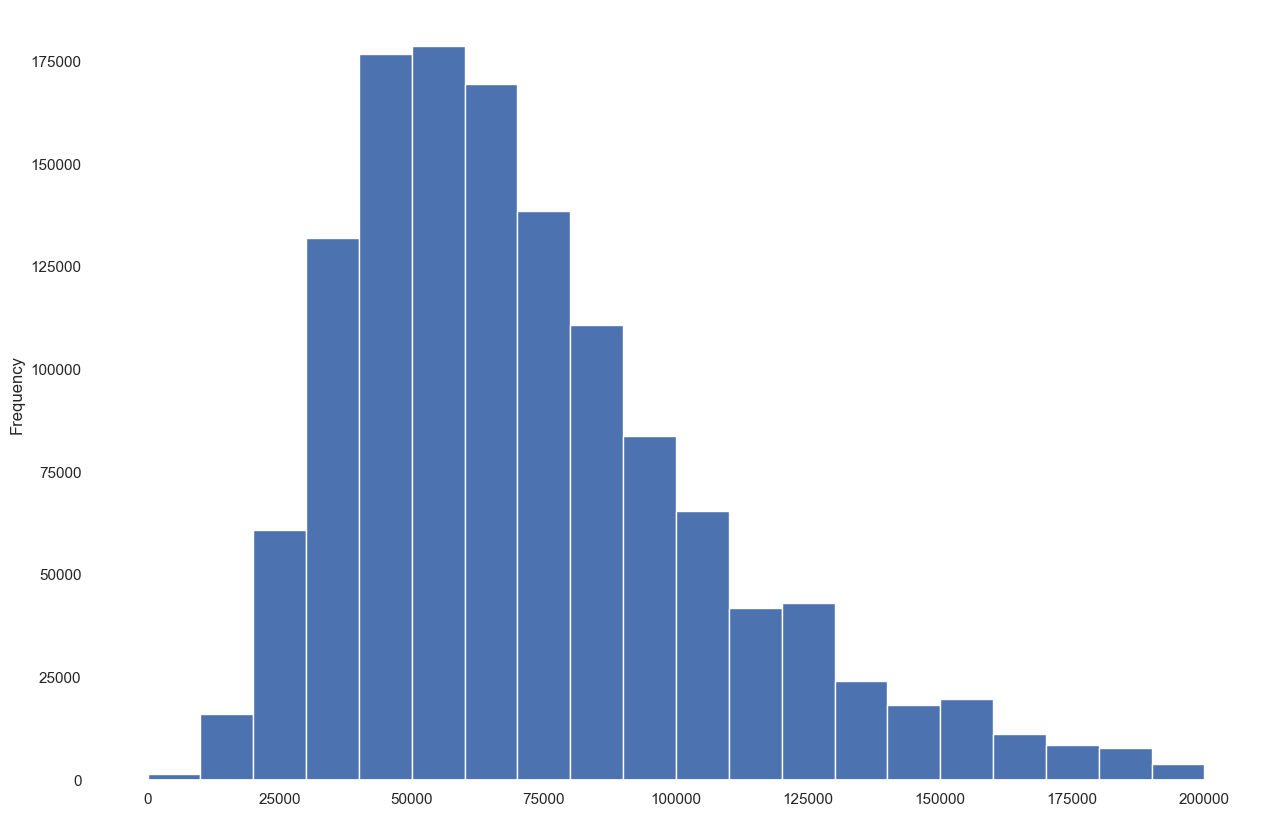

In [122]:
plt.figure(figsize=(15,10))

df_train[df_train['annual_inc']<200000]['annual_inc'].plot.hist(bins=20)

plt.autoscale()
plt.grid(True)

plt.show()

In [123]:
df_train.groupby('loan_status')['annual_inc'].describe()

count          mean           std  min      25%      50%  \
loan_status                                                                 
Charged Off  268559.0   70400.743283  65394.909259  0.0  43000.0  60000.0   
Fully Paid   1076751.0  77705.945505  70934.960307  0.0  47000.0  65000.0   

                 75%         max  
loan_status                       
Charged Off  85000.0  9500000.0   
Fully Paid   93000.0  10999200.0

In [124]:
df_train["annual_inc"].describe().apply(lambda x: format(x, 'f'))

count    1345310.000000 
mean     76247.636414   
std      69925.098427   
min      0.000000       
25%      45780.000000   
50%      65000.000000   
75%      90000.000000   
max      10999200.000000
Name: annual_inc, dtype: object

## **Remaining Variables**

<a id="5.14"></a>

---

- **open_acc**: The total number of credit lines currently in the borrower's credit file

Text(0.5, 1.0, 'Number of Open Credit Lines')

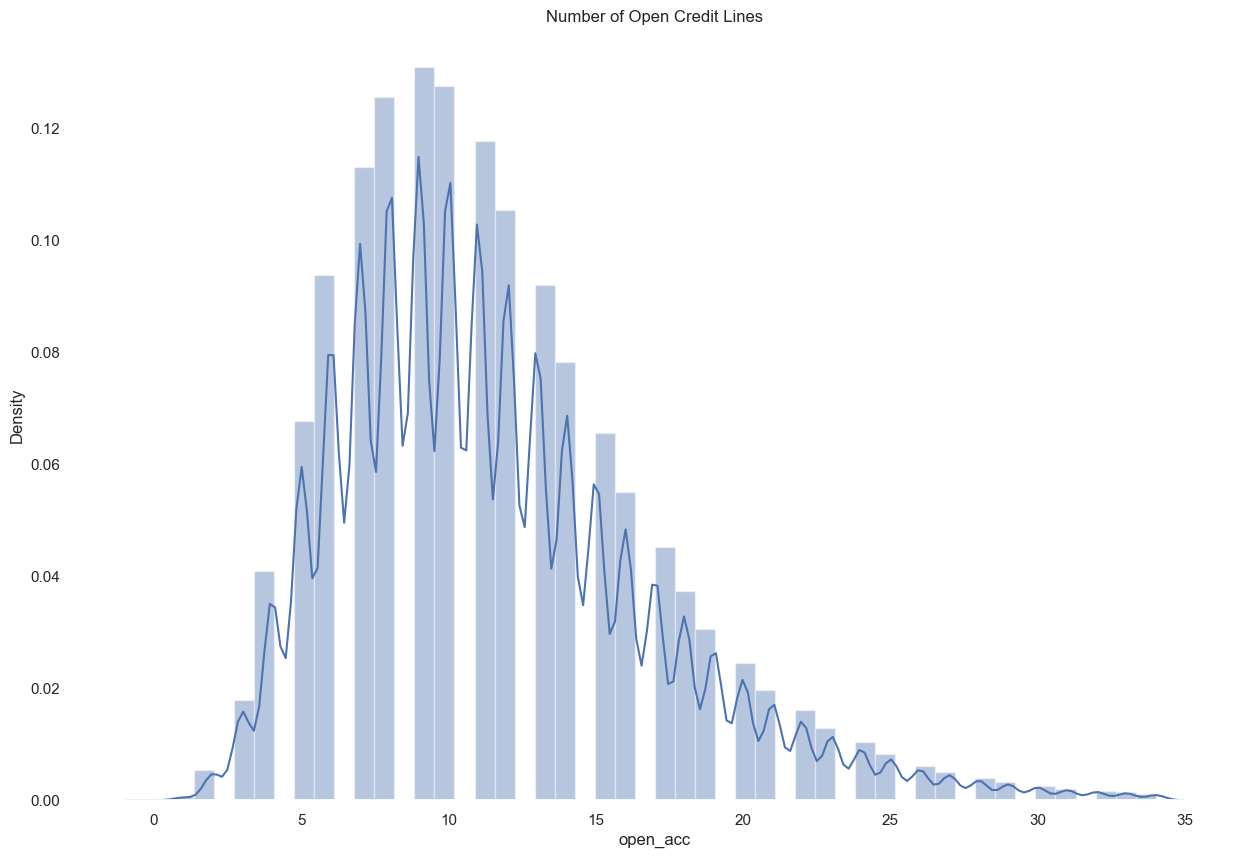

In [125]:
plt.figure(figsize=(15,10))

sns.distplot(df_train.loc[df_train['open_acc'].notnull() & (df_train['open_acc']<35), 'open_acc'], kde=True)

plt.autoscale()
plt.grid(True)

plt.title('Number of Open Credit Lines')

In [126]:
df_train.groupby('loan_status')['open_acc'].describe()

count       mean       std  min  25%   50%   75%   max
loan_status                                                            
Charged Off  268559.0   11.901269  5.637964  0.0  8.0  11.0  15.0  76.0
Fully Paid   1076751.0  11.516763  5.429354  0.0  8.0  11.0  14.0  90.0

Average values close to each other. Outliers are present here

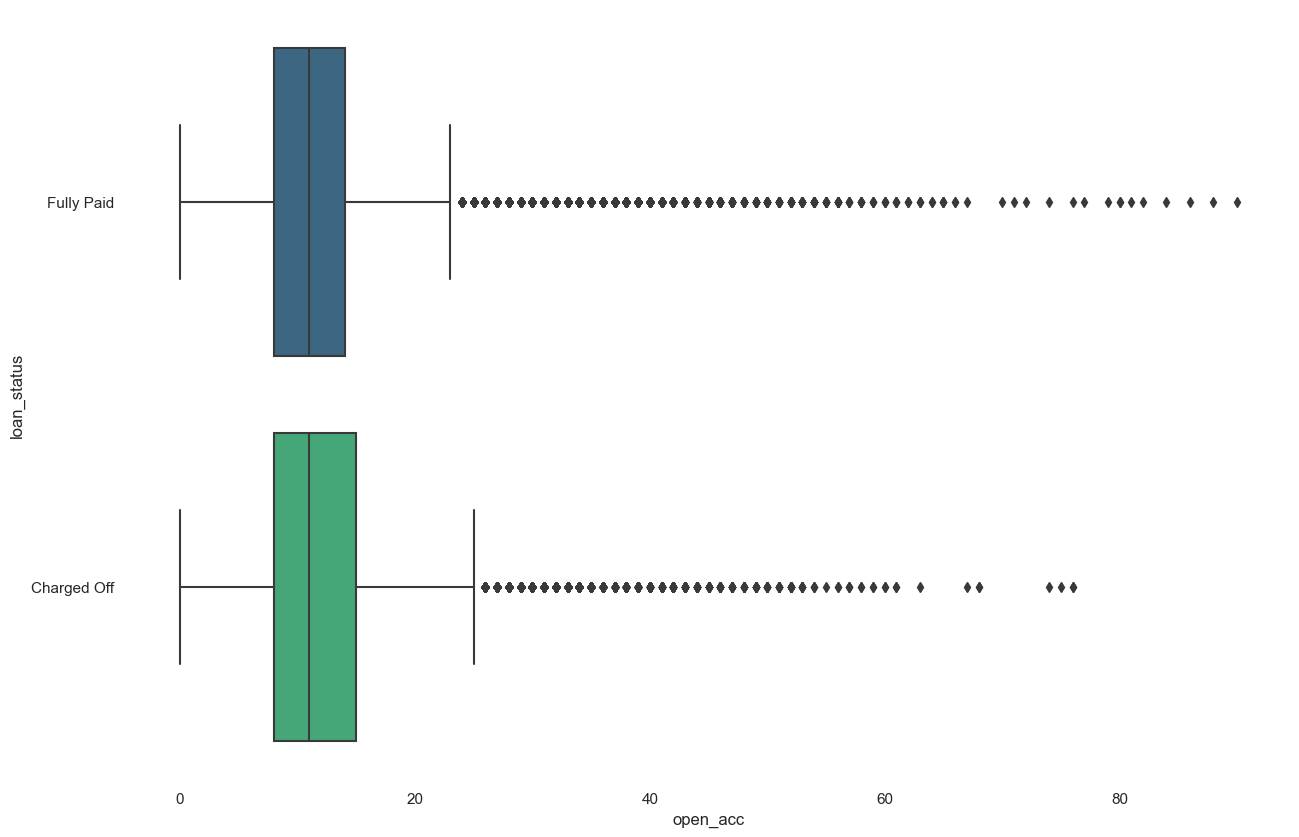

In [127]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df_train, y='loan_status', x='open_acc', palette='viridis')

plt.autoscale()
plt.grid(True)

plt.show()

- **pub_rec**: Number of derogatory public records

In [128]:
df_train['pub_rec'].value_counts().sort_index()

pub_rec
0.0     1117425
1.0     190789 
2.0     24435  
3.0     7399   
4.0     2630   
5.0     1266   
6.0     636    
7.0     283    
8.0     160    
9.0     83     
10.0    57     
11.0    40     
12.0    27     
13.0    18     
14.0    5      
15.0    9      
16.0    5      
17.0    3      
18.0    6      
19.0    5      
20.0    3      
21.0    6      
22.0    2      
23.0    1      
24.0    2      
25.0    1      
28.0    3      
34.0    1      
37.0    1      
40.0    1      
46.0    1      
47.0    1      
49.0    2      
54.0    1      
61.0    1      
63.0    1      
86.0    1      
Name: count, dtype: int64

Is there a difference in average public records between fully paid loans and charged-off loans? This features has alot of zero records

In [129]:
df_train.groupby('loan_status')['pub_rec'].describe()

count      mean       std  min  25%  50%  75%   max
loan_status                                                         
Charged Off  268559.0   0.246843  0.656732  0.0  0.0  0.0  0.0  86.0
Fully Paid   1076751.0  0.207403  0.587118  0.0  0.0  0.0  0.0  63.0

- **revol_bal**: Total credit revolving balance

In [130]:
df_train.groupby('loan_status')['revol_bal'].describe()

count          mean           std  min     25%      50%  \
loan_status                                                                
Charged Off  268559.0   15353.500553  18954.349264  0.0  5990.0  11072.0   
Fully Paid   1076751.0  16471.246042  23087.587389  0.0  5931.0  11150.0   

                 75%        max  
loan_status                      
Charged Off  19101.0  1746716.0  
Fully Paid   19925.0  2904836.0

There isn't a large difference in the means.

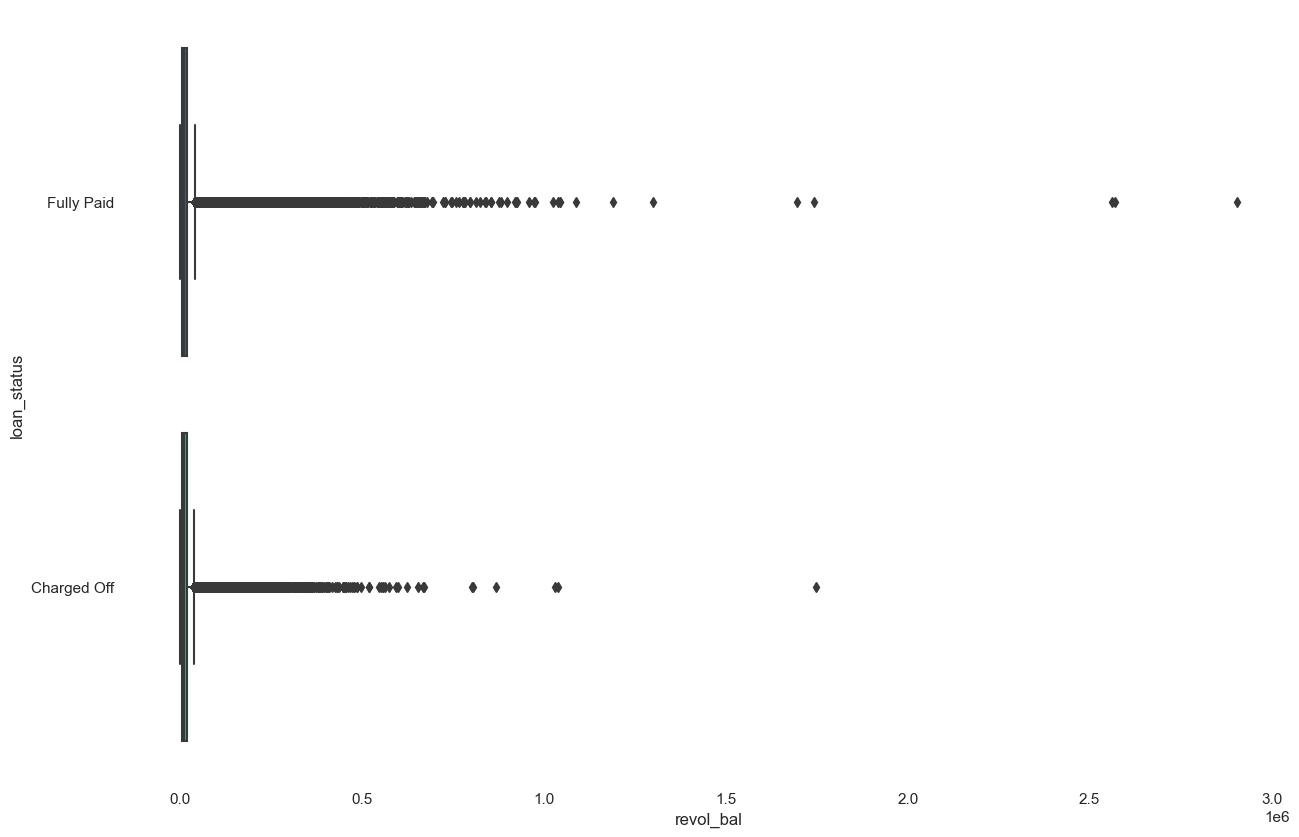

In [131]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df_train, y='loan_status', x='revol_bal', palette='viridis')

plt.autoscale()
plt.grid(True)

plt.show()

- **revol_util**: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit

In [132]:
df_train.groupby('loan_status')['revol_bal'].describe()

count          mean           std  min     25%      50%  \
loan_status                                                                
Charged Off  268559.0   15353.500553  18954.349264  0.0  5990.0  11072.0   
Fully Paid   1076751.0  16471.246042  23087.587389  0.0  5931.0  11150.0   

                 75%        max  
loan_status                      
Charged Off  19101.0  1746716.0  
Fully Paid   19925.0  2904836.0

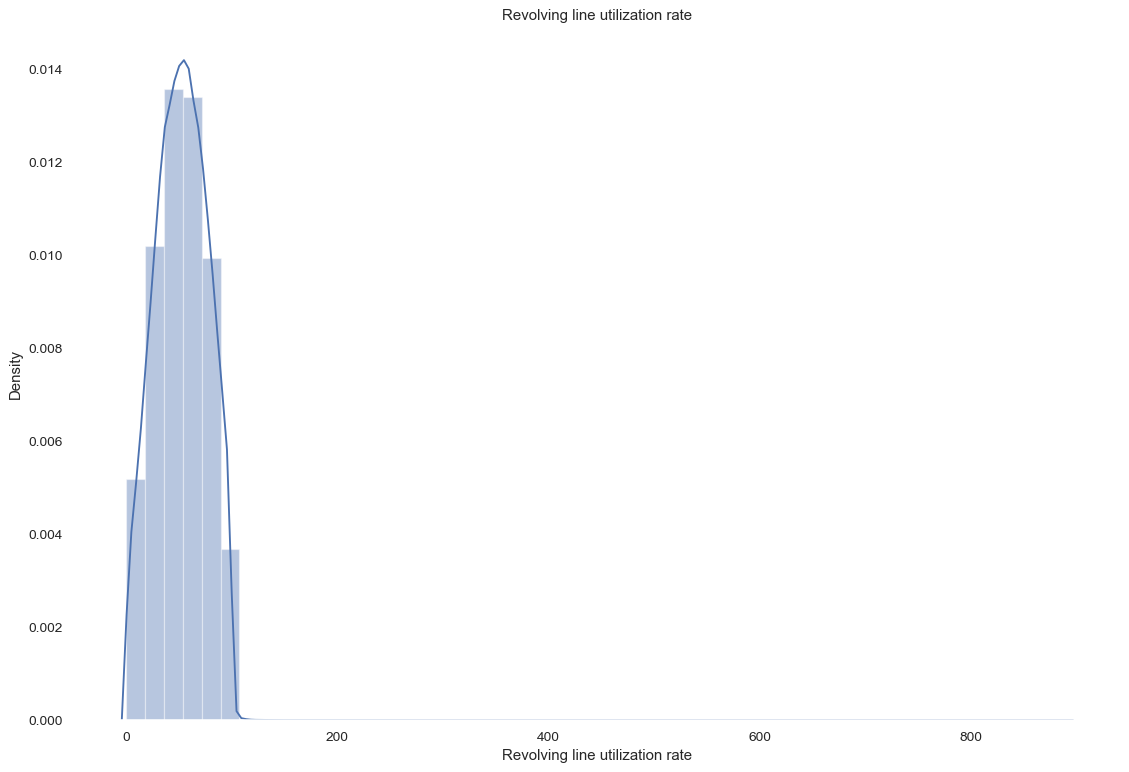

In [133]:
plt.figure(figsize=(15,10), dpi=90)

sns.distplot(df_train.loc[df_train['revol_util'].notnull() & (df_train['revol_util']), 'revol_util'], kde=True)

plt.xlabel('Revolving line utilization rate')

plt.title('Revolving line utilization rate')

plt.autoscale()
plt.grid(True)

plt.show()

In [134]:
df_train.groupby('loan_status')['revol_util'].describe()

count       mean        std  min   25%   50%   75%    max
loan_status                                                               
Charged Off  268379.0   54.758433  23.865982  0.0  37.4  55.5  73.1  366.6
Fully Paid   1076074.0  51.074671  24.626821  0.0  32.5  51.3  70.1  892.3

- **total_acc**: The total number of credit lines currently in the borrower's credit file

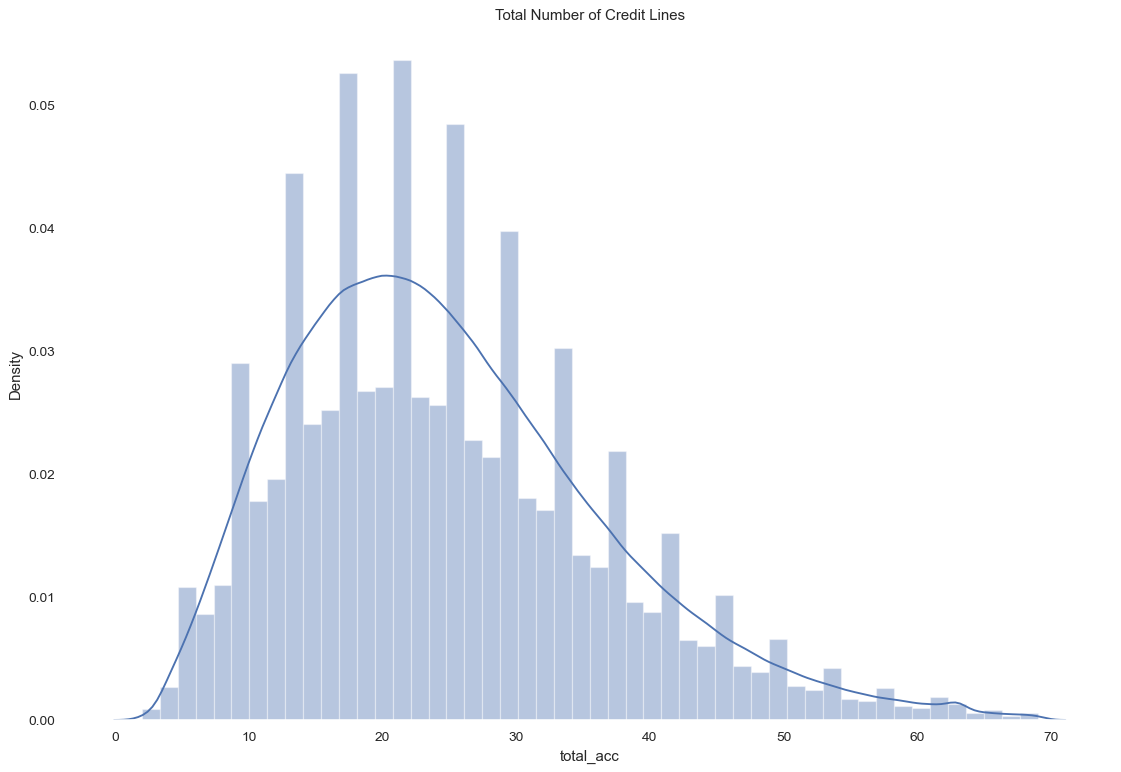

In [135]:
plt.figure(figsize=(15,10), dpi=90)

sns.distplot(df_train.loc[df_train['total_acc'].notnull() & (df_train['total_acc']<70), 'total_acc'], kde=True)

plt.title('Total Number of Credit Lines')

plt.autoscale()
plt.grid(True)

In [136]:
df_train.groupby('loan_status')['total_acc'].describe()

count       mean        std  min   25%   50%   75%    max
loan_status                                                               
Charged Off  268559.0   24.709356  12.117364  2.0  16.0  23.0  31.0  176.0
Fully Paid   1076751.0  25.048551  11.967683  2.0  16.0  23.0  32.0  162.0

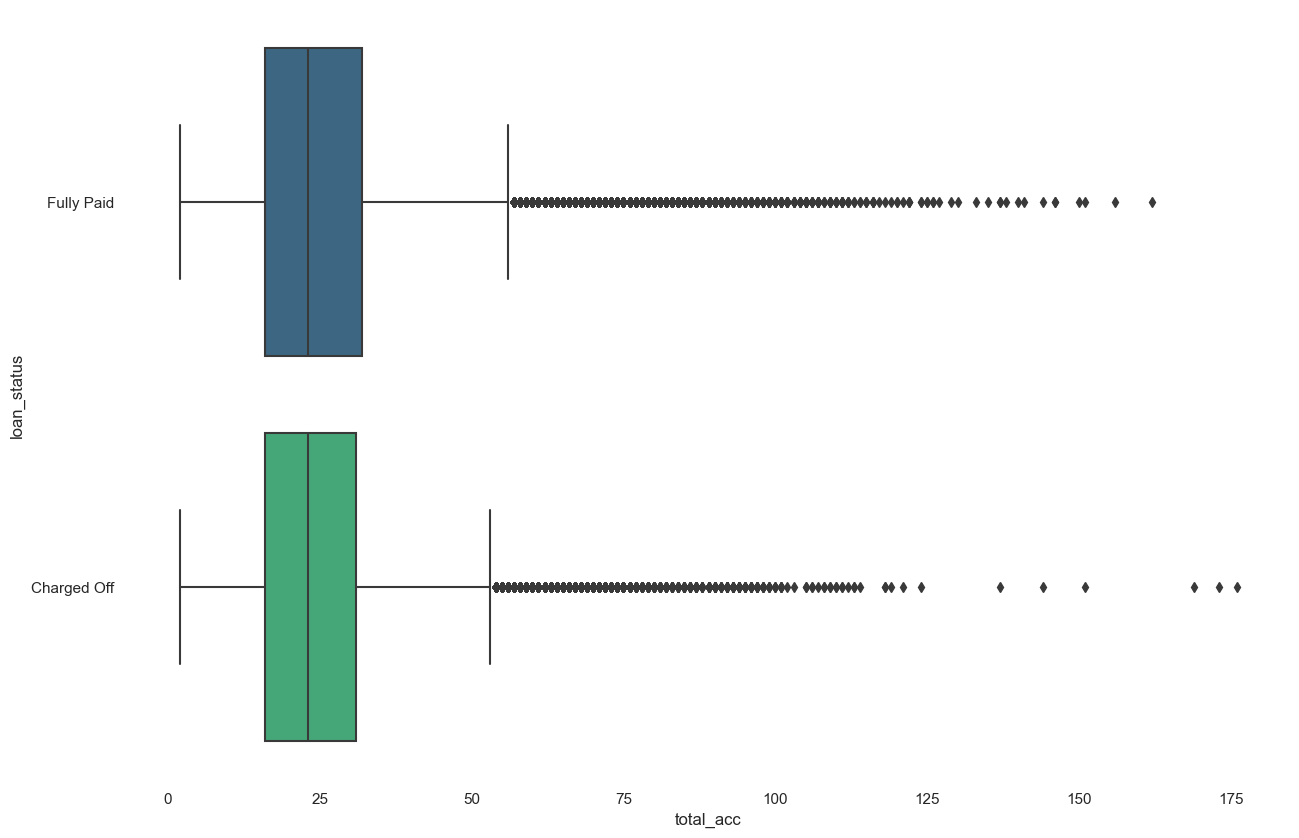

In [137]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df_train, y='loan_status', x='total_acc', palette='viridis')

plt.autoscale()
plt.grid(True)

plt.show()

No large differences here.

- **Application_type:** Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [138]:
df_train['application_type'].value_counts().sort_index()

application_type
Individual    1319510
Joint App     25800  
Name: count, dtype: int64

In [139]:
df_train.groupby('application_type')['loan_status'].value_counts(normalize=True)

application_type  loan_status
Individual        Fully Paid     0.801279
                  Charged Off    0.198721
Joint App         Fully Paid     0.754109
                  Charged Off    0.245891
Name: proportion, dtype: float64

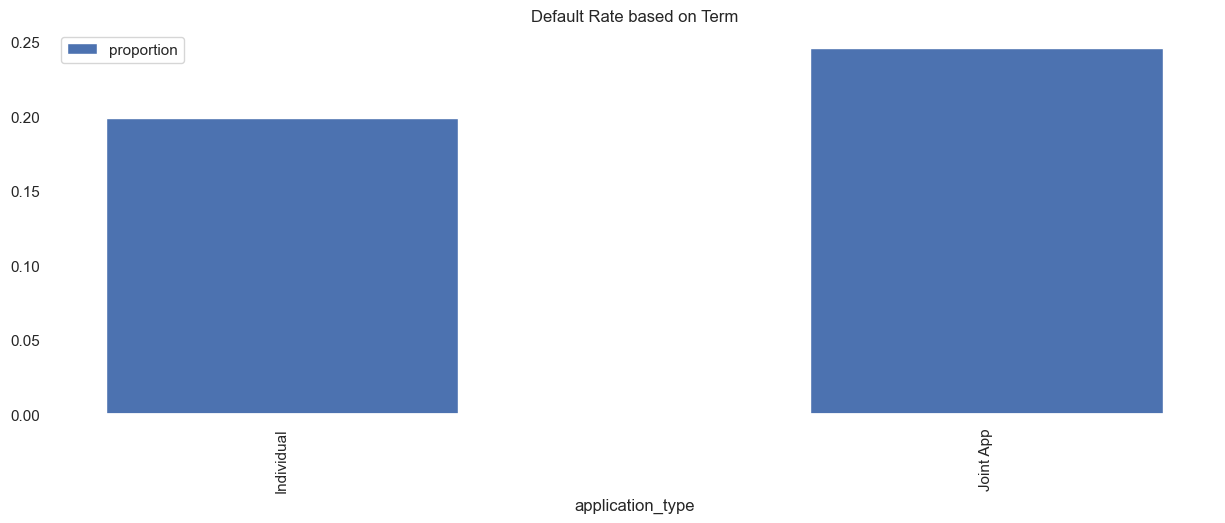

In [140]:
plt.figure(figsize=(15,5))


p = df_train.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']


p = p.plot.bar(title='Default Rate based on Term')

plt.legend()

plt.autoscale()
plt.grid(True)

plt.show()

Joint loans appear to have a higher probability of default

- **mort_acc:** Number of mortgage accounts

In [141]:
df_train['mort_acc'].value_counts().sort_index()

mort_acc
0.0     523837
1.0     226135
2.0     188941
3.0     139381
4.0     94920 
5.0     57632 
6.0     32539 
7.0     16850 
8.0     8378  
9.0     4285  
10.0    2197  
11.0    1206  
12.0    640   
13.0    356   
14.0    244   
15.0    132   
16.0    93    
17.0    61    
18.0    48    
19.0    29    
20.0    25    
21.0    14    
22.0    14    
23.0    10    
24.0    16    
25.0    9     
26.0    6     
27.0    8     
28.0    4     
29.0    4     
30.0    2     
31.0    2     
32.0    2     
34.0    3     
35.0    1     
36.0    1     
37.0    2     
47.0    1     
51.0    1     
Name: count, dtype: int64

In [142]:
df_train.groupby('mort_acc')['loan_status'].value_counts(normalize=True)

mort_acc  loan_status
0.0       Fully Paid     0.763718
          Charged Off    0.236282
1.0       Fully Paid     0.796763
          Charged Off    0.203237
2.0       Fully Paid     0.816853
          Charged Off    0.183147
3.0       Fully Paid     0.829790
          Charged Off    0.170210
4.0       Fully Paid     0.839423
          Charged Off    0.160577
5.0       Fully Paid     0.846821
          Charged Off    0.153179
6.0       Fully Paid     0.855158
          Charged Off    0.144842
7.0       Fully Paid     0.852463
          Charged Off    0.147537
8.0       Fully Paid     0.861184
          Charged Off    0.138816
9.0       Fully Paid     0.869778
          Charged Off    0.130222
10.0      Fully Paid     0.883022
          Charged Off    0.116978
11.0      Fully Paid     0.872305
          Charged Off    0.127695
12.0      Fully Paid     0.878125
          Charged Off    0.121875
13.0      Fully Paid     0.896067
          Charged Off    0.103933
14.0      Fully Paid     0

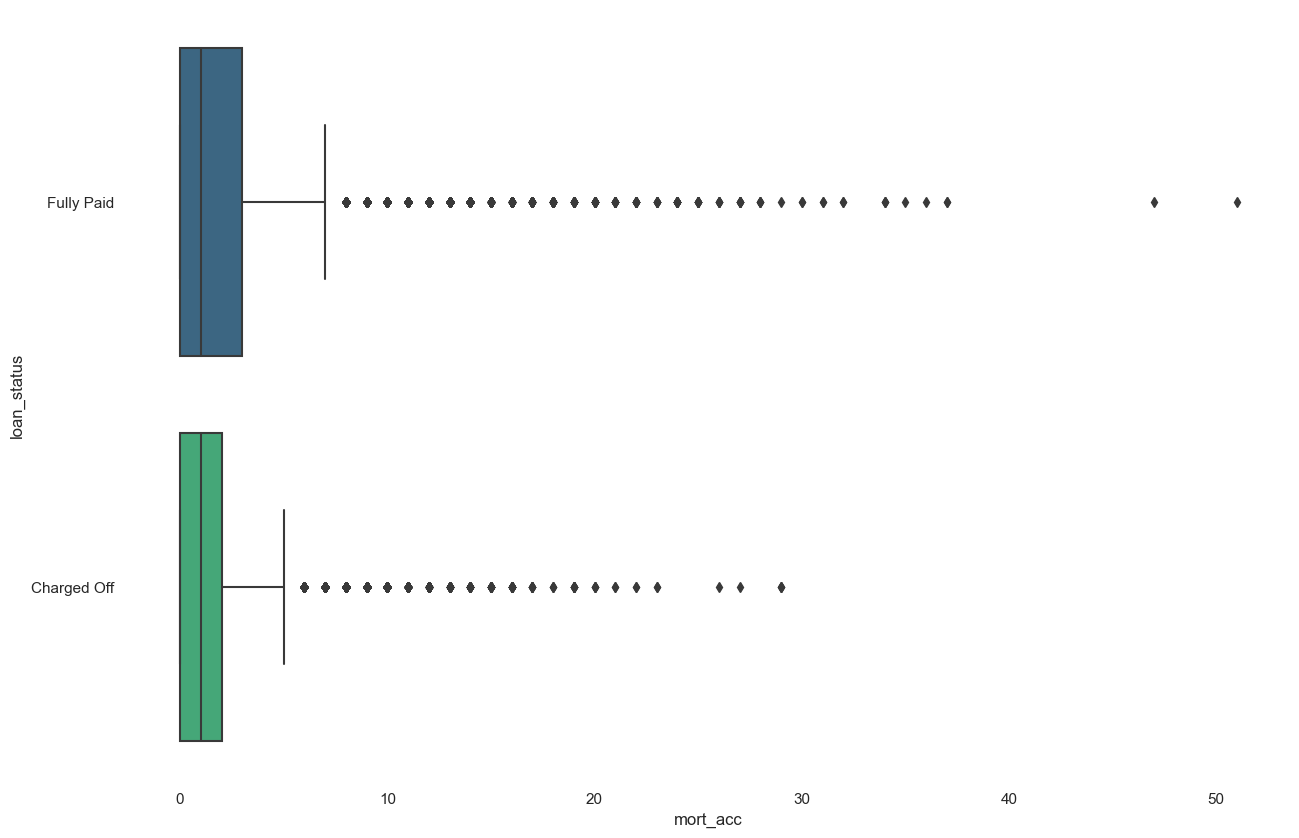

In [143]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df_train, y='loan_status', x='mort_acc', palette='viridis')

plt.autoscale()
plt.grid(True)

plt.show()

- **pub_rec_bankruptcies:** Number of public record bankruptcies

In [144]:
df_train['pub_rec_bankruptcies'].value_counts().sort_index()

pub_rec_bankruptcies
0.0     1176953
1.0     157696 
2.0     7769   
3.0     1583   
4.0     396    
5.0     141    
6.0     46     
7.0     15     
8.0     9      
9.0     3      
11.0    1      
12.0    1      
Name: count, dtype: int64

In [145]:
df_train.groupby('pub_rec_bankruptcies')['loan_status'].value_counts(normalize=True)

pub_rec_bankruptcies  loan_status
0.0                   Fully Paid     0.804186
                      Charged Off    0.195814
1.0                   Fully Paid     0.774731
                      Charged Off    0.225269
2.0                   Fully Paid     0.752092
                      Charged Off    0.247908
3.0                   Fully Paid     0.773847
                      Charged Off    0.226153
4.0                   Fully Paid     0.722222
                      Charged Off    0.277778
5.0                   Fully Paid     0.765957
                      Charged Off    0.234043
6.0                   Fully Paid     0.652174
                      Charged Off    0.347826
7.0                   Fully Paid     0.733333
                      Charged Off    0.266667
8.0                   Fully Paid     0.555556
                      Charged Off    0.444444
9.0                   Fully Paid     0.666667
                      Charged Off    0.333333
11.0                  Charged Off    1.000000


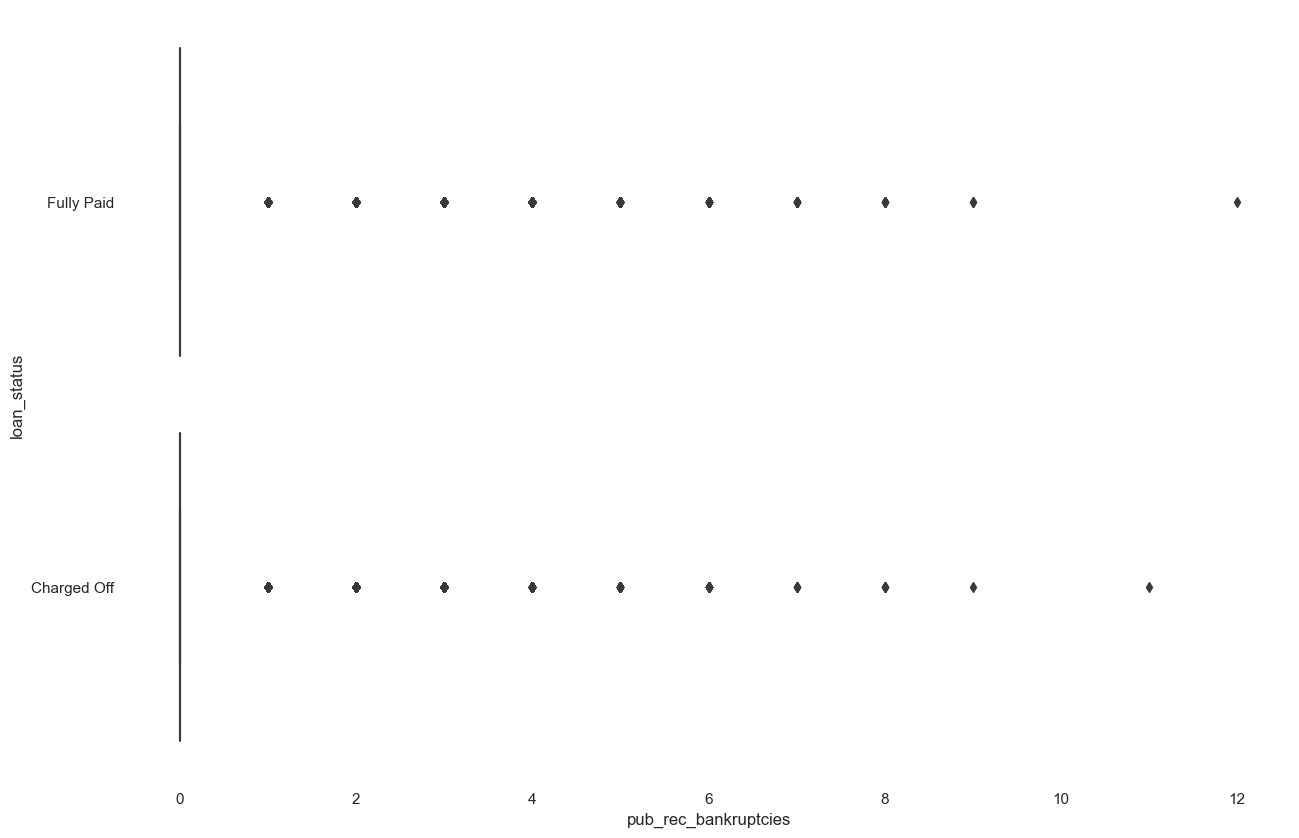

In [146]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df_train, y='loan_status', x='pub_rec_bankruptcies', palette='viridis')

plt.autoscale()
plt.grid(True)

plt.show()

- **fico_range_high and fico_range_low:** Higher and lower boundary of the fico score

We only need to keep one of the FICO scores. We'll take the average of the two and call it fico_score

In [147]:
df_train['fico_score'] = 0.5*df_train['last_fico_range_low'] + 0.5*df_train['last_fico_range_high']


df_train.drop(['last_fico_range_high', 'last_fico_range_low'], axis=1, inplace=True)

In [148]:
df_train.head()

loan_amnt  term  int_rate  installment grade home_ownership  annual_inc  \
0  3600.0     36    13.99     123.03       C     MORTGAGE       55000.0      
1  24700.0    36    11.99     820.28       C     MORTGAGE       65000.0      
2  20000.0    60    10.78     432.66       B     MORTGAGE       63000.0      
4  10400.0    60    22.45     289.91       F     MORTGAGE       104433.0     
5  11950.0    36    13.44     405.18       C     RENT           34000.0      

  verification_status loan_status             purpose addr_state    dti  \
0  Not Verified        Fully Paid  debt_consolidation  PA         5.91    
1  Not Verified        Fully Paid  small_business      SD         16.06   
2  Not Verified        Fully Paid  home_improvement    IL         10.78   
4  Source Verified     Fully Paid  major_purchase      PA         25.37   
5  Source Verified     Fully Paid  debt_consolidation  GA         10.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0  0.0          1.0             7.0       0.0      2765.0     29.7         
1  1.0          4.0             22.0      0.0      21470.0    19.2         
2  0.0          0.0             6.0       0.0      7869.0     56.2         
4  1.0          3.0             12.0      0.0      21929.0    64.5         
5  0.0          0.0             5.0       0.0      8822.0     68.4         

   total_acc  last_pymnt_amnt application_type  mort_acc  \
0  13.0       122.67           Individual       1.0        
1  38.0       926.35           Individual       4.0        
2  18.0       15813.30         Joint App        5.0        
4  35.0       10128.96         Individual       6.0        
5  6.0        7653.56          Individual       0.0        

   pub_rec_bankruptcies dti_cats  fico_score  
0  0.0                   05%-10%  562.0       
1  0.0                   15%-20%  697.0       
2  0.0                   10%-15%  702.0       
4  0.0                   NaN      702.0       
5  0.0                   10%-15%  757.0

In [149]:
df_train.shape

(1345310, 25)

## **Pearson Correlation Matrix**

<a id="5.15"></a>

---
We use the Pearson correlation coefficient to examine the strength and direction of the linear relationship between two continuous variables.

The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables. For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables. 

The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. If one variable tends to increase as the other decreases, the coefficient is negative, and the line that represents the correlation slopes downward.

* We can see a strong correlation between loan_amnt and installment. (The monthly payment owed by the borrower if the loan originates)

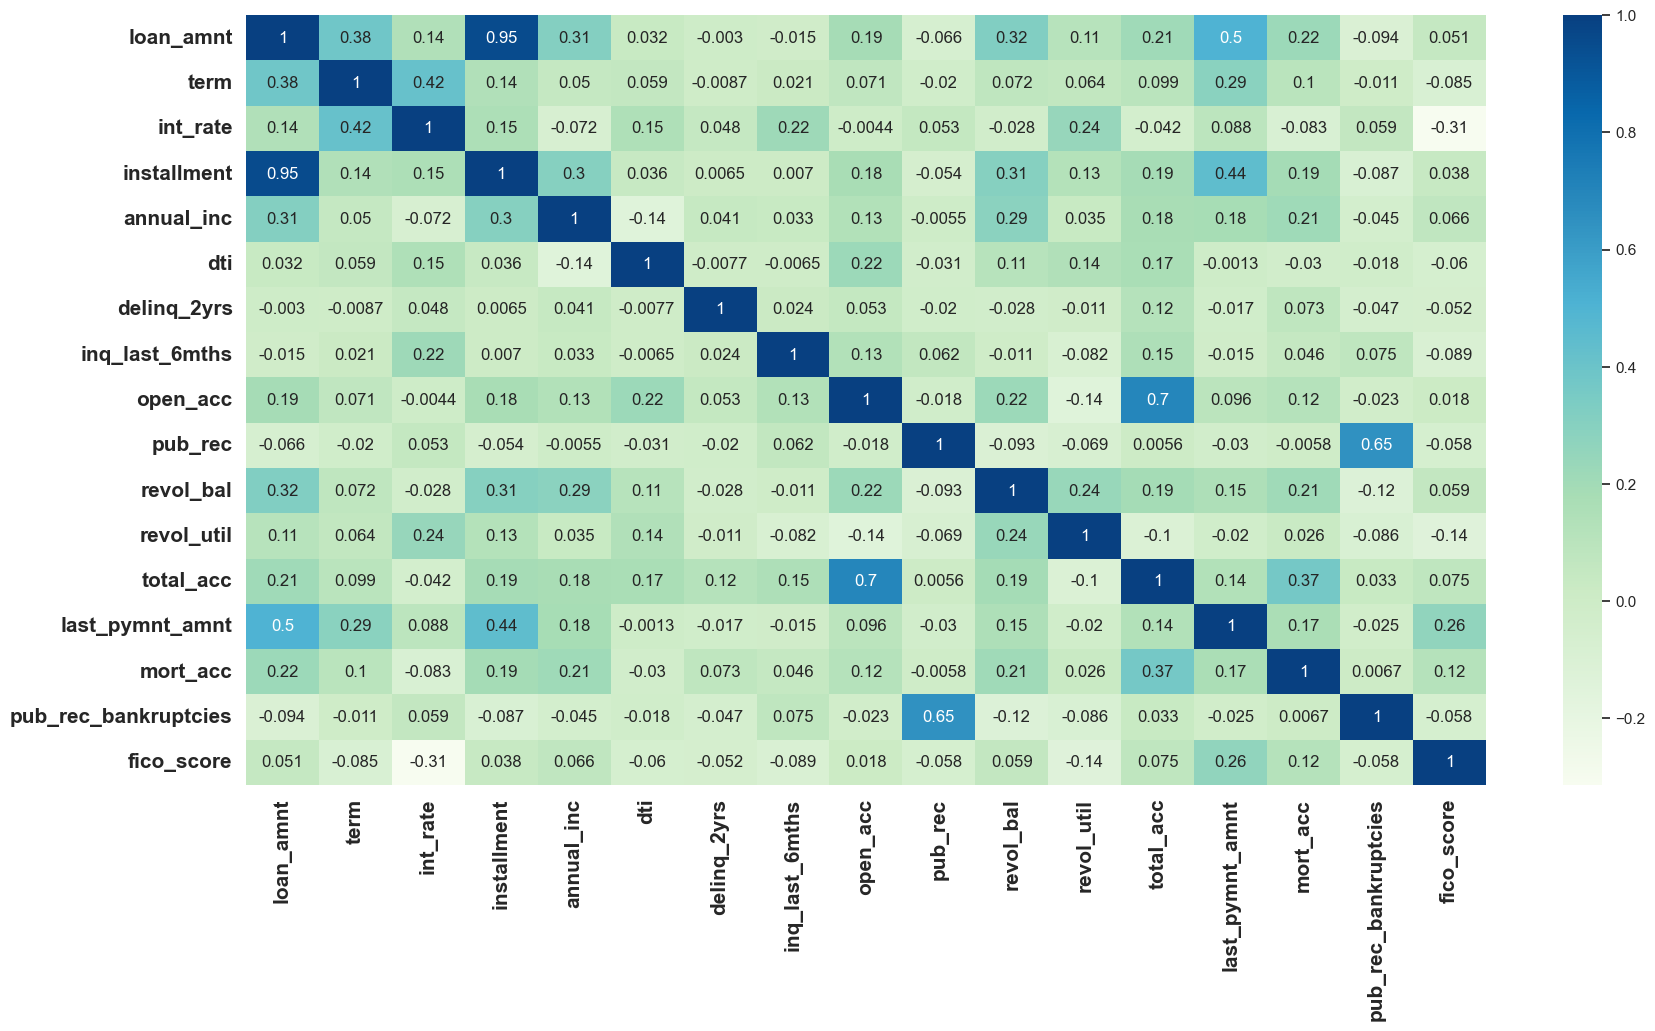

In [151]:
# Select only numerical columns from df_train
numerical_df_train = df_train.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical features
corr_matrix = numerical_df_train.corr(method='pearson')

# Plotting the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap="GnBu")
plt.xticks(weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)

# Uncomment the next line if you want to add a title
# plt.title("Correlation Matrix", loc="center", pad=20, fontsize=15, fontweight="bold")

plt.show()

We are going to drop the amount feature due to the high correlation with loan_amnt. Thus we avoid the risk of multicolienarity.

In [152]:
df_train.drop(['installment'],axis = 1, inplace=True)

## **Conclusions**

<a id="6"></a>

----

**1) Default Rate is high in high risk loan applicants. It would be important for LC to thoroughly vet high risk loan applications. We can see a relationship between grade and interest rate - Worse grades have higher interest rates**

**2) Longer term loans have a higher chance of default. Makes sense - a bigger time horizon requires more installments to pay said loan**

**3) The main reason why applicnats request loans are debt consolidation and credit card. Such applications should be carefully assessed.**

**4) Maximum number of defaulters have 10/10+ years of experience and 0 to 2 years of experience. Hence, LC should be take this aspect into consideration while lending loans.**

**Due the amount of performance power we decided to save this data into a csv file and then import it again in orther to reduce the amount of memory required**

In [153]:
df_train.reset_index()

df_train.to_csv('1. dataset_for_feature_engeneering.csv')